# Simulations for multi-resolution deblending

In this notebook I test multi-resolution on simulated images using the galsim package.

In [1]:
import scarlet
import galsim
from astropy import wcs as WCS
import time
from mr_tools import galsim_compare_tools as gct
import proxmin
import pickle

# Import Packages and setup
import numpy as np
import scarlet.display
from scarlet.display import AsinhMapping
from scarlet import Starlet
from scarlet.wavelet import mad_wavelet
import scipy.stats as scs
from scarlet.initialization import build_initialization_coadd
from functools import partial
from scarlet_extensions.initialization.detection import makeCatalog, Data
from scarlet_extensions.scripts.runner import Runner

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# use a better colormap and don't interpolate the pixels
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

In [32]:
%pylab inline
# Setup: declaring survey properties, loading catalog and making sure we have pretty colorbars
data_dir='/Users/remy/Desktop/LSST_Project/GalSim/examples/data'

HST, EUCLID, ROMAN, HSC, RUBIN = gct.load_surveys()

center_ra = 19.3*galsim.hours     # The RA, Dec of the center of the image on the sky
center_dec = -33.1*galsim.degrees

cat = galsim.COSMOSCatalog(dir=data_dir, file_name = 'real_galaxy_catalog_23.5_example.fits')

mymap = 'gnuplot2'#mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)
matplotlib.rc('image', cmap='gist_stern')
matplotlib.rc('image', interpolation='none')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Generate simulations
hr_dict = EUCLID
lr_dict = RUBIN

nlr = 60
nhr = np.int(np.around(nlr*lr_dict['pixel']/hr_dict['pixel'], decimals = 3))

ngal = np.int(np.random.rand(1)*10)
hr, lr, wcs_hr, wcs_lr, psf_hr, psf_lr, shifts, ks, g1, g2, s1, s2 = gct.mk_scene(hr_dict, lr_dict, cat, 
                                                                  (nhr,nhr), (nlr,nlr), ngal, gal_type = 'real')
hr = hr[None, :,:]


In [4]:
# Channels
channels_hr = hr_dict['channels']
channels_lr = lr_dict['channels']
n,n1,n2 = np.shape(hr)

# Scale the HST data
_,n1,n2 = np.shape(hr)
# Scale the HSC data
r, N1, N2 = lr.shape

In [5]:
# Detectino of sources
data_hr =  Data(hr, wcs_hr, psf_hr, channels_hr)
data_lr =  Data(lr, wcs_lr, psf_lr, channels_lr)

datas = [data_lr, data_hr]

model_psf_hr = scarlet.PSF(partial(scarlet.psf.gaussian, sigma=0.5), shape=(None, 9, 9))
model_psf_lr = scarlet.PSF(partial(scarlet.psf.gaussian, sigma=0.8), shape=(None, 9, 9))

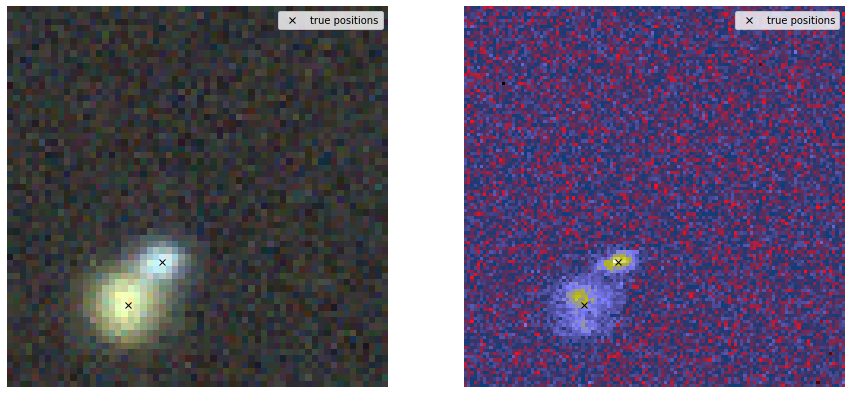

In [6]:
#Results of the detection

# Create a color mapping for the HSC image
lr_norm = AsinhMapping(minimum=-0.1, stretch=0.5, Q=0.1)
hr_norm = AsinhMapping(minimum=0, stretch=0.1, Q=0.1)

# Get the source coordinates from the HST catalog
xtrue, ytrue = shifts[:,0], shifts[:,1]

# Convert the HST coordinates to the HSC WCS
ratrue, dectrue = wcs_hr.wcs_pix2world(ytrue,xtrue,0)
catalog_true = np.array([ratrue, dectrue]).T

Ytrue, Xtrue = wcs_lr.wcs_world2pix(ratrue, dectrue,0)

# Map the HSC image to RGB
img_rgb = scarlet.display.img_to_rgb(lr, norm=lr_norm)
# Apply Asinh to the HST data
hr_img = scarlet.display.img_to_rgb(hr, norm=hr_norm)


plt.figure(figsize=(15,30))
plt.subplot(121)
plt.imshow(img_rgb)
plt.axis('off')
plt.plot(Xtrue,Ytrue, 'xk', label = 'true positions')
plt.legend()

plt.subplot(122)
plt.imshow(hr[0])
plt.axis('off')
plt.plot(xtrue,ytrue, 'xk', label = 'true positions')
plt.legend()
plt.show()

In [7]:
run_multi = Runner(datas, model_psf_hr, ra_dec = catalog_true)
run_hr = Runner([data_hr], model_psf_hr, ra_dec = catalog_true)
run_lr = Runner([data_lr], model_psf_lr, ra_dec = catalog_true)

No PSF specified. Possible, but dangerous!
No PSF specified. Possible, but dangerous!


File not found


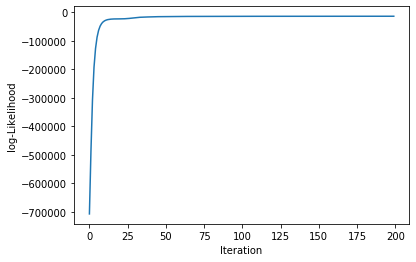

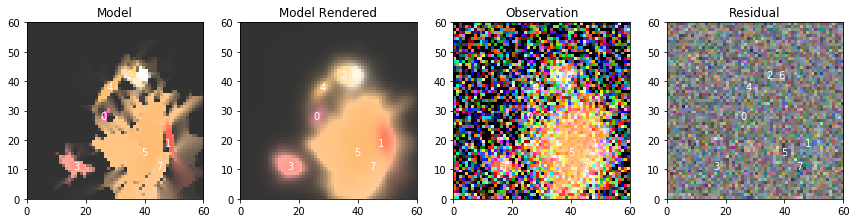

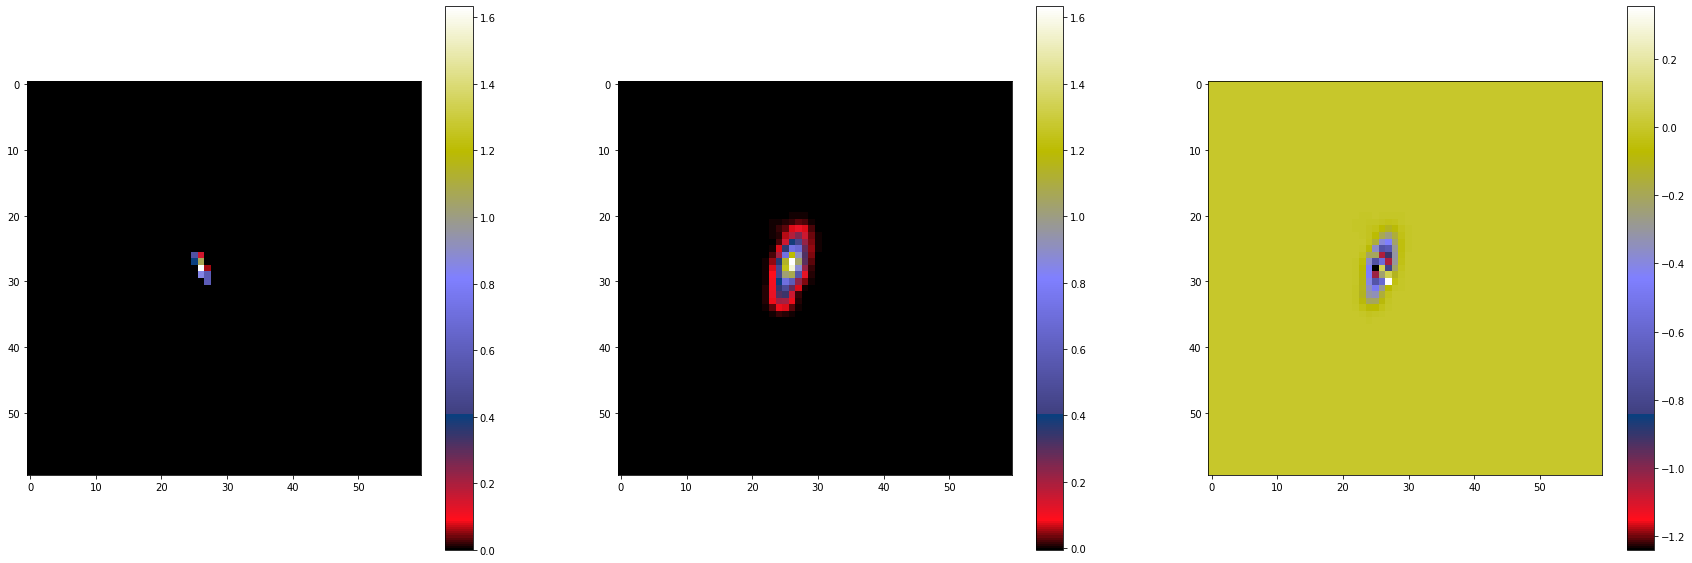

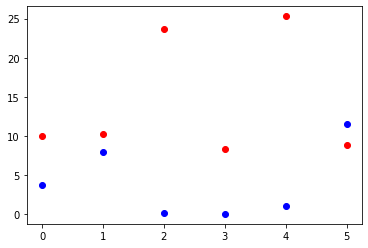

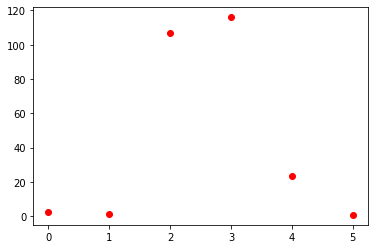

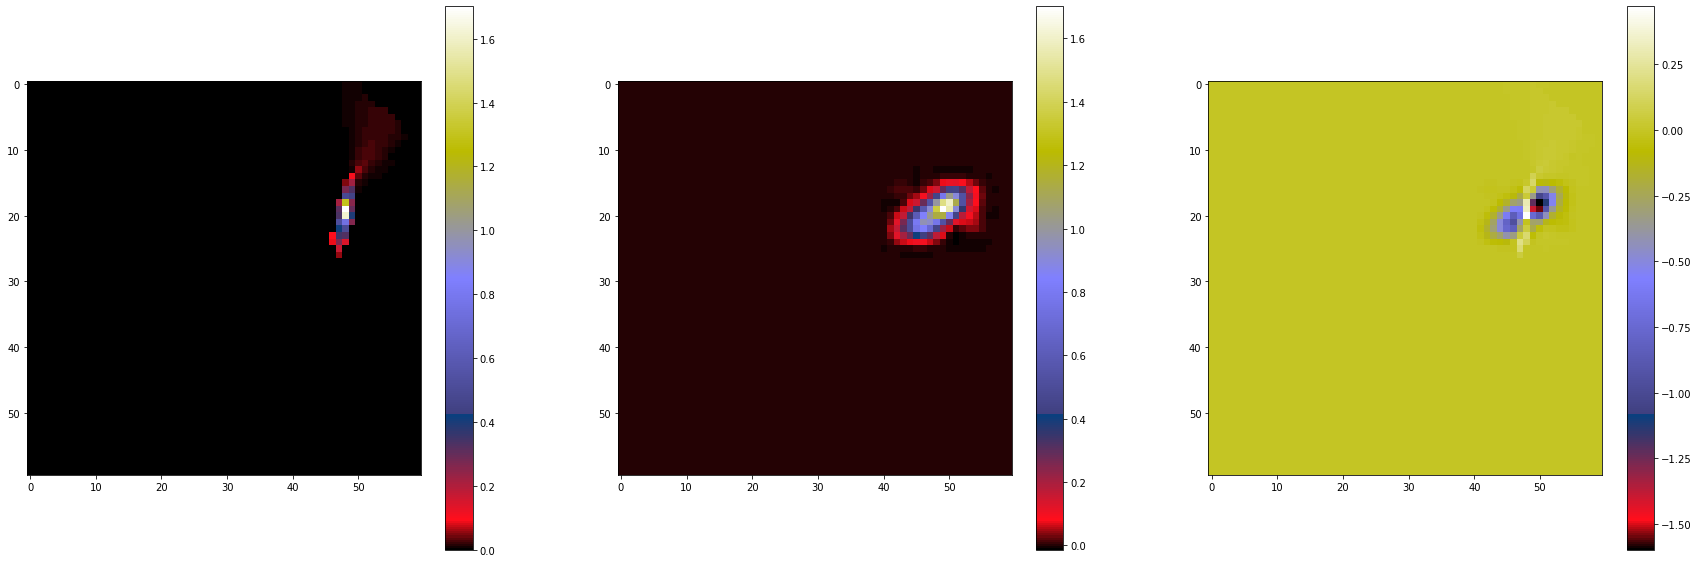

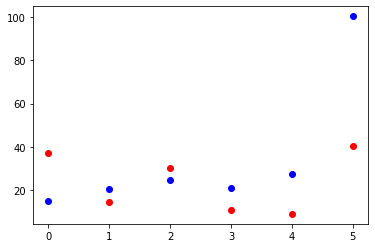

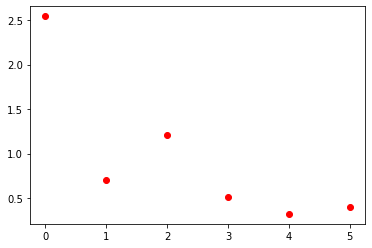

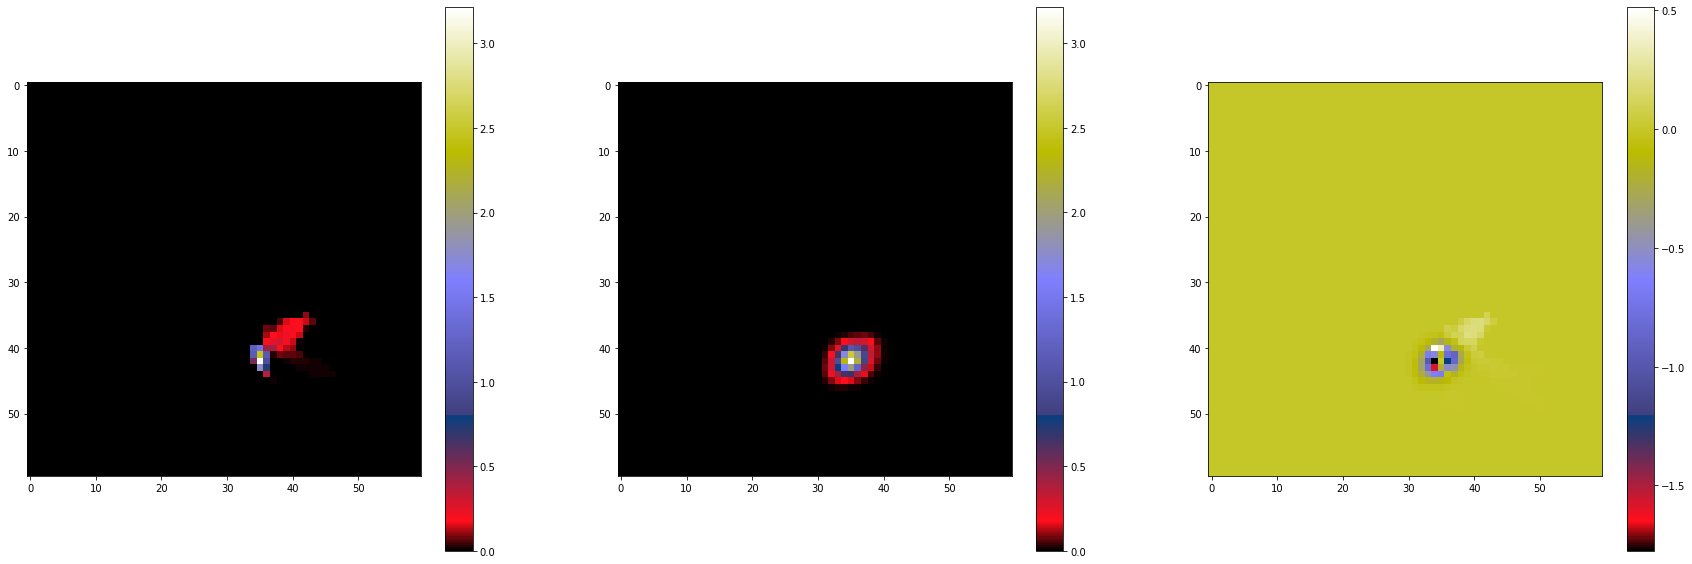

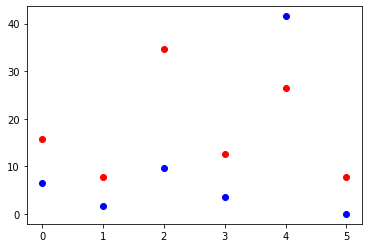

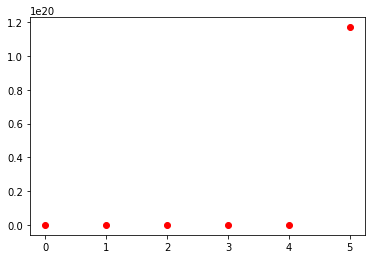

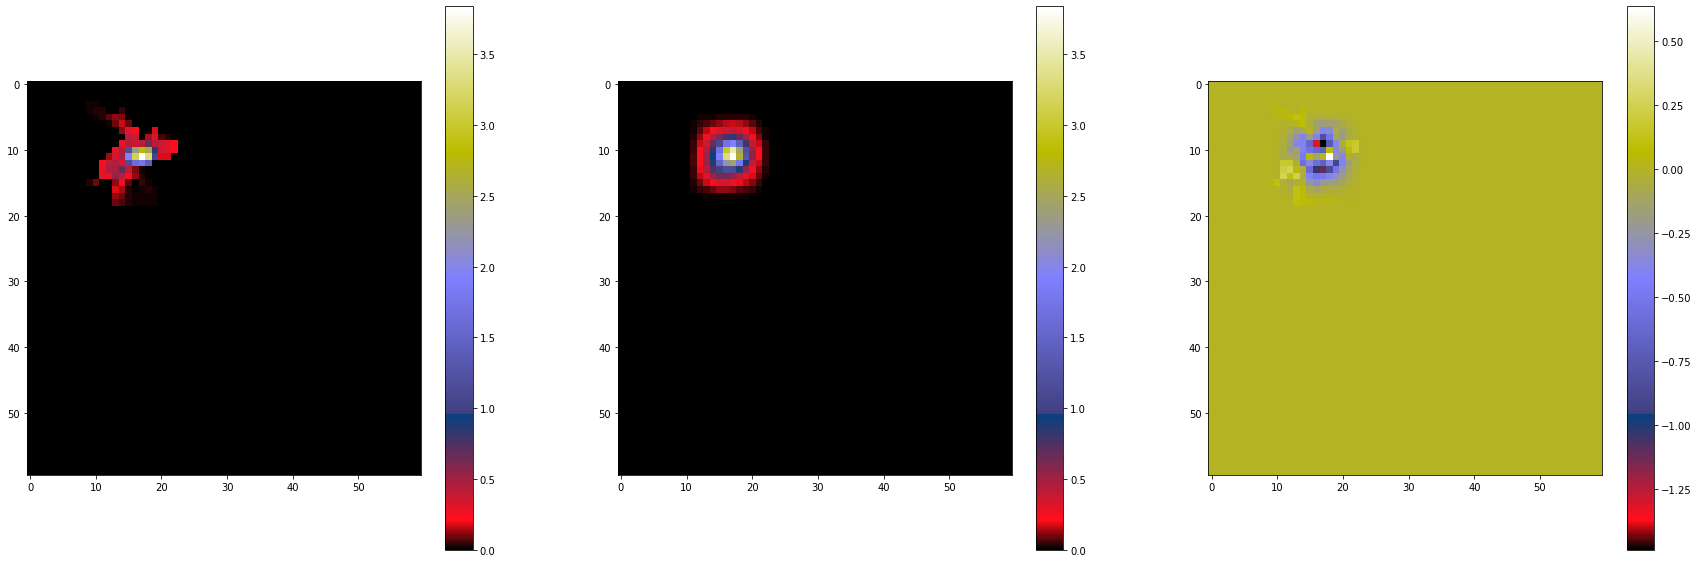

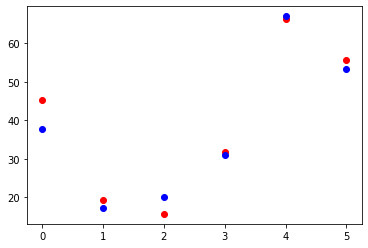

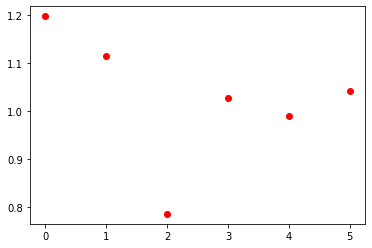

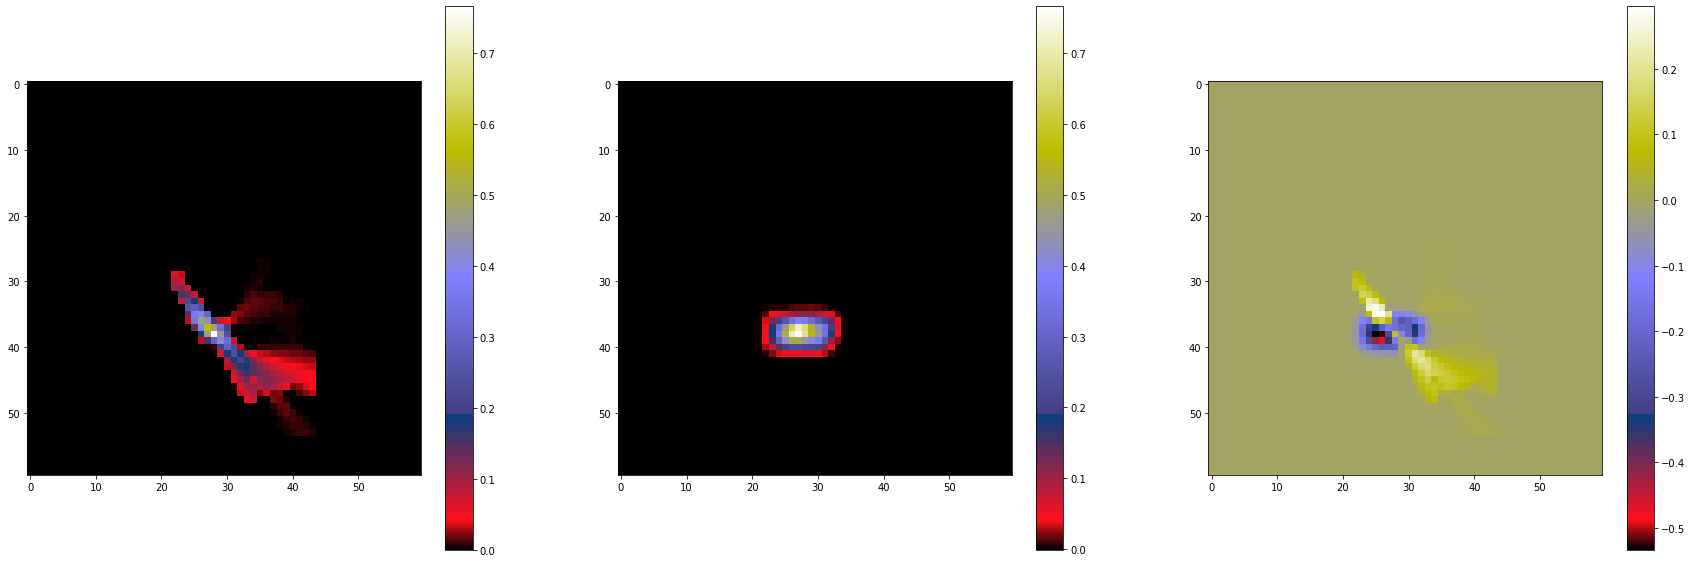

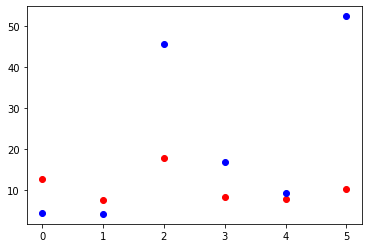

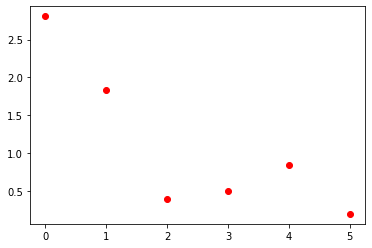

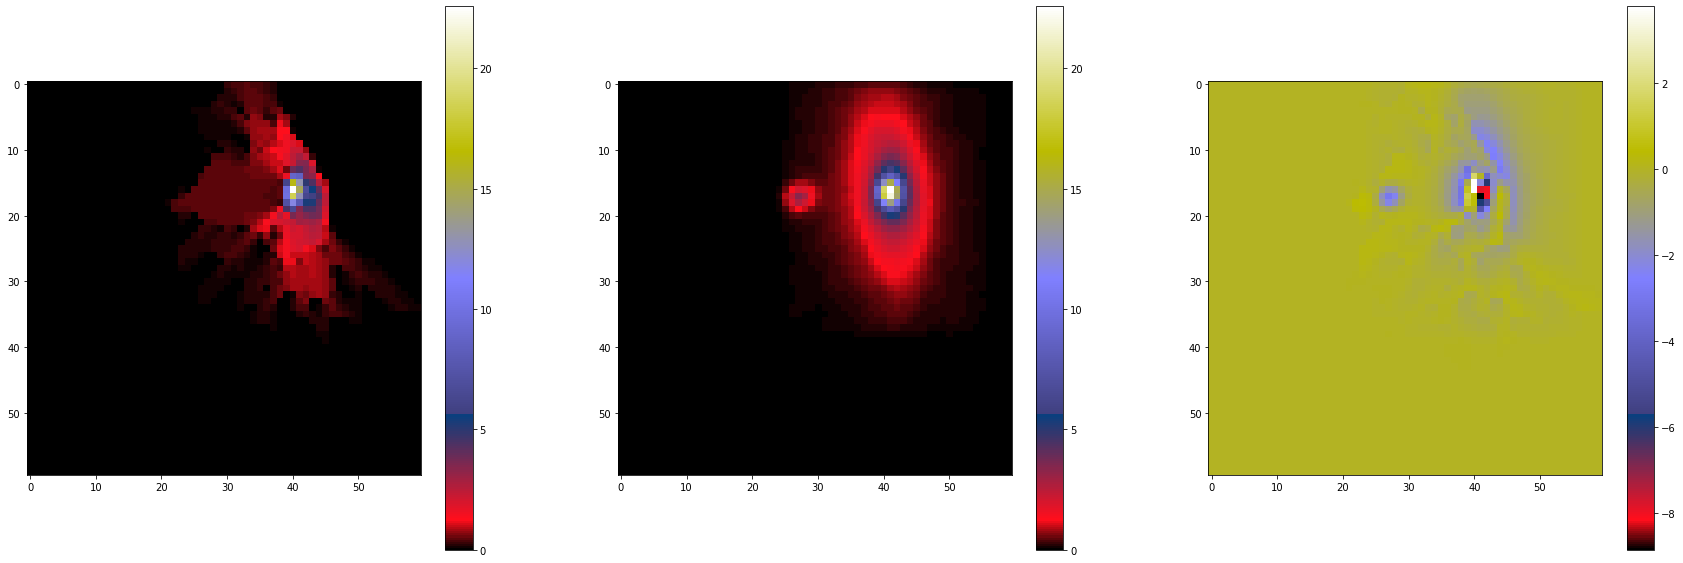

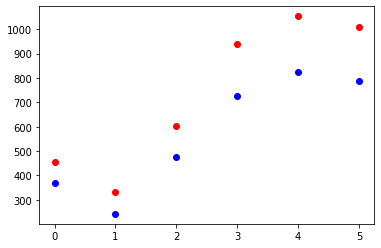

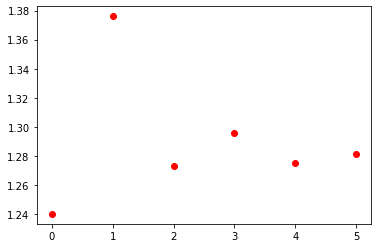

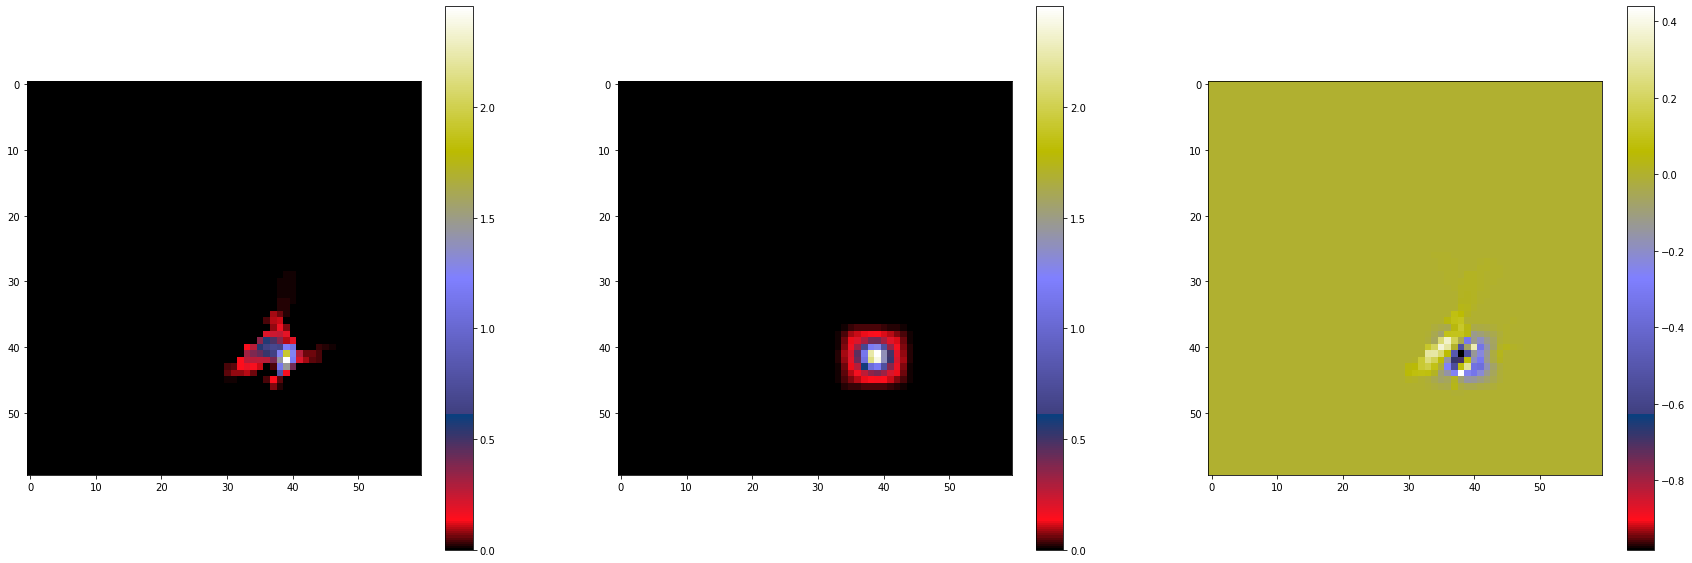

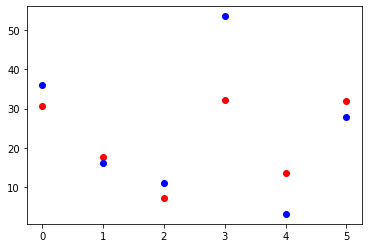

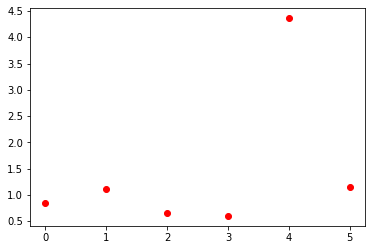

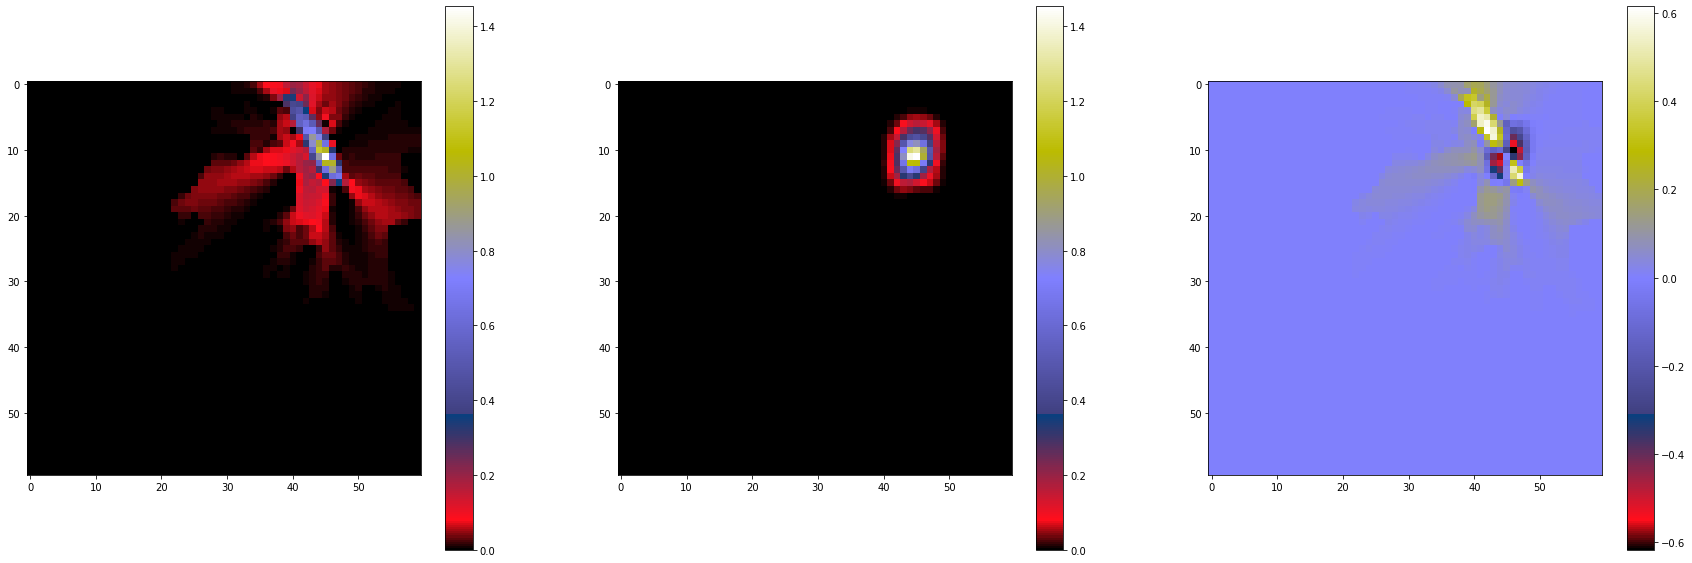

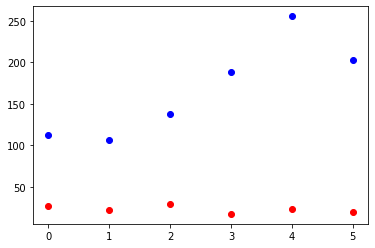

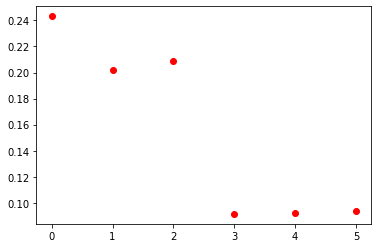

No flux above threshold for source at y=0.3369558877018826 x=-0.5772437415461729


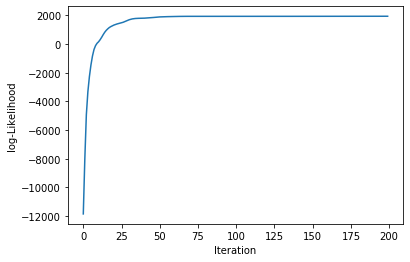

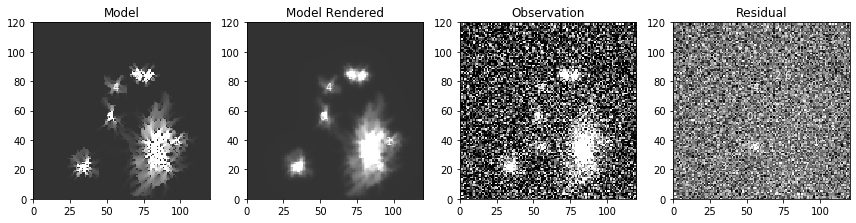

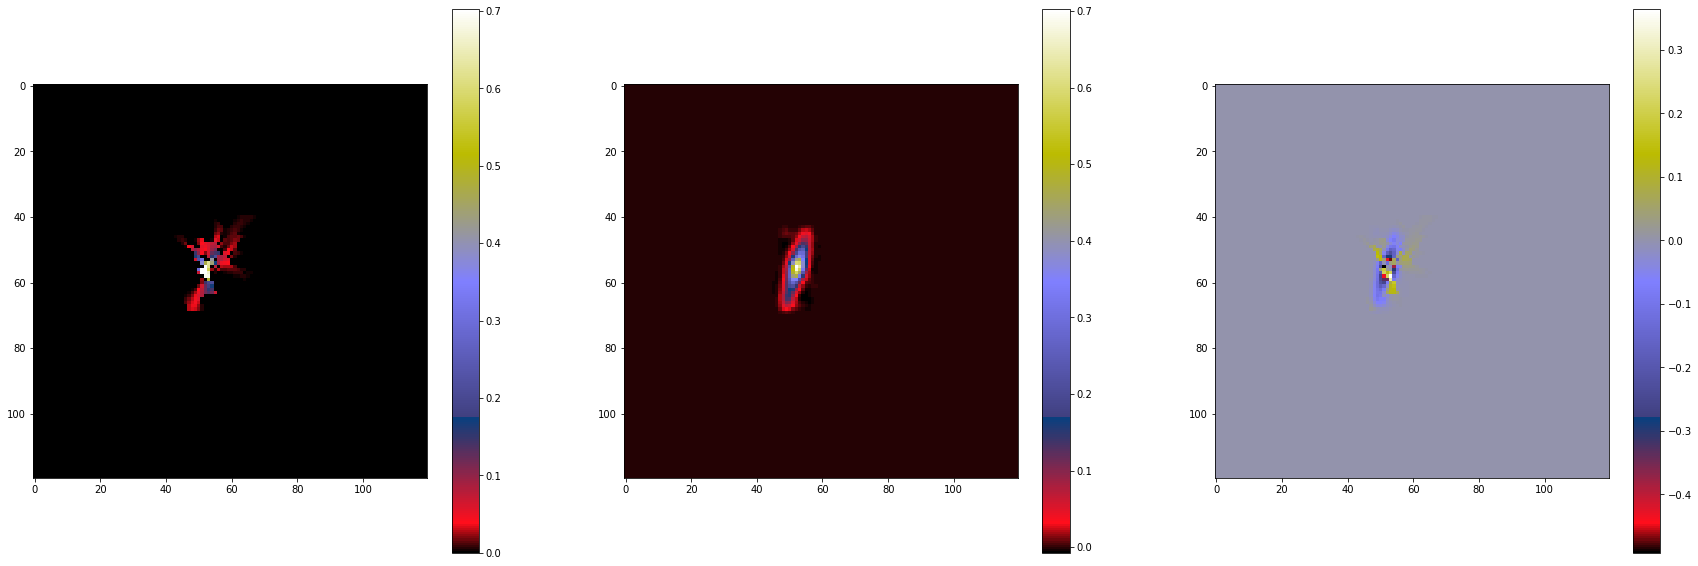

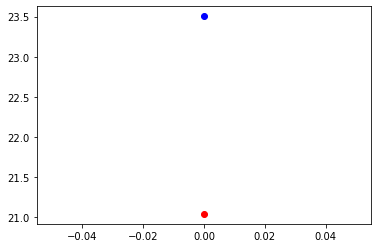

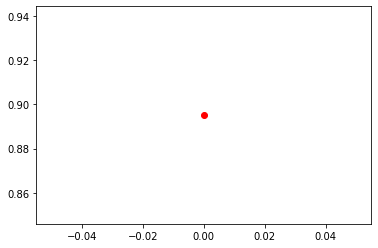

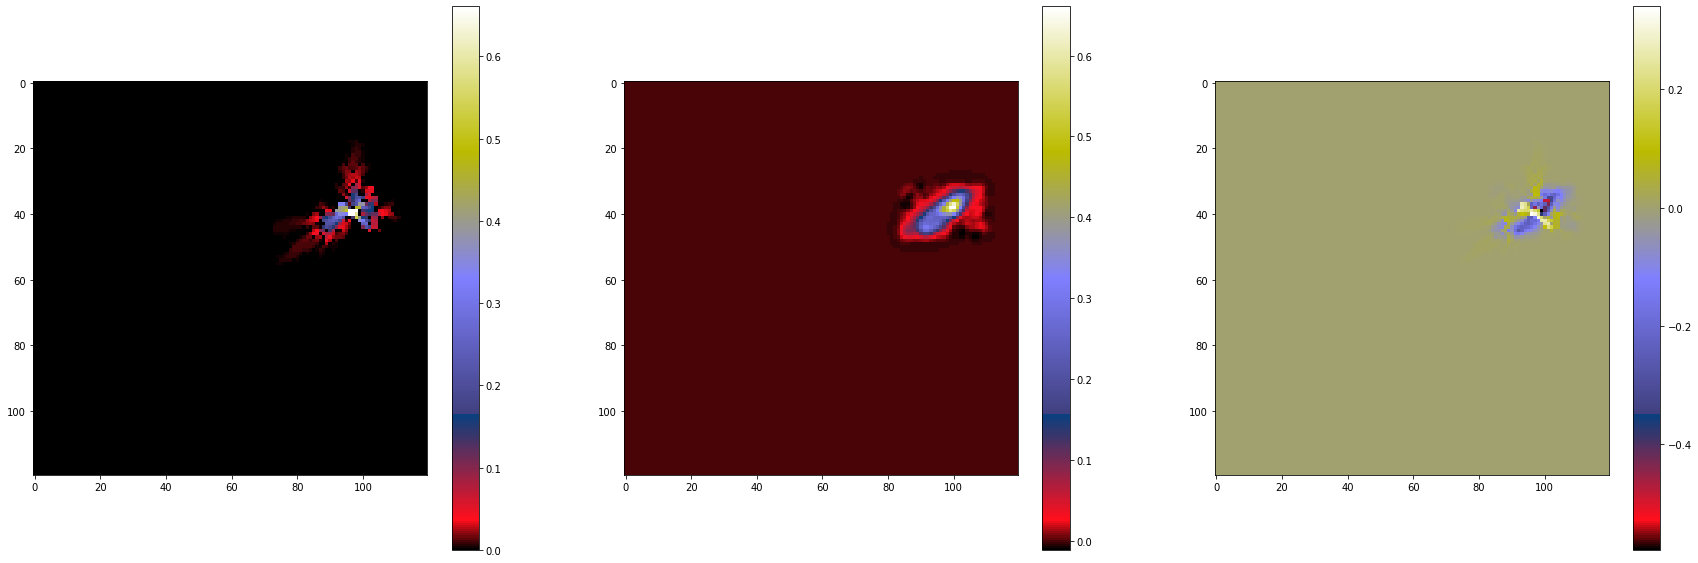

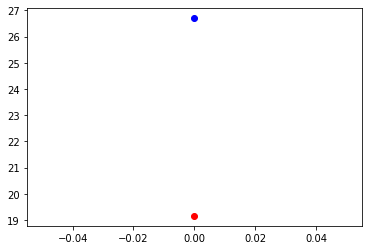

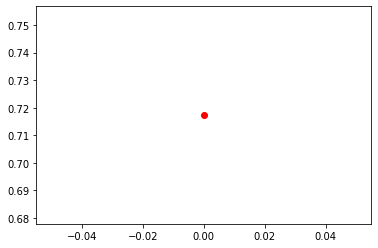

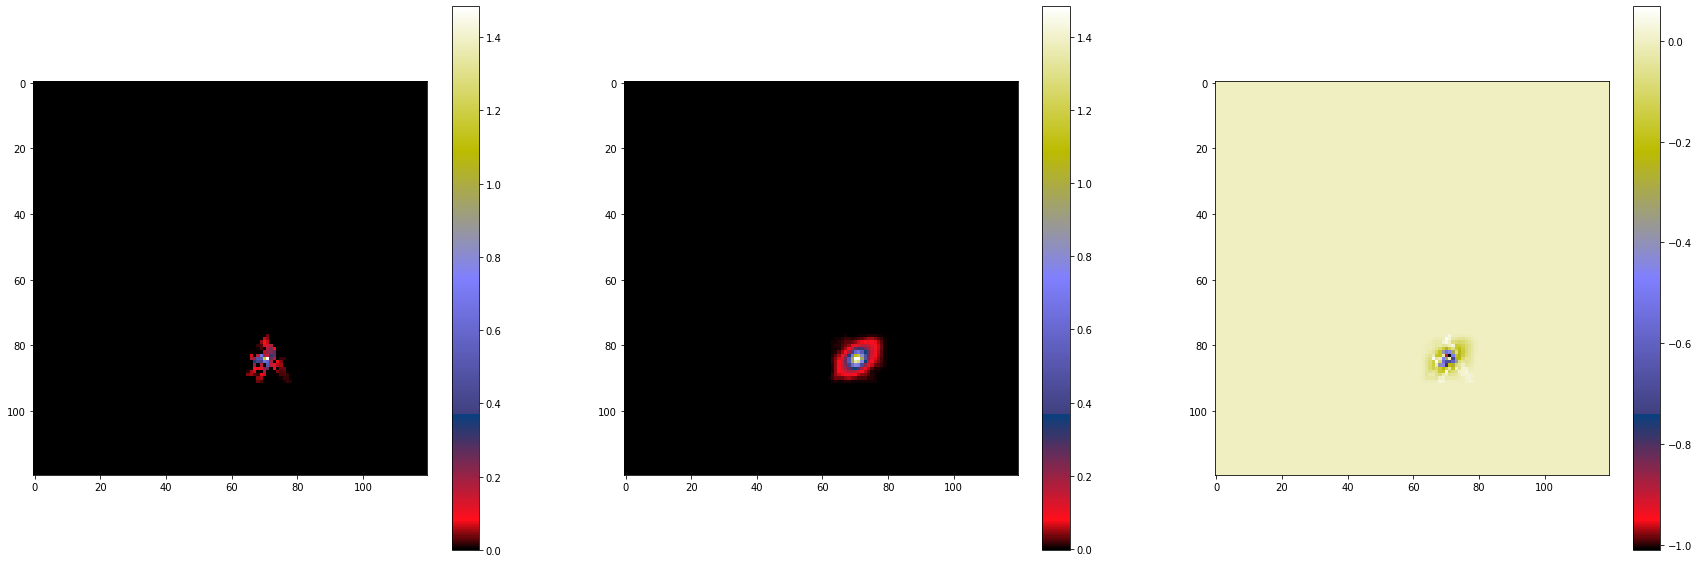

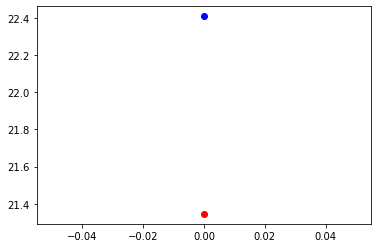

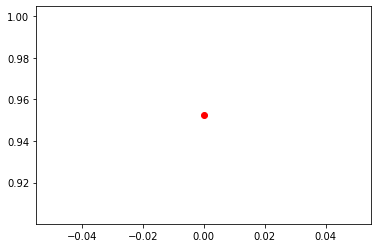

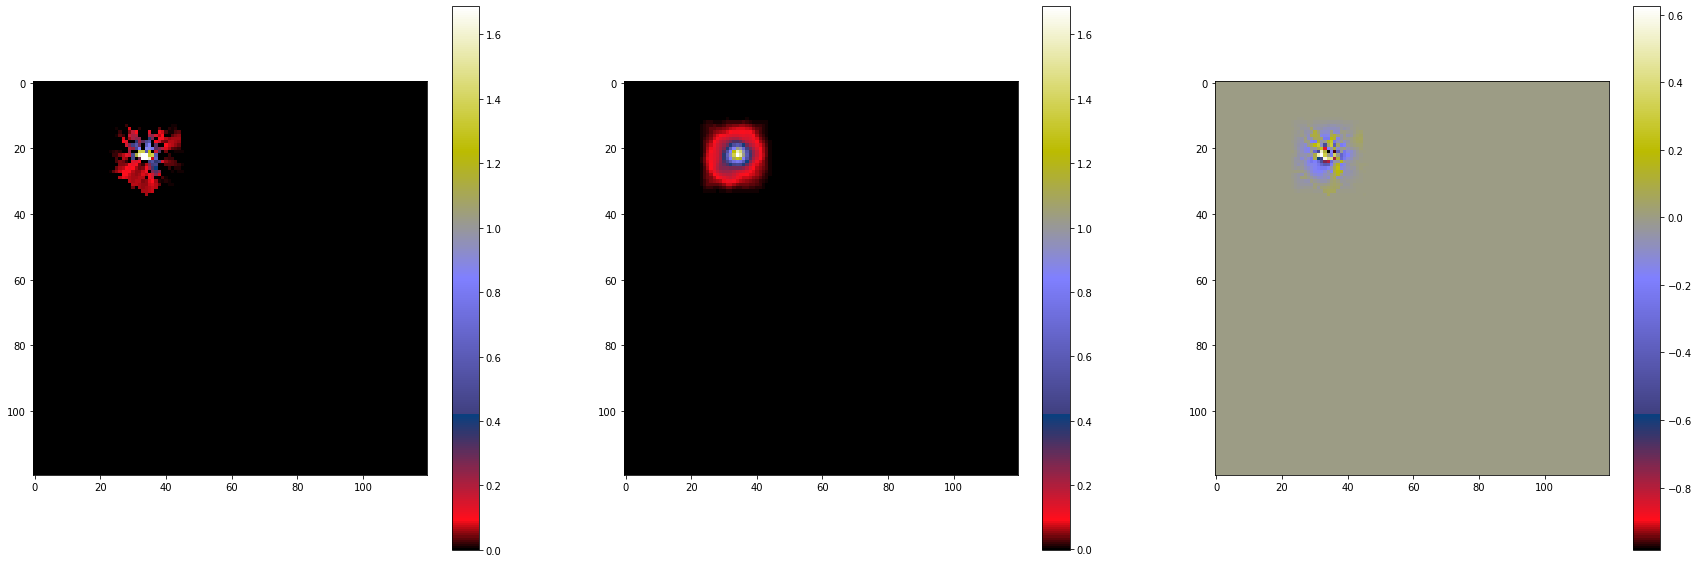

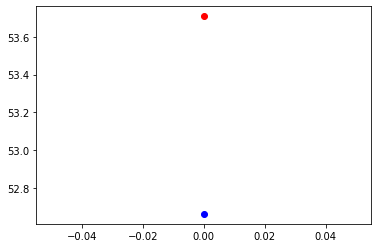

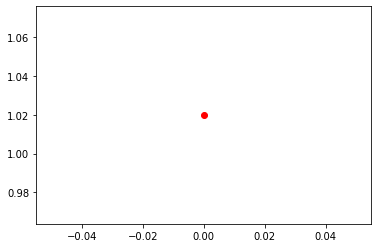

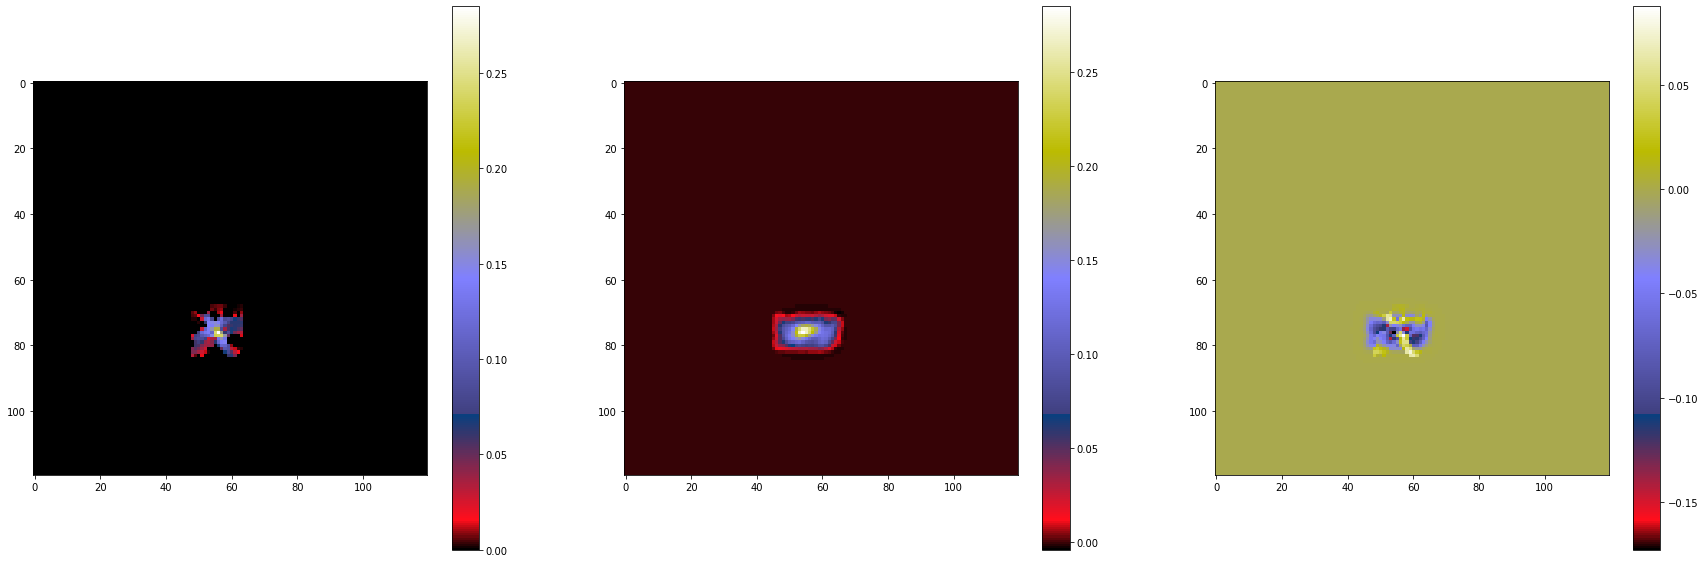

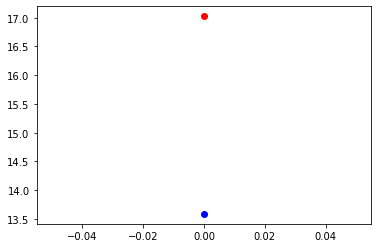

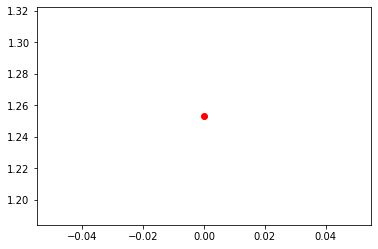

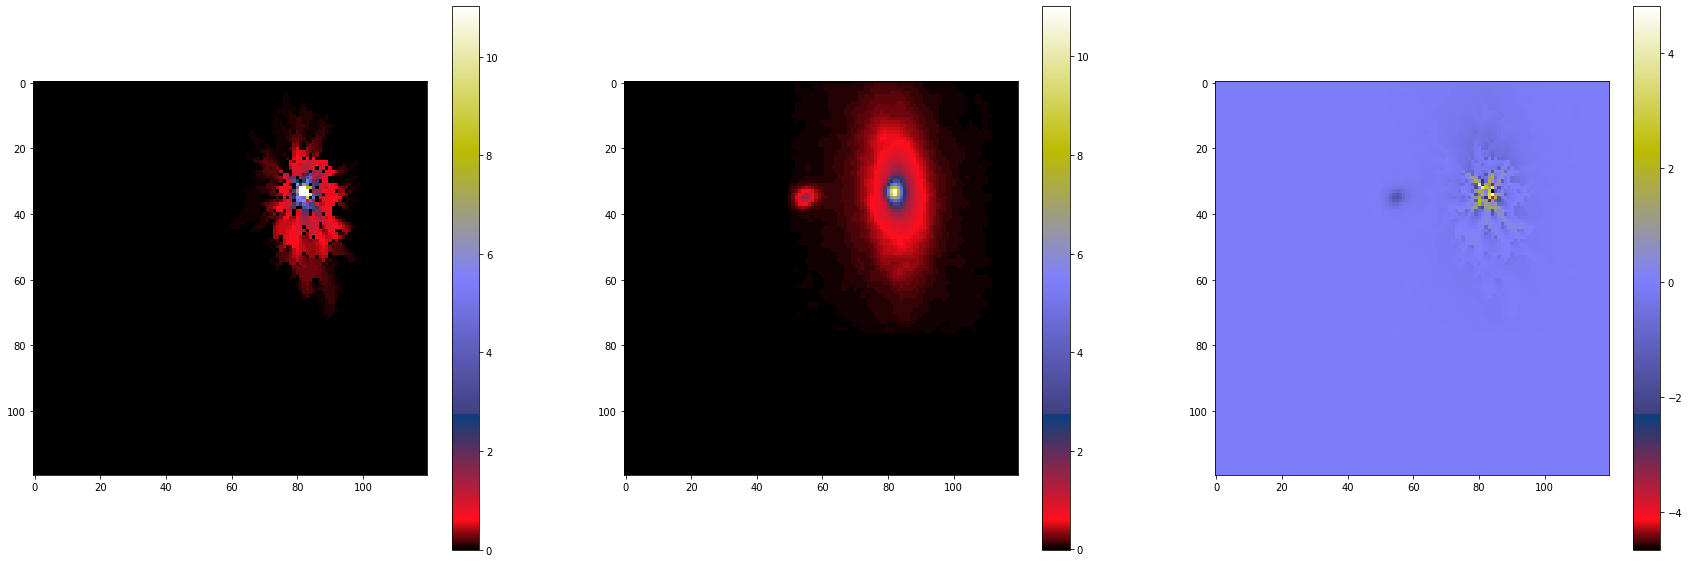

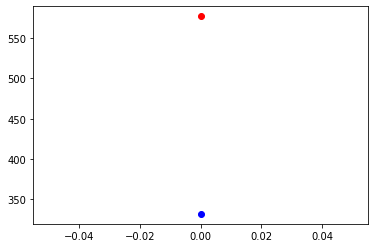

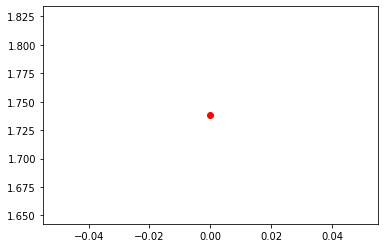

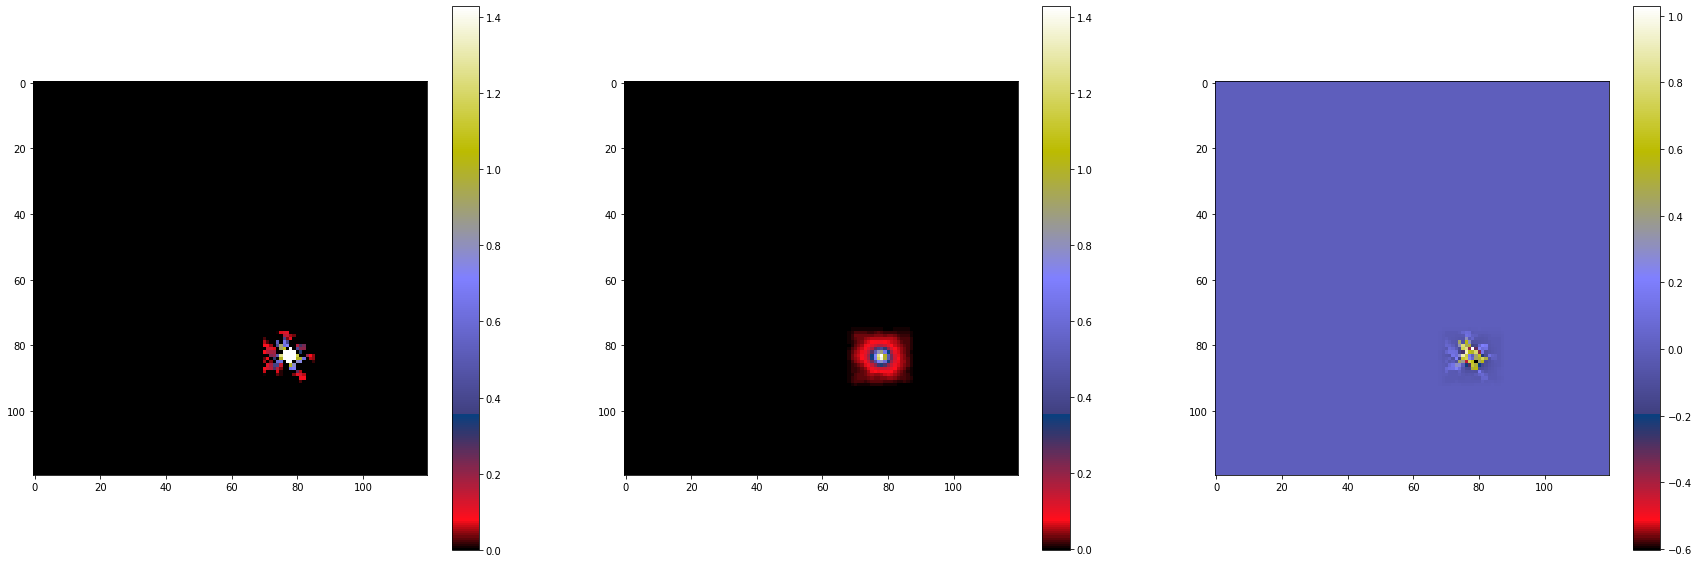

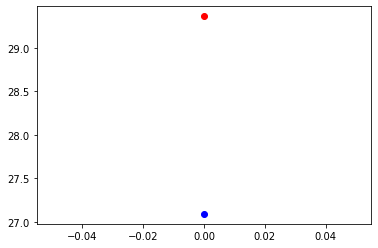

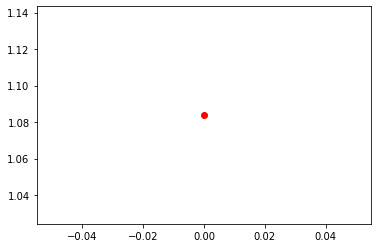

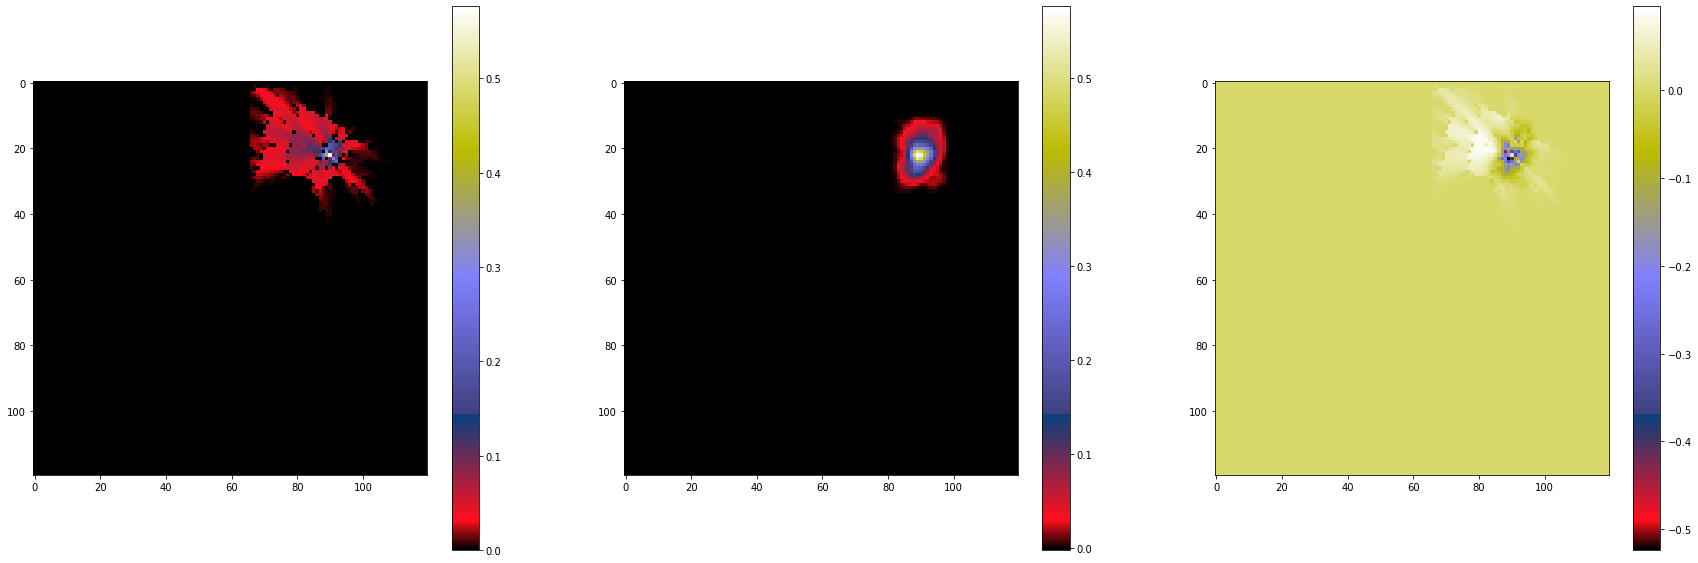

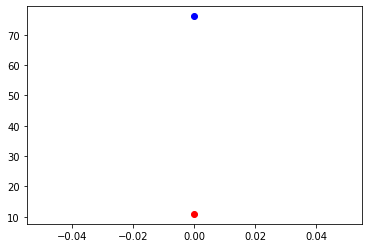

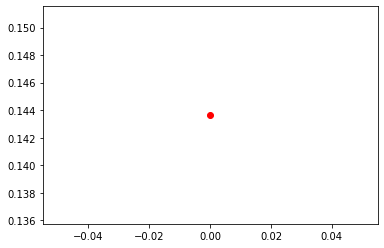

No PSF specified. Possible, but dangerous!
No PSF specified. Possible, but dangerous!


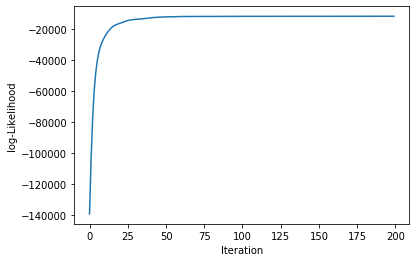

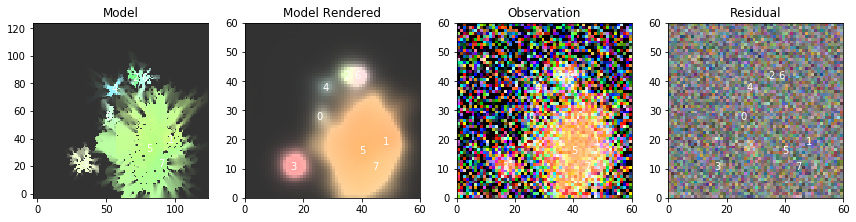

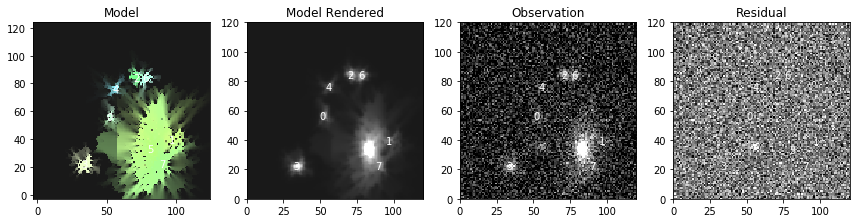

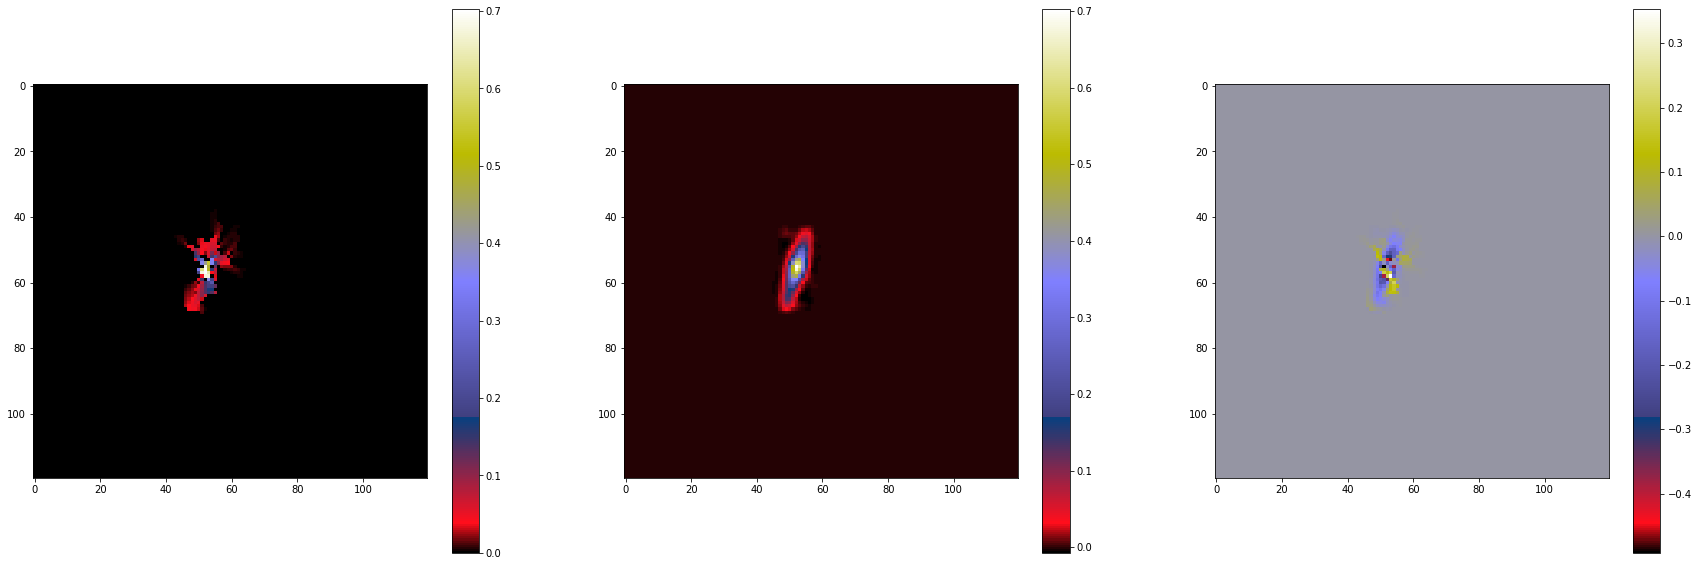

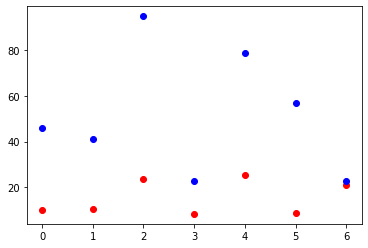

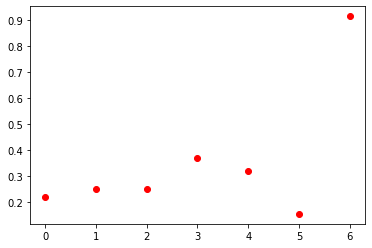

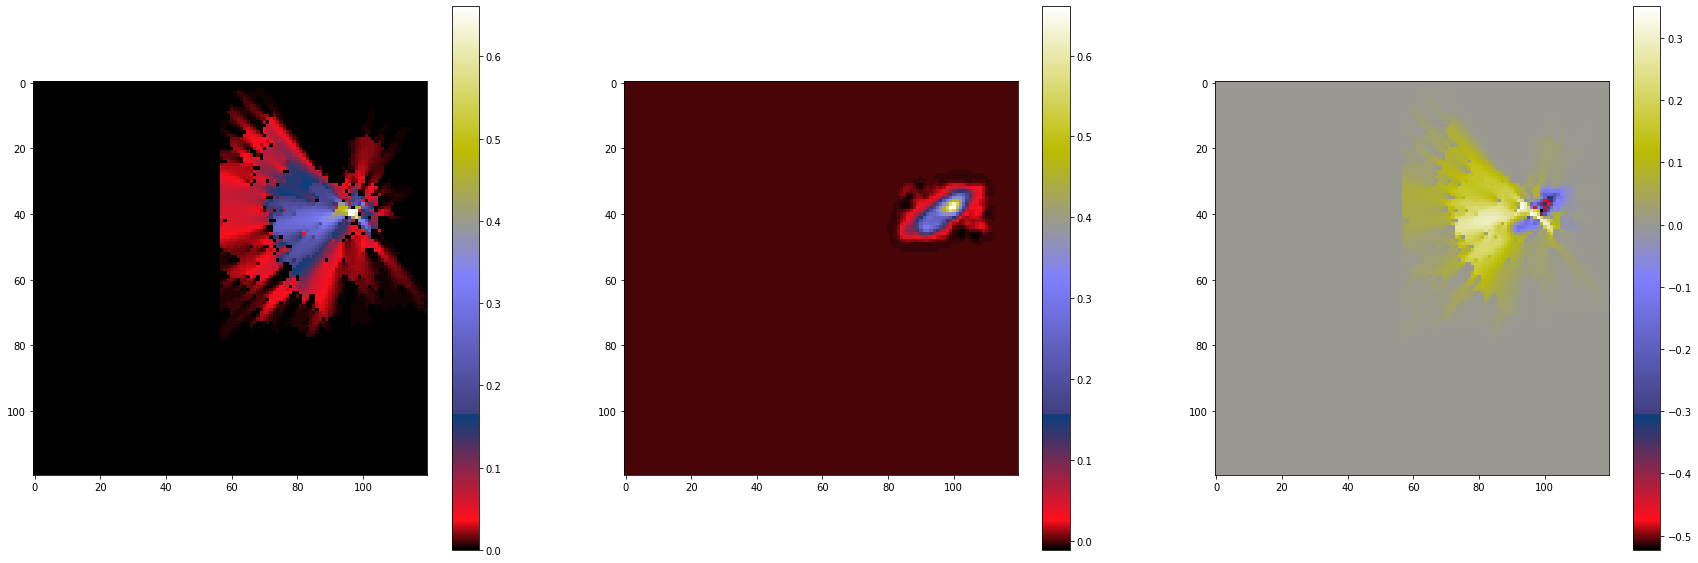

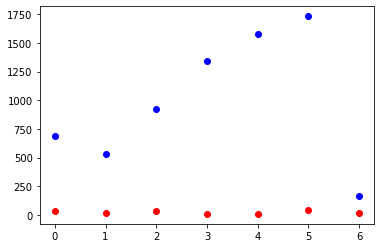

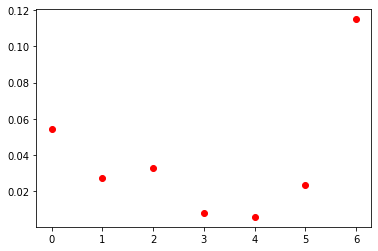

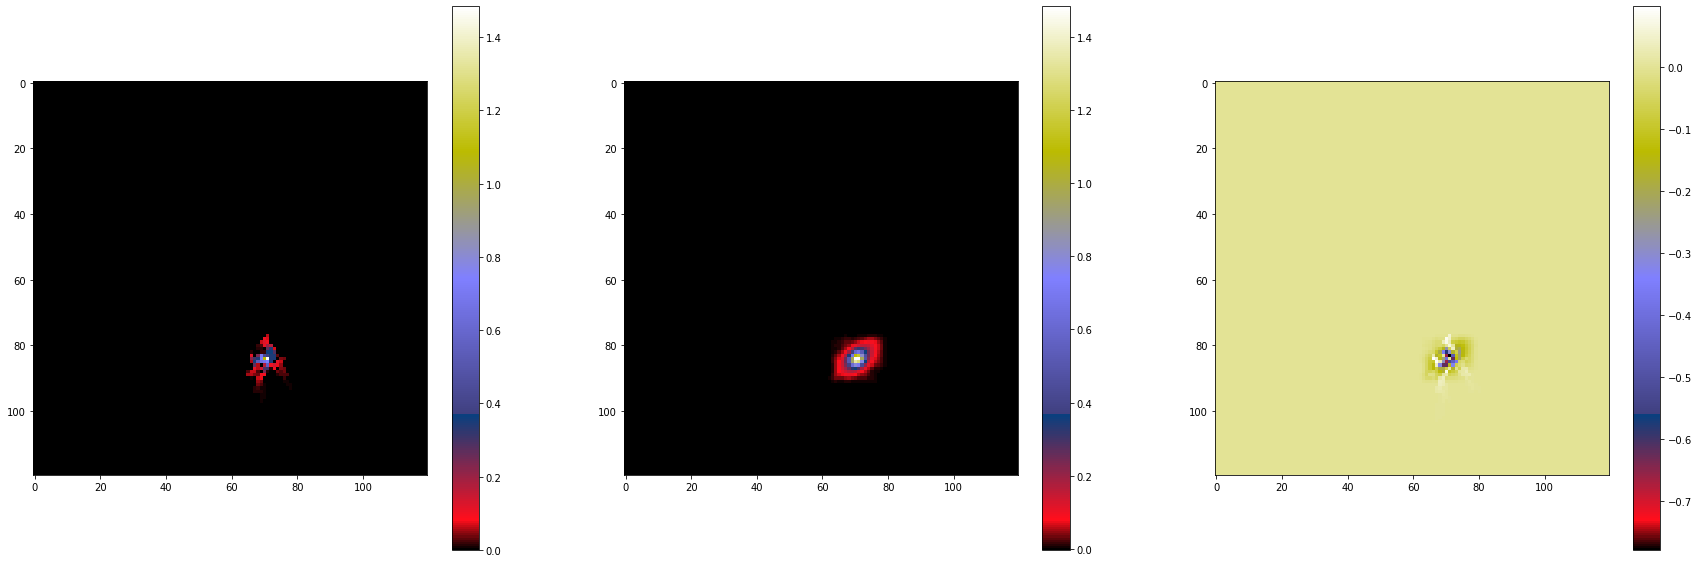

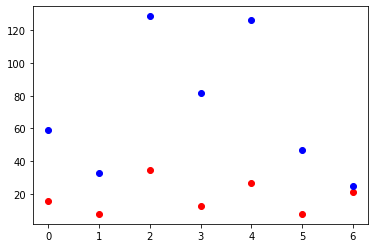

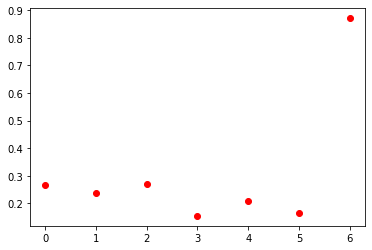

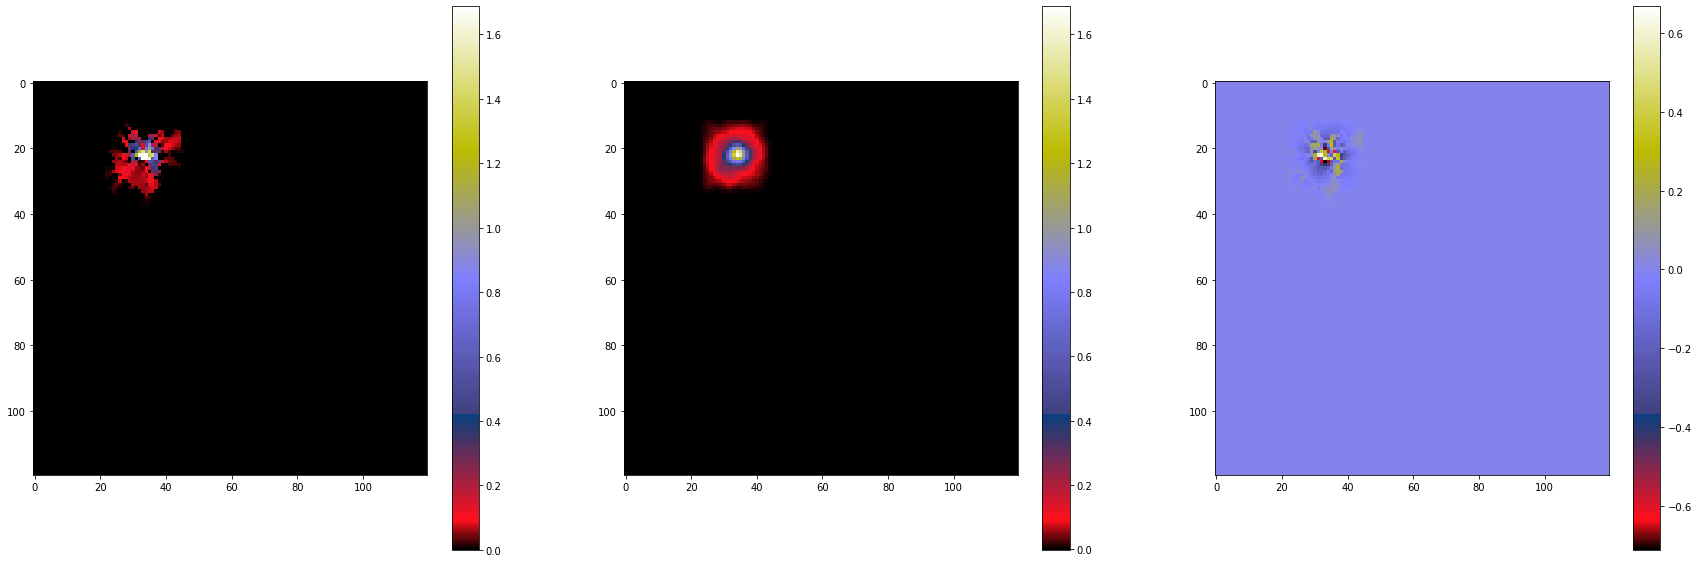

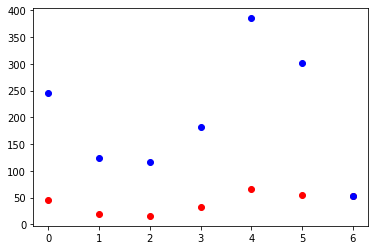

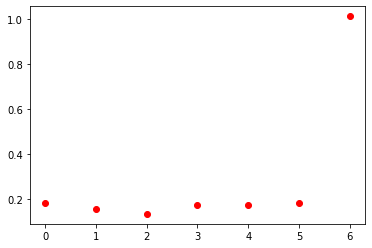

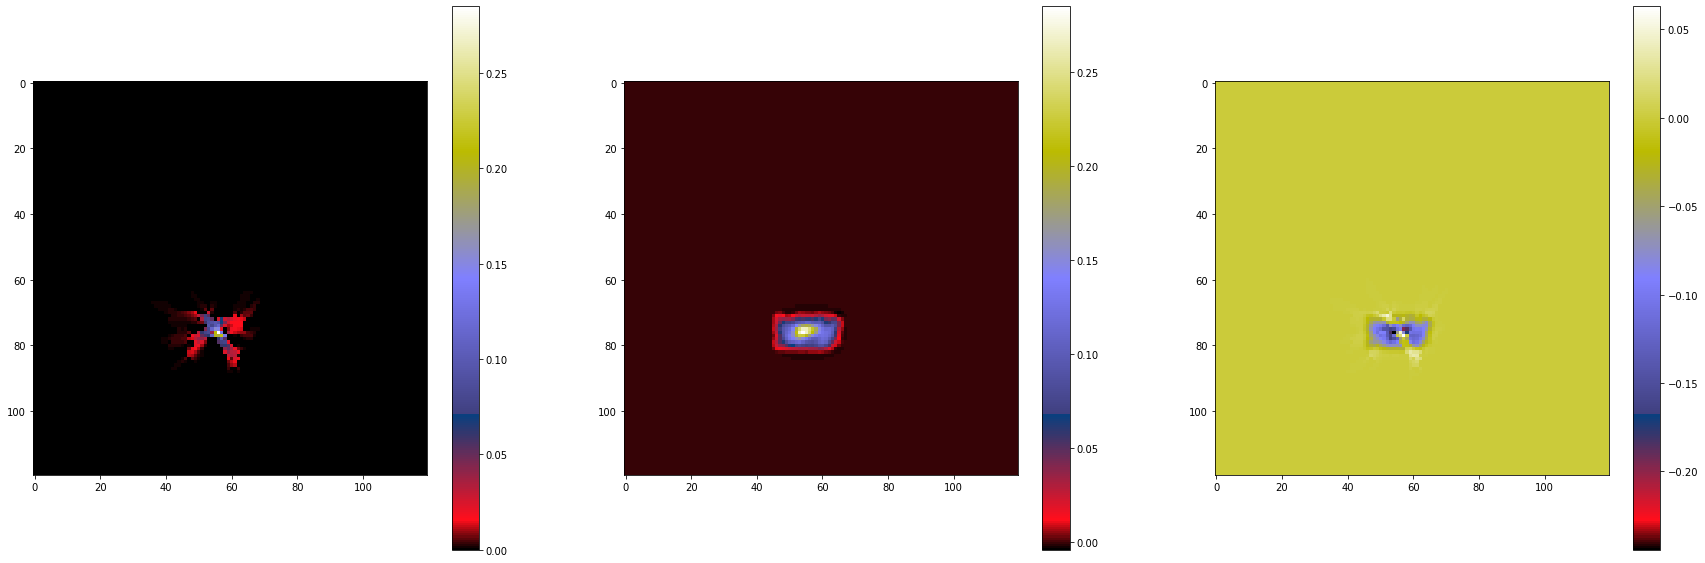

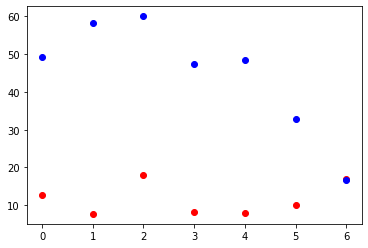

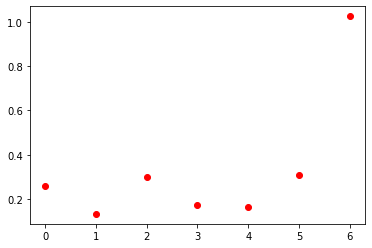

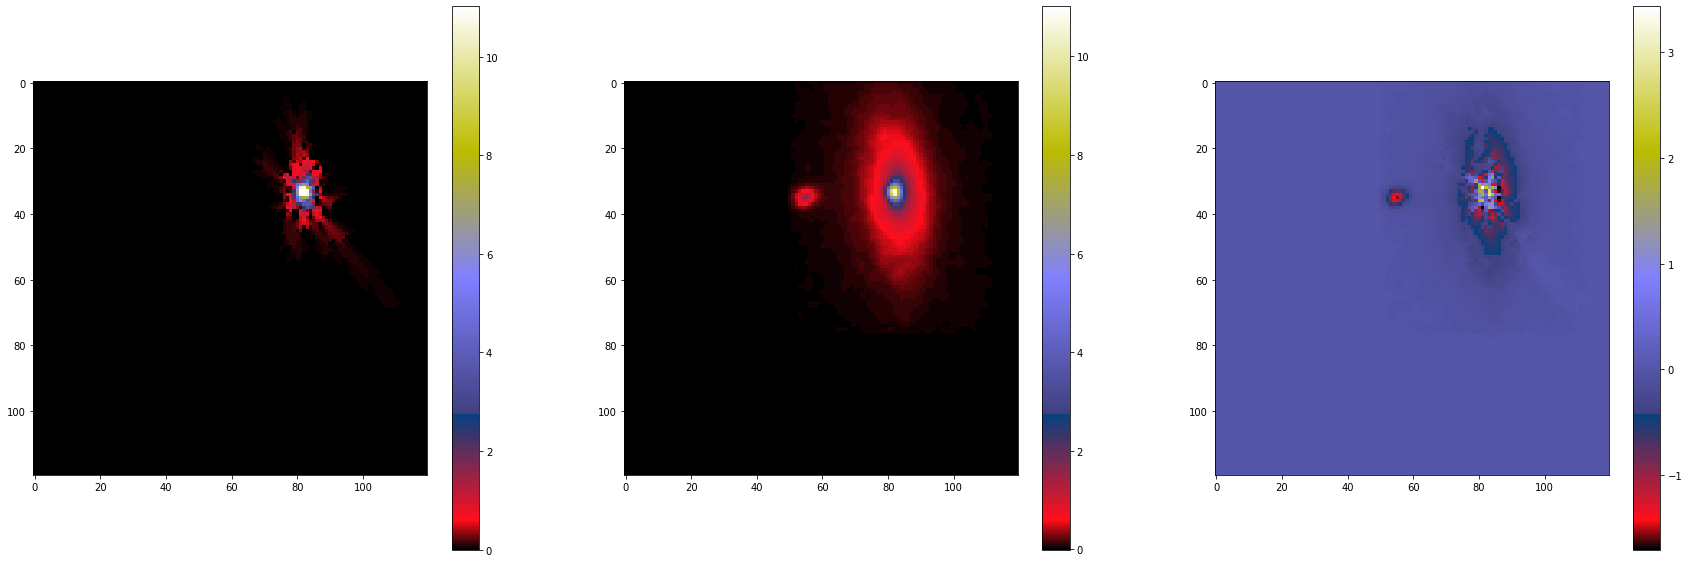

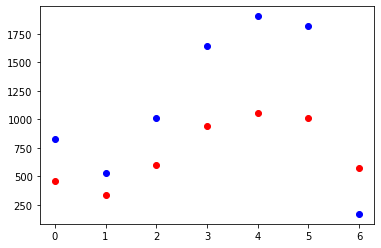

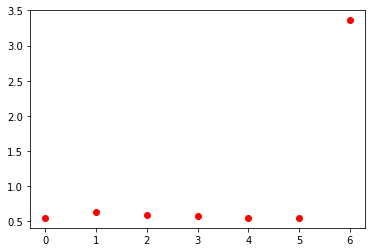

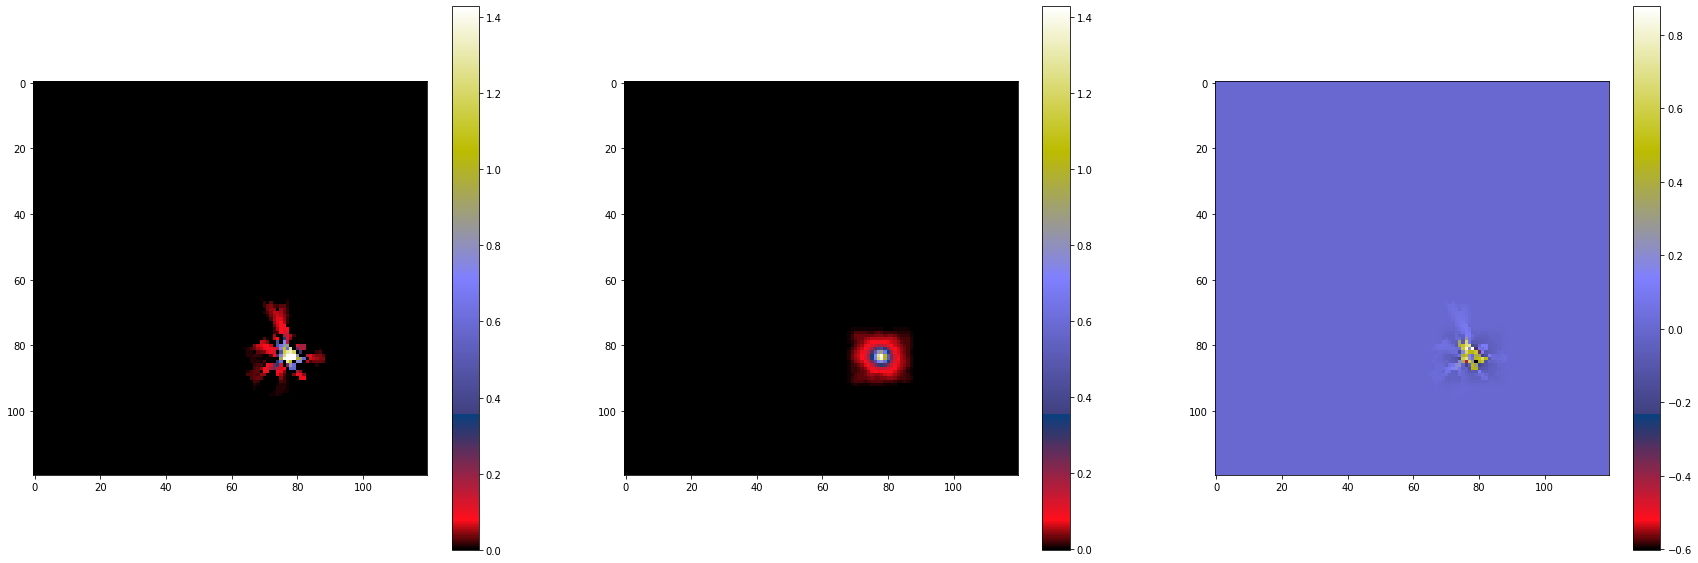

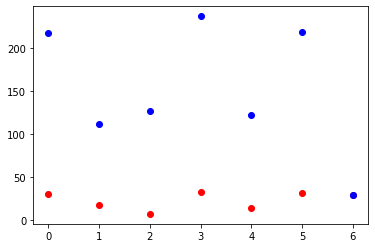

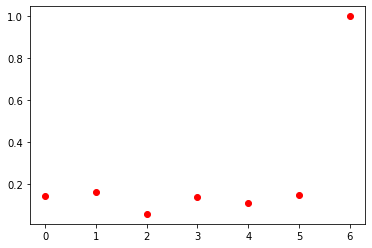

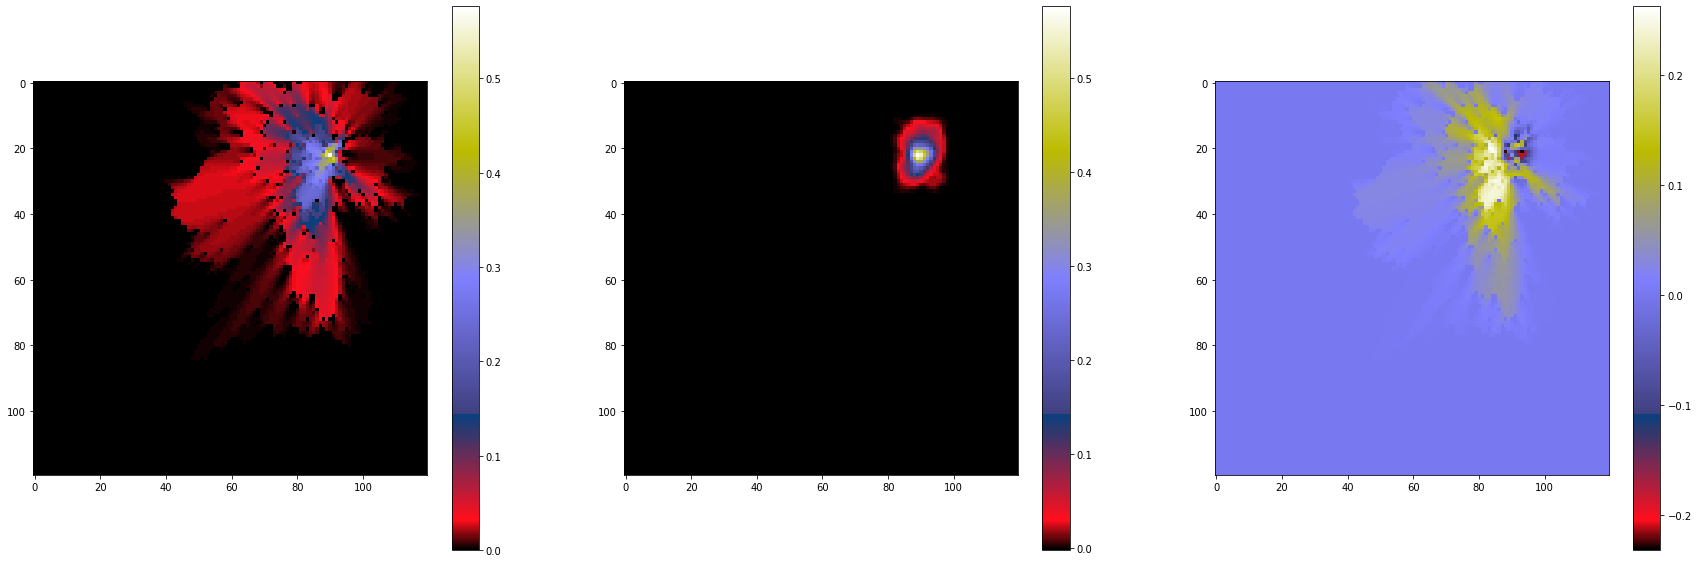

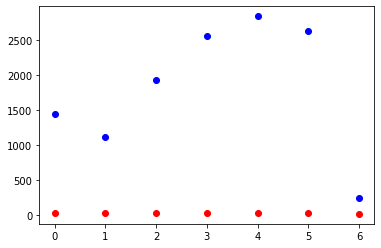

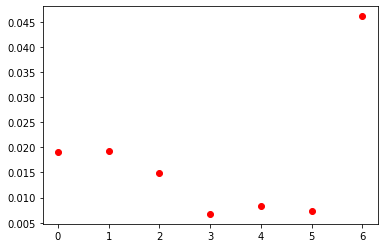

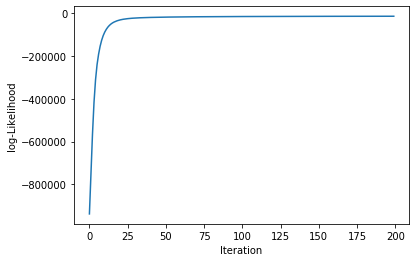

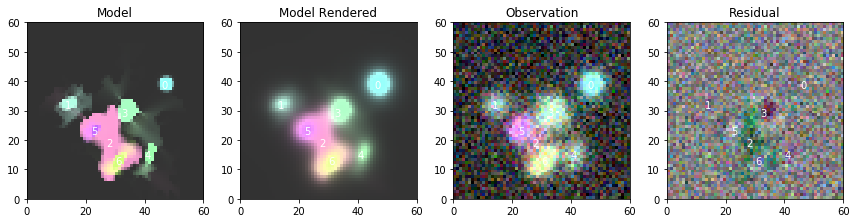

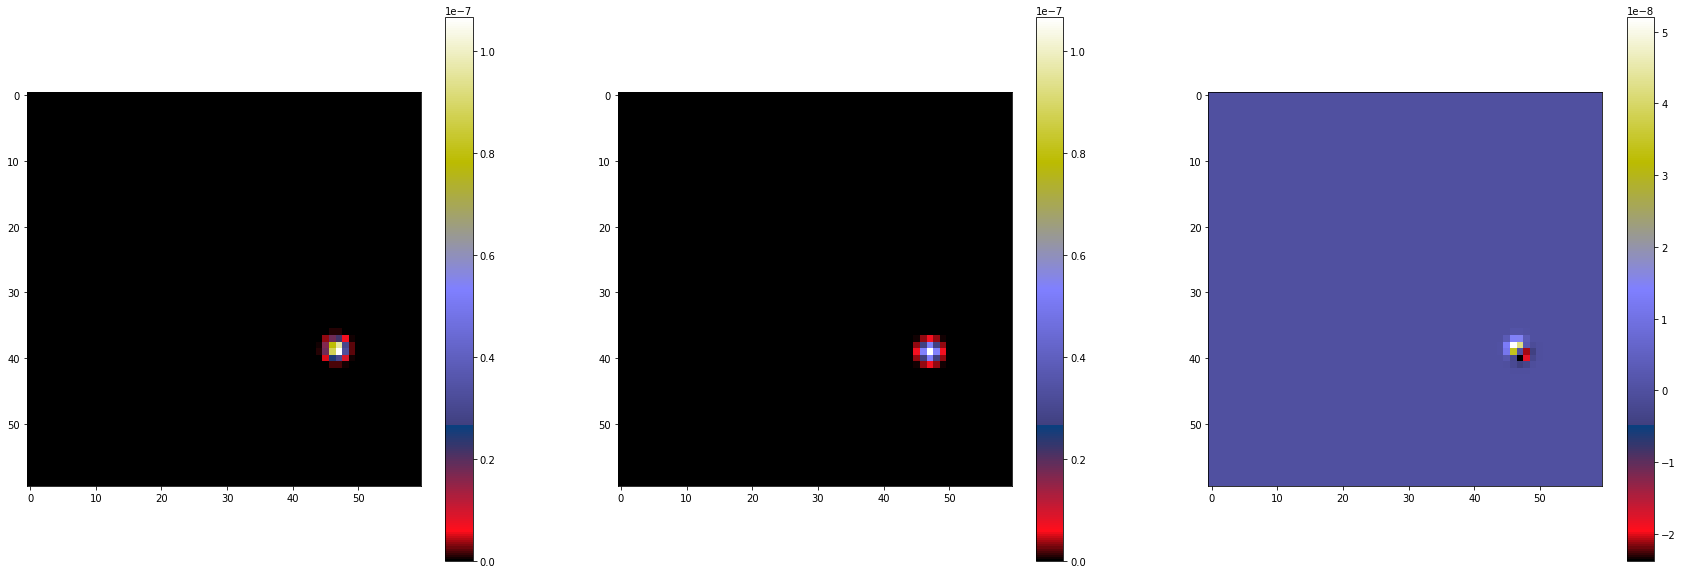

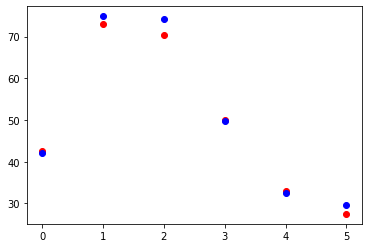

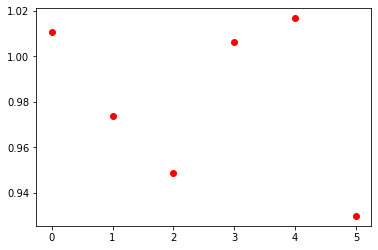

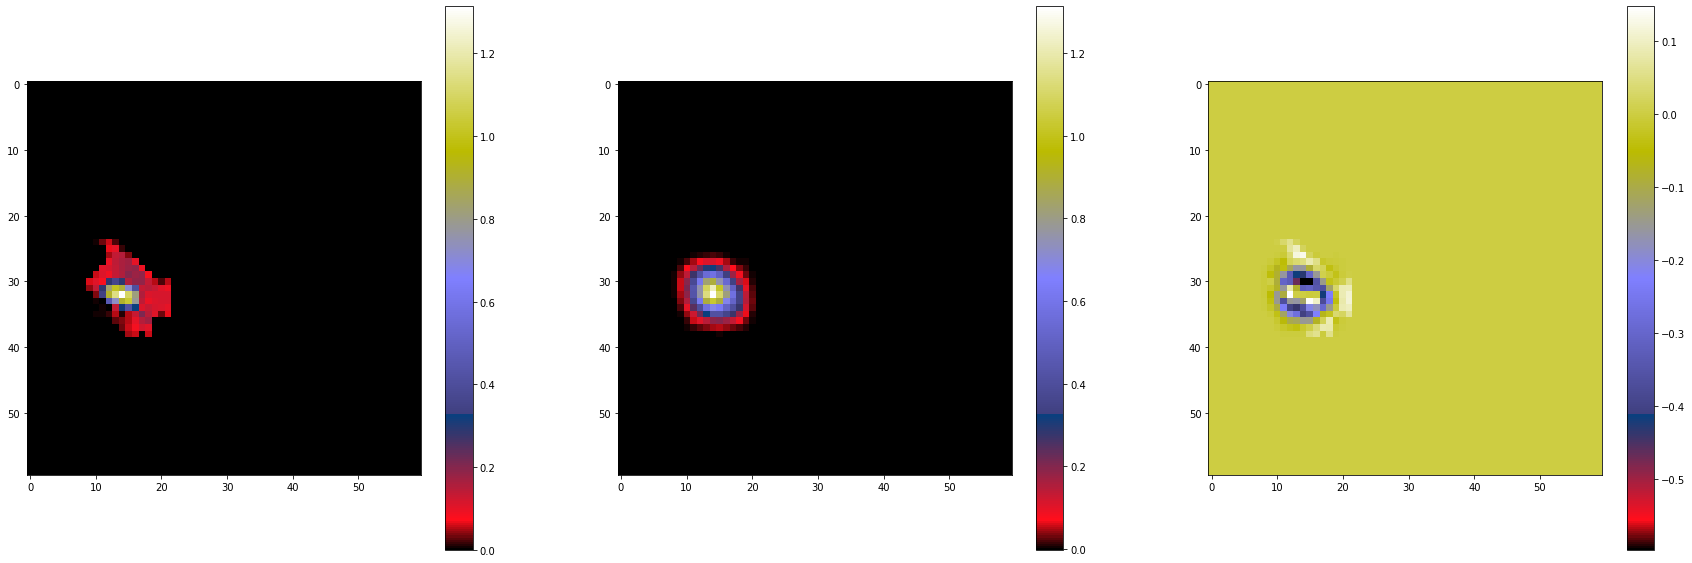

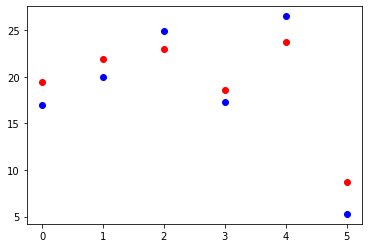

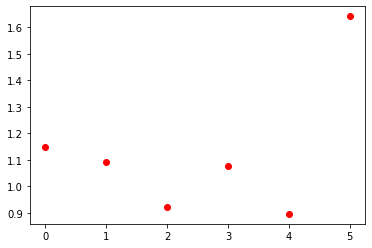

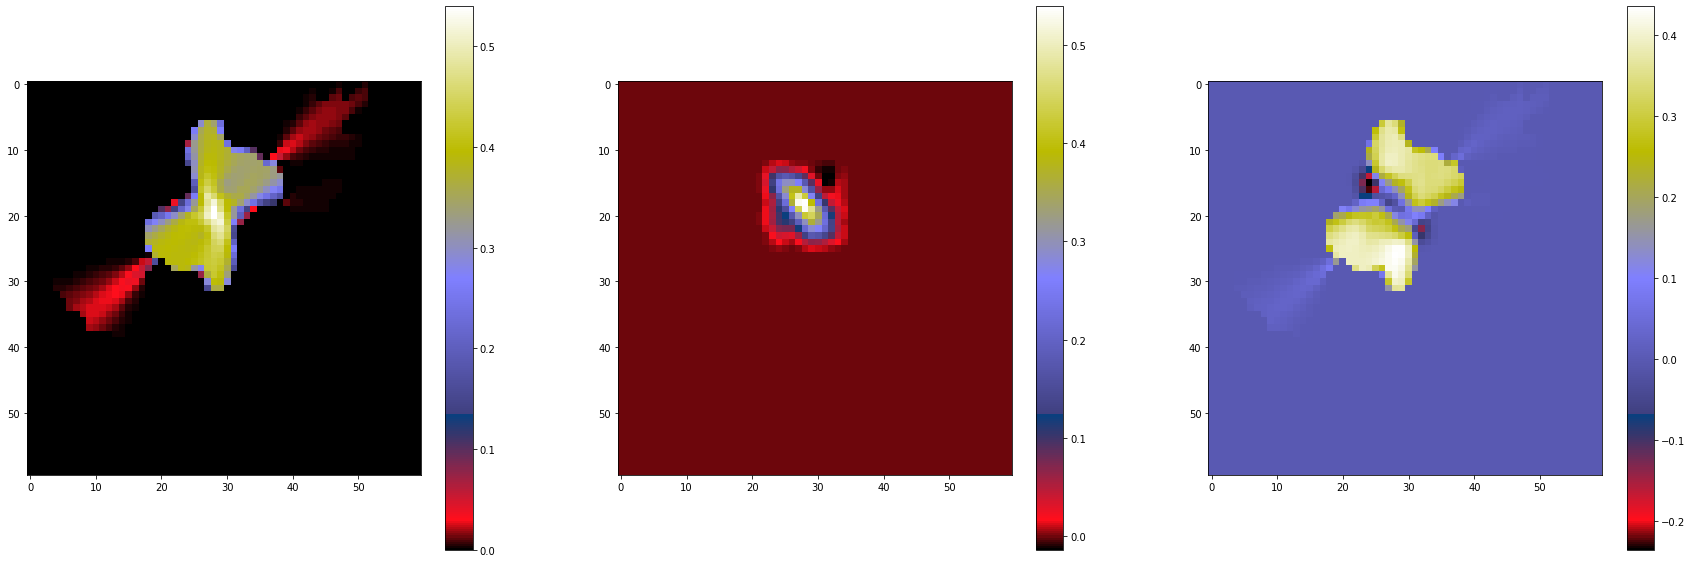

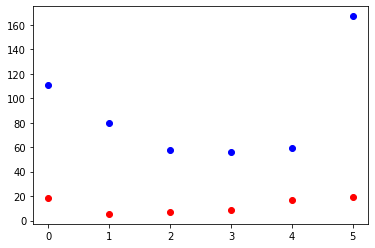

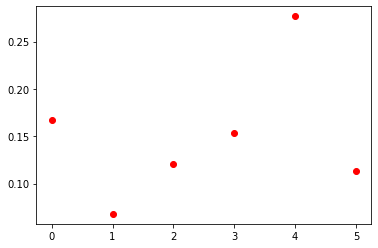

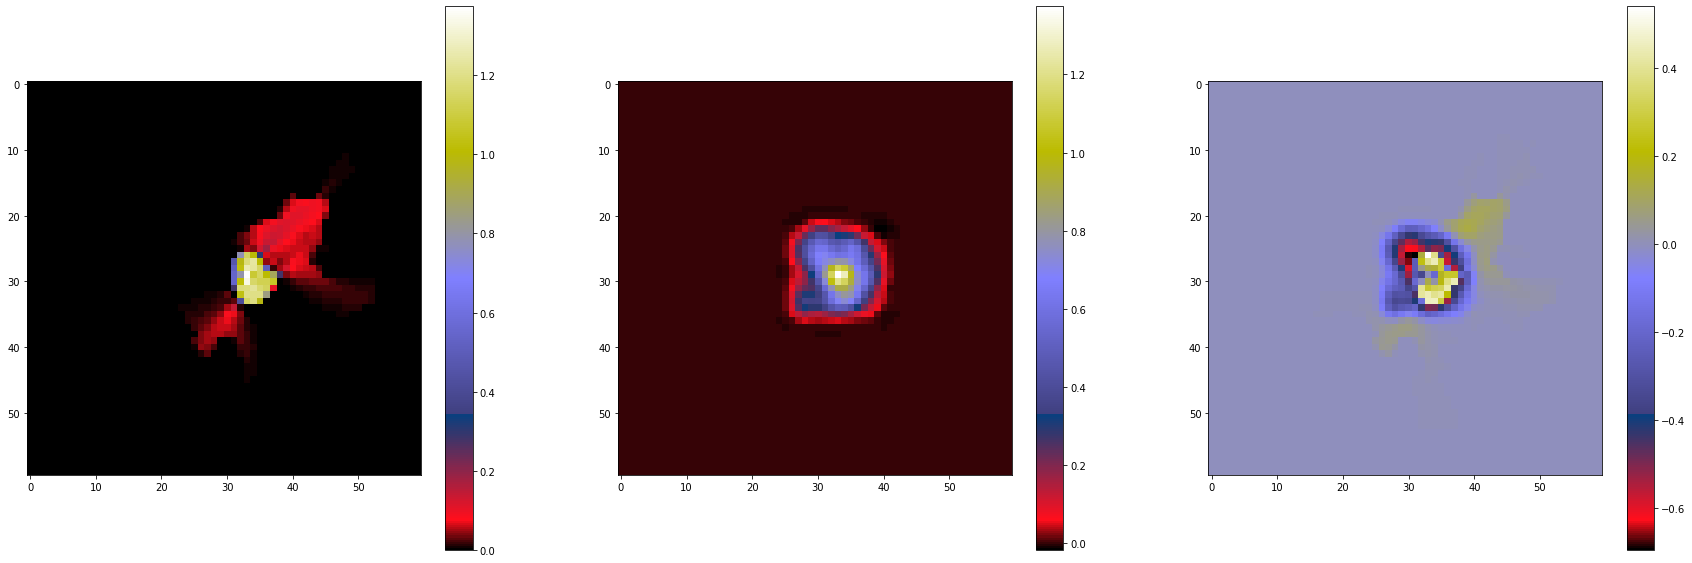

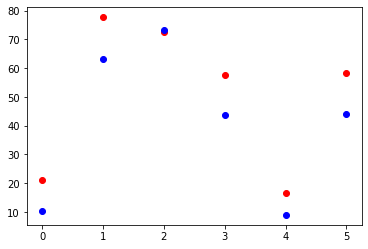

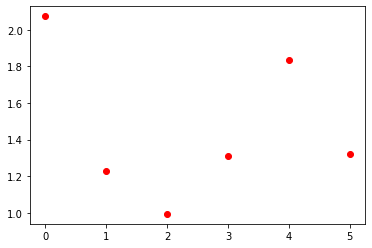

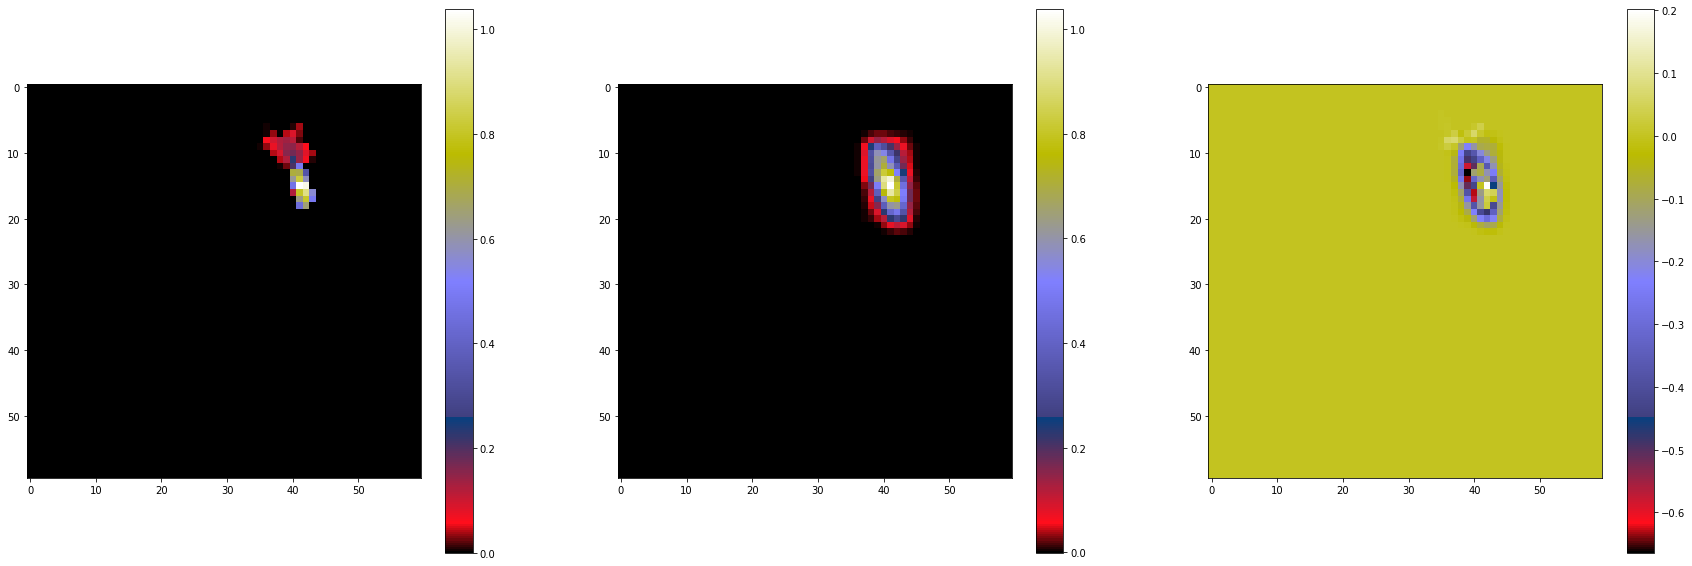

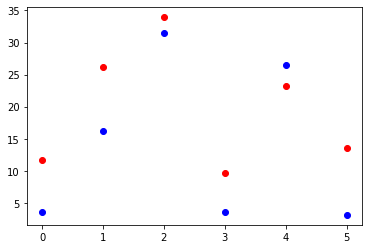

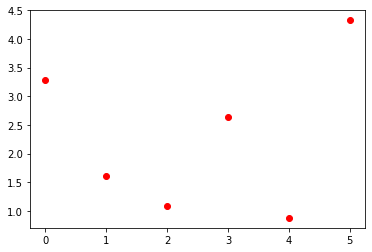

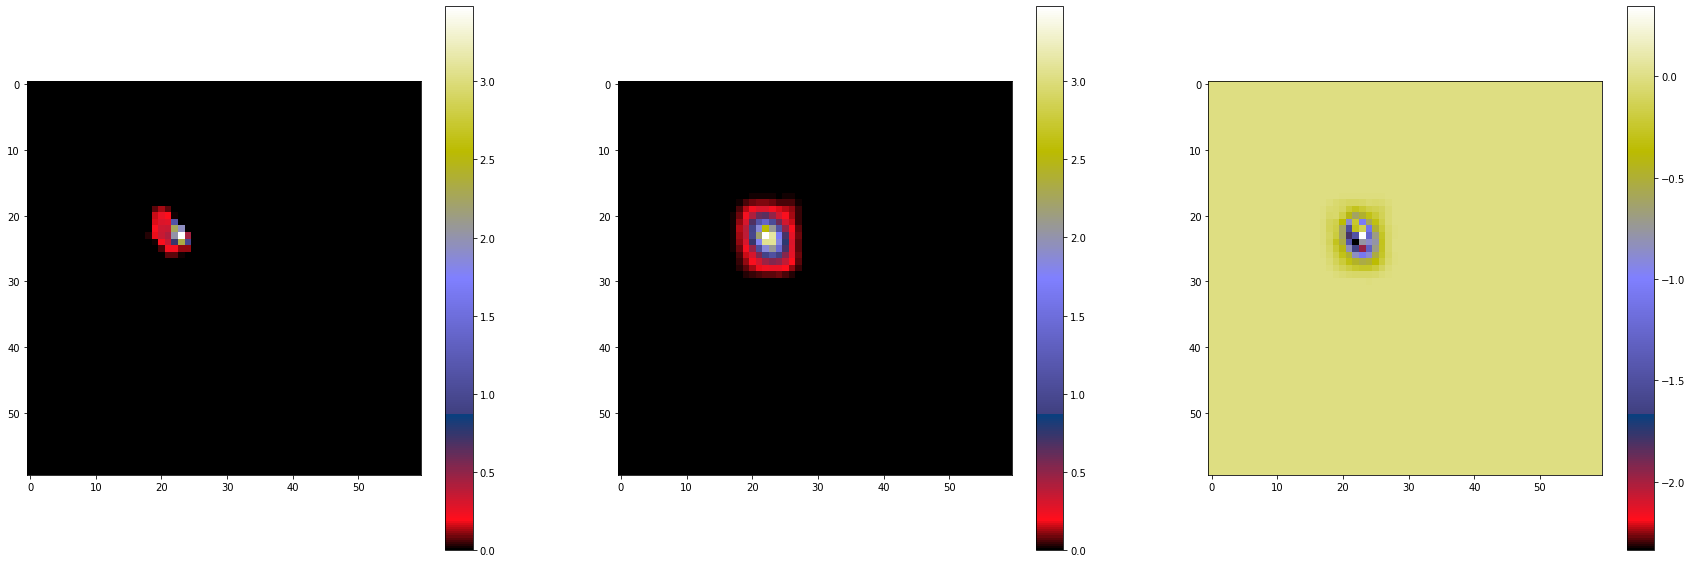

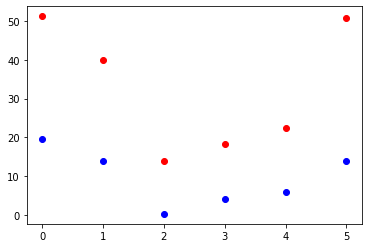

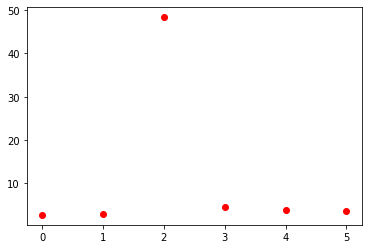

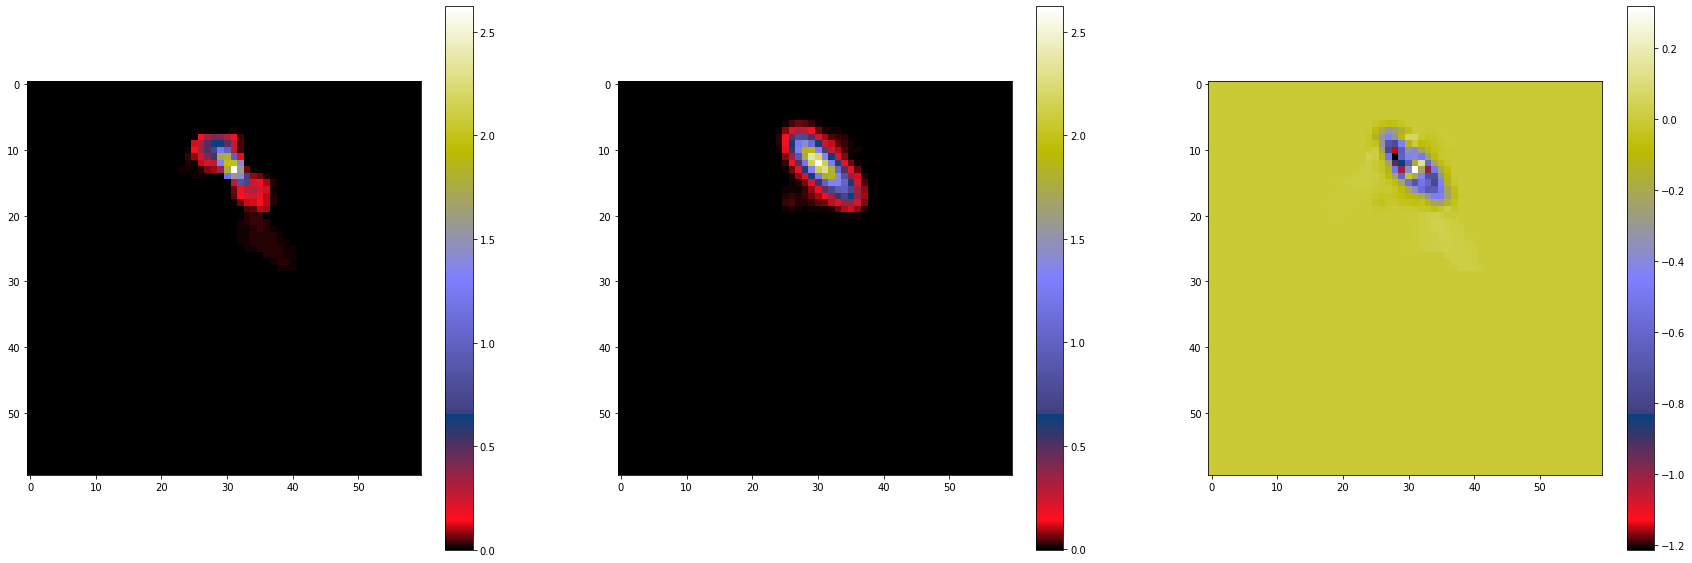

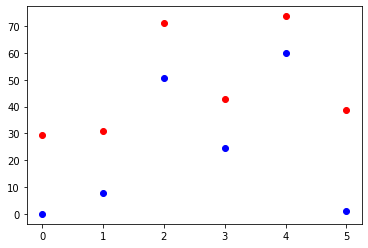

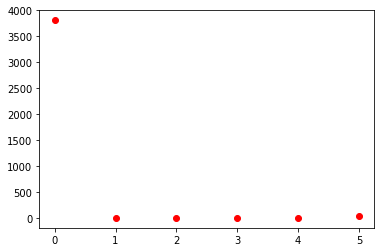

Zero or negative SED [-0.04862435] at y=0.33692824099957236, x=-0.5783032402369946
No flux above threshold for source at y=0.33692824099957236 x=-0.5783032402369946
No flux above threshold for source at y=0.3362196996567772 x=-0.5785351334313662


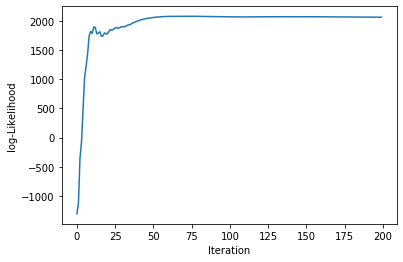

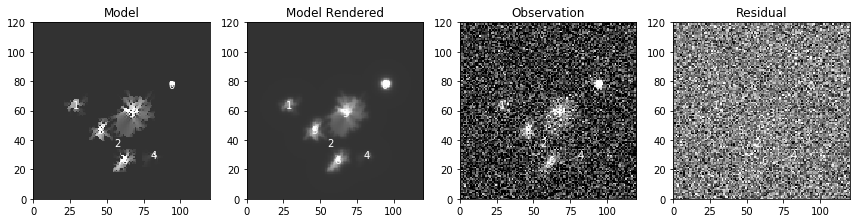

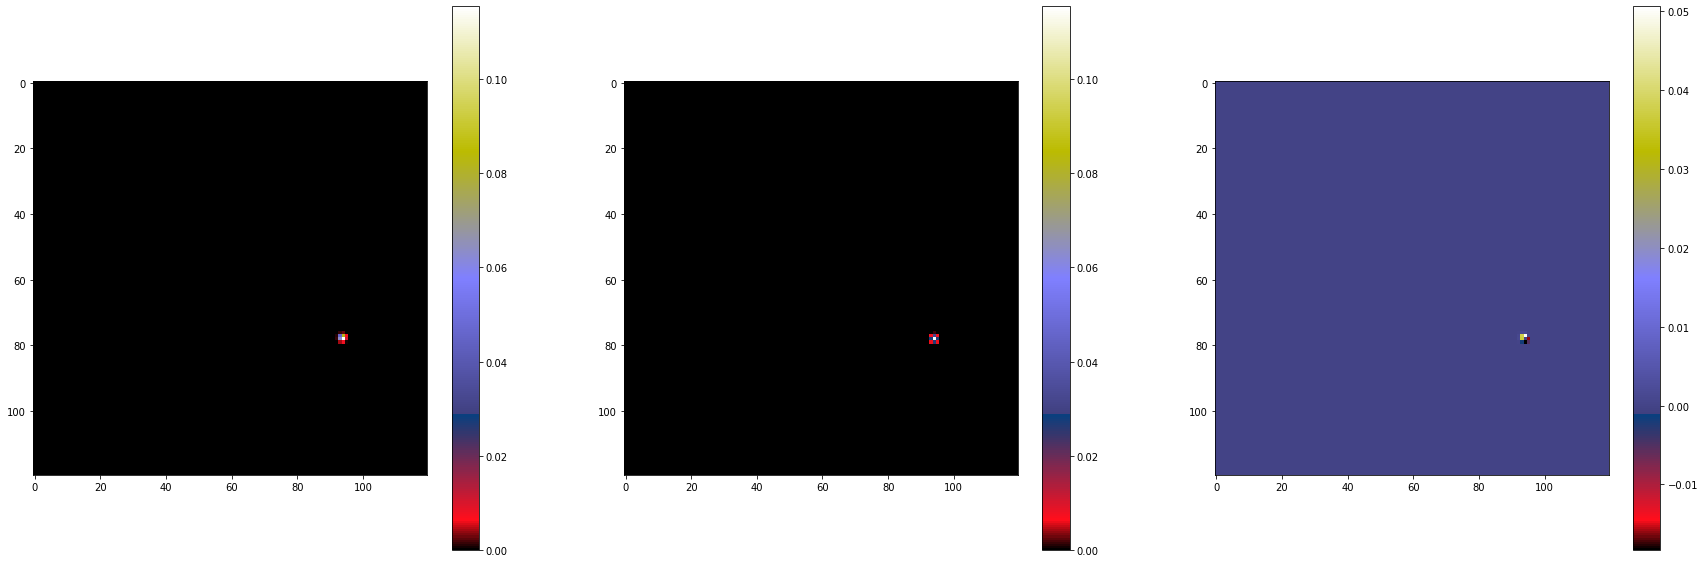

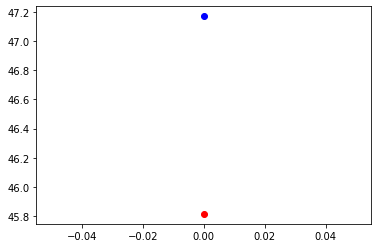

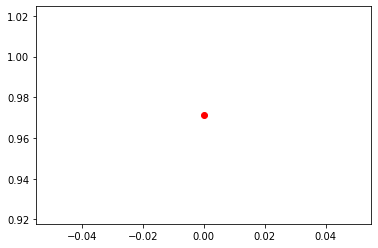

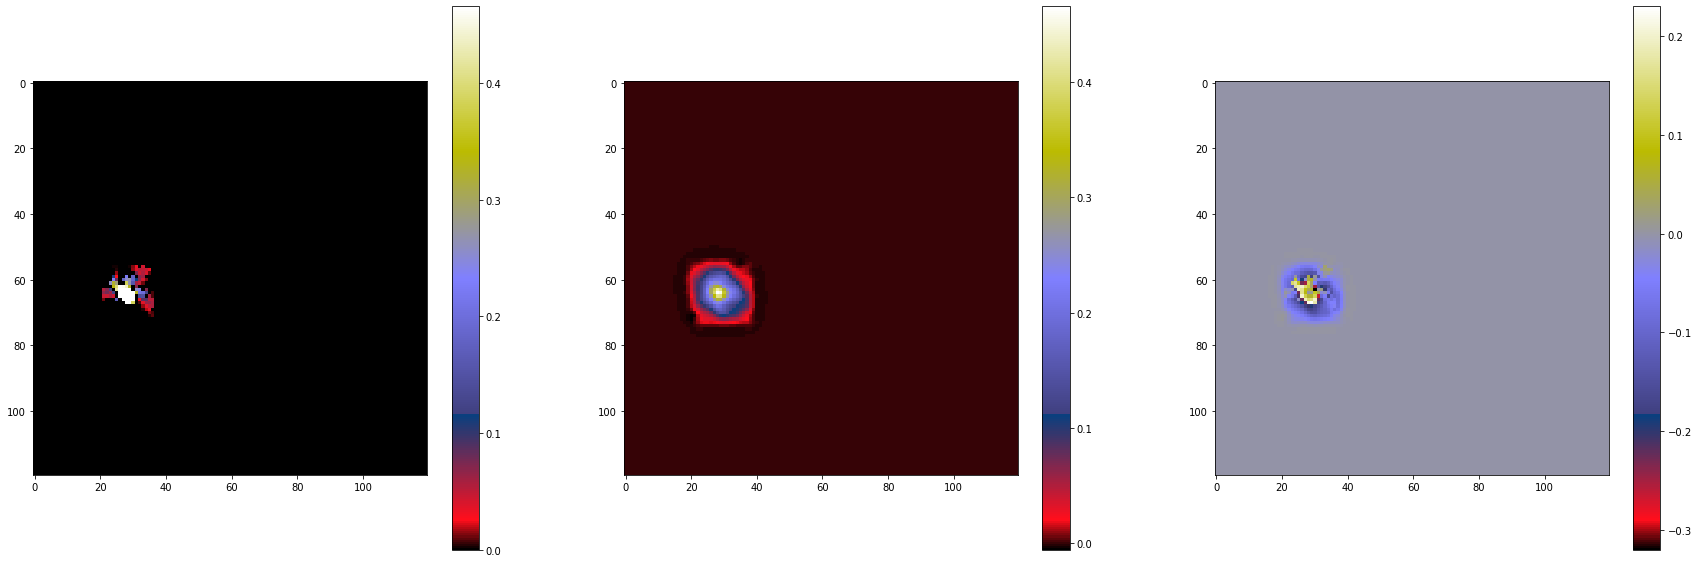

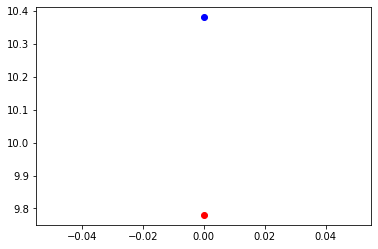

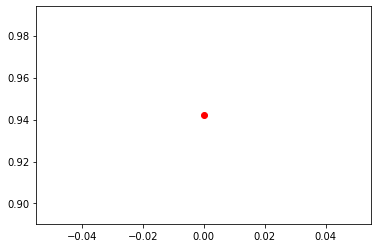

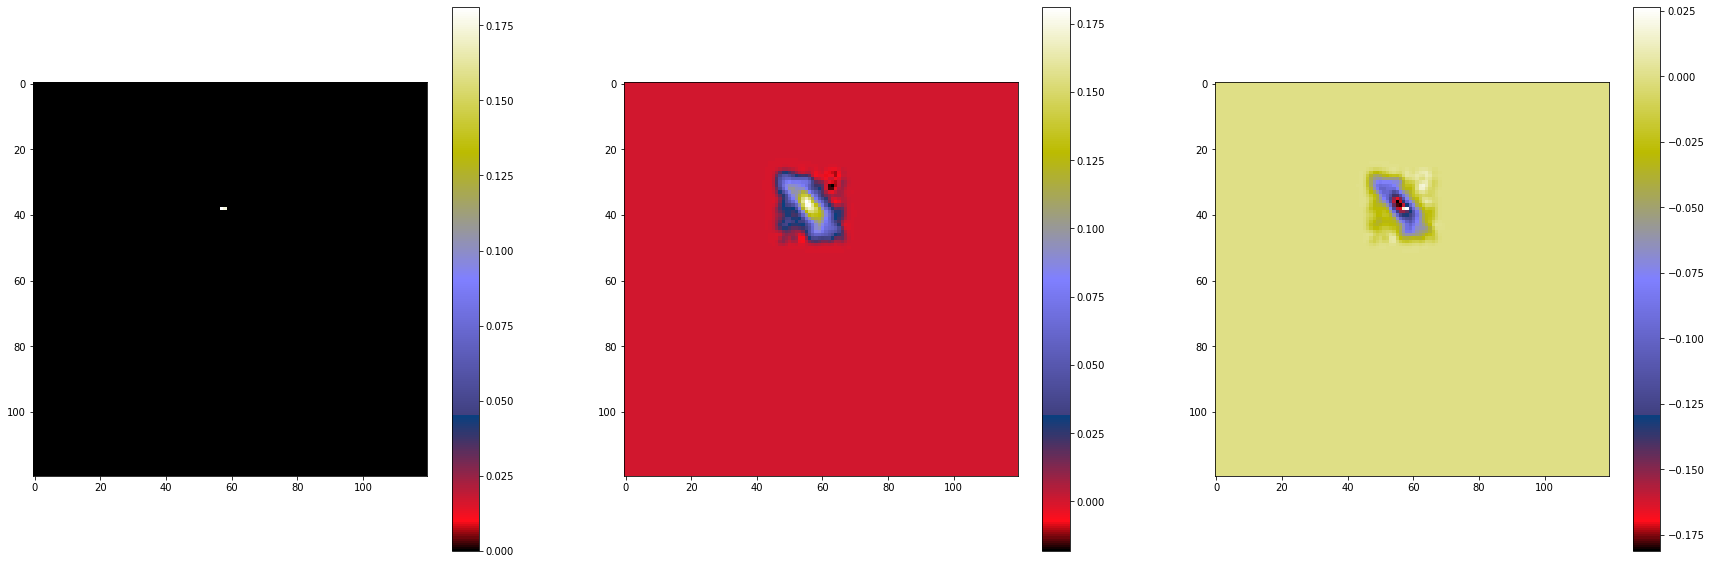

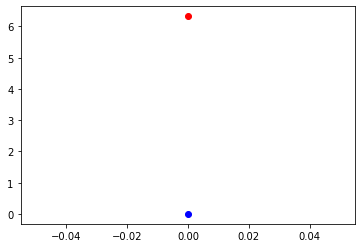

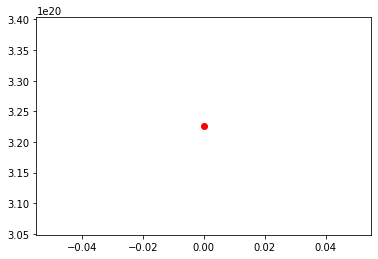

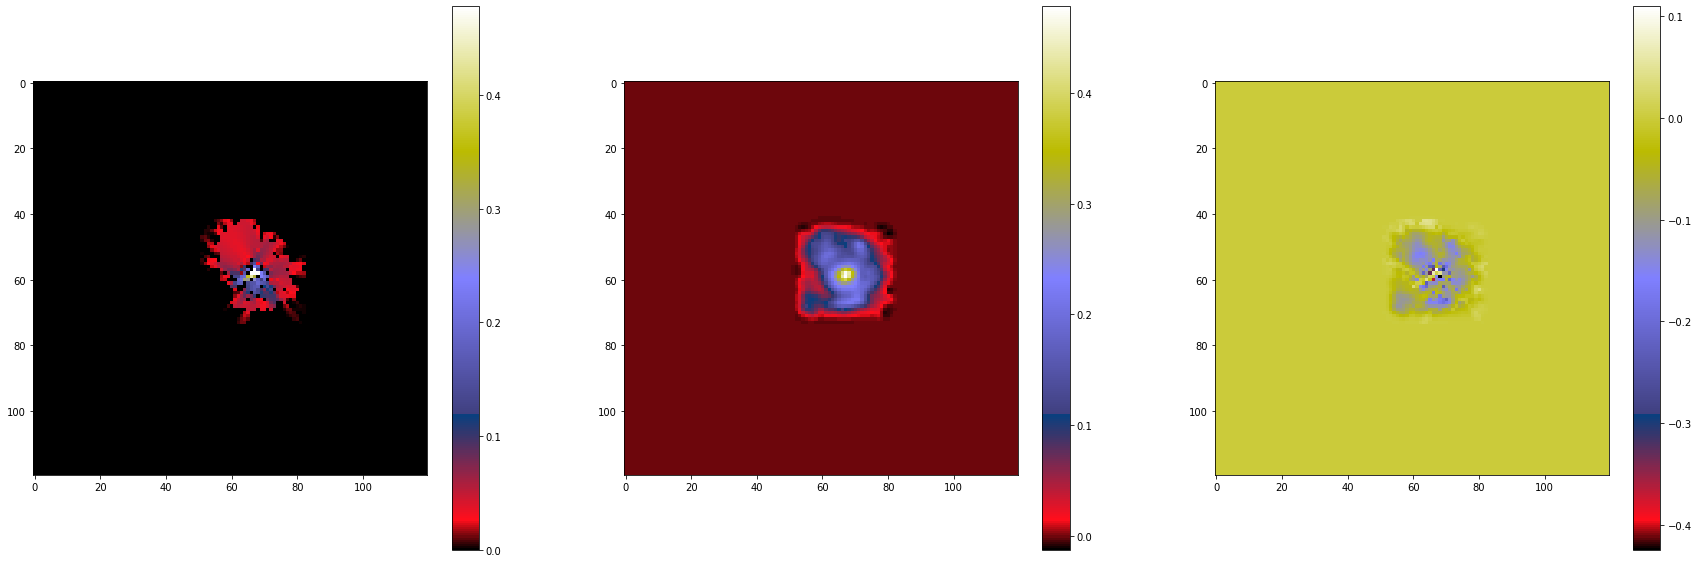

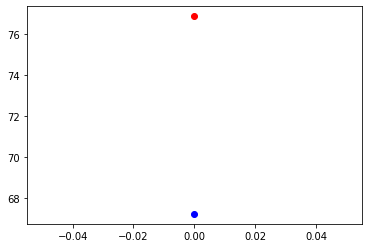

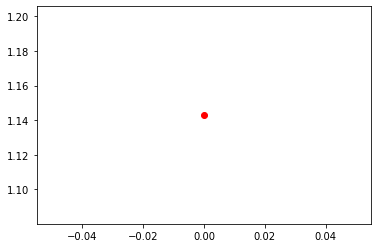

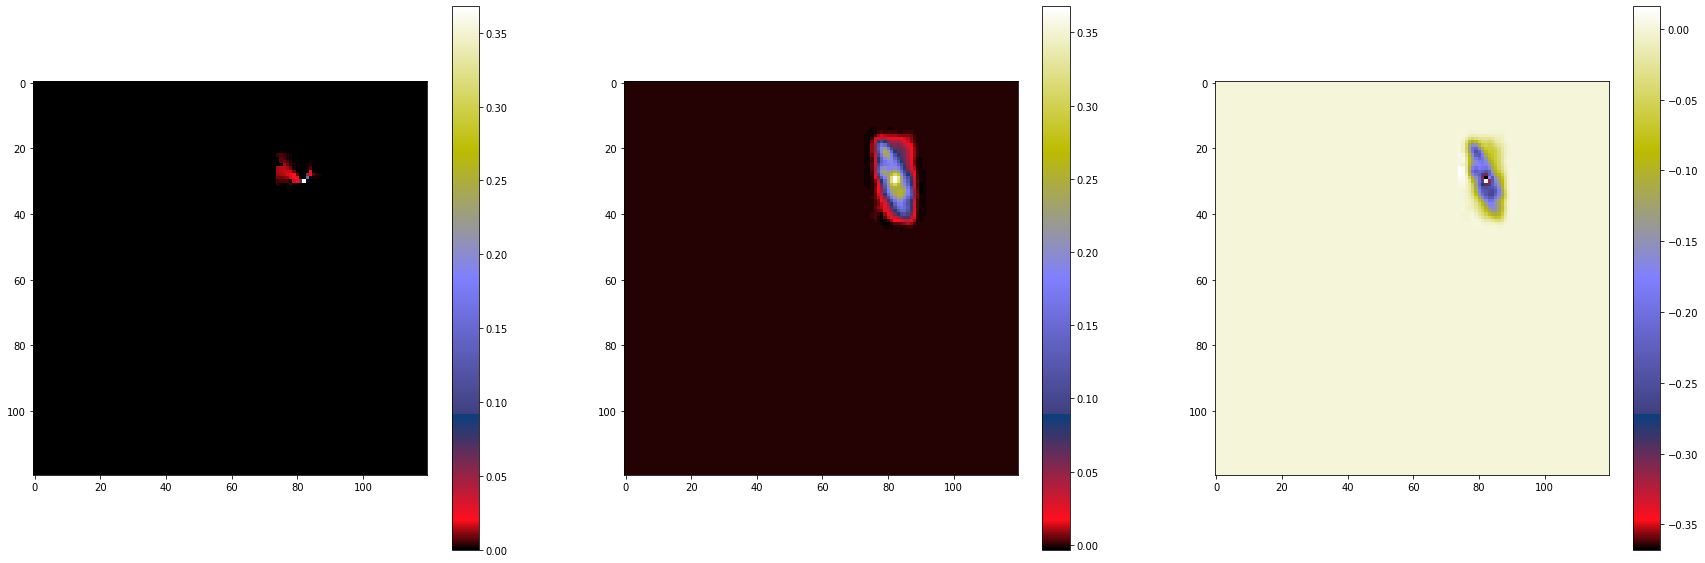

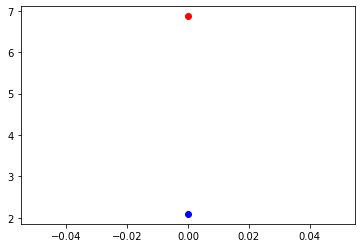

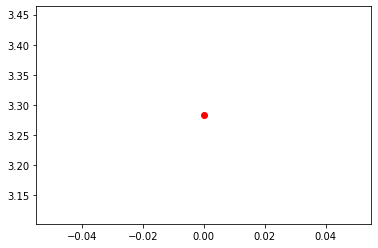

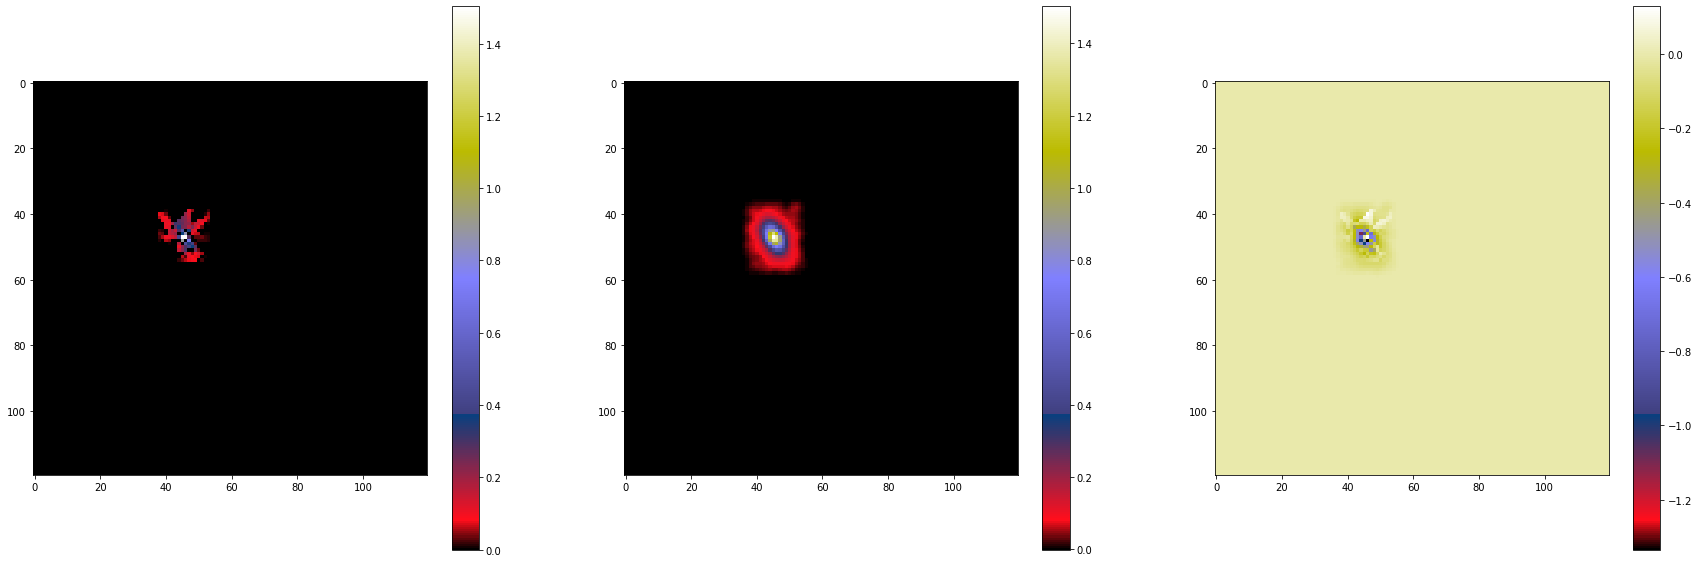

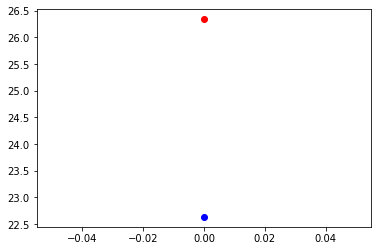

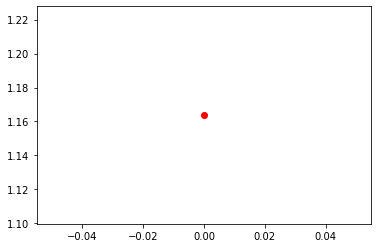

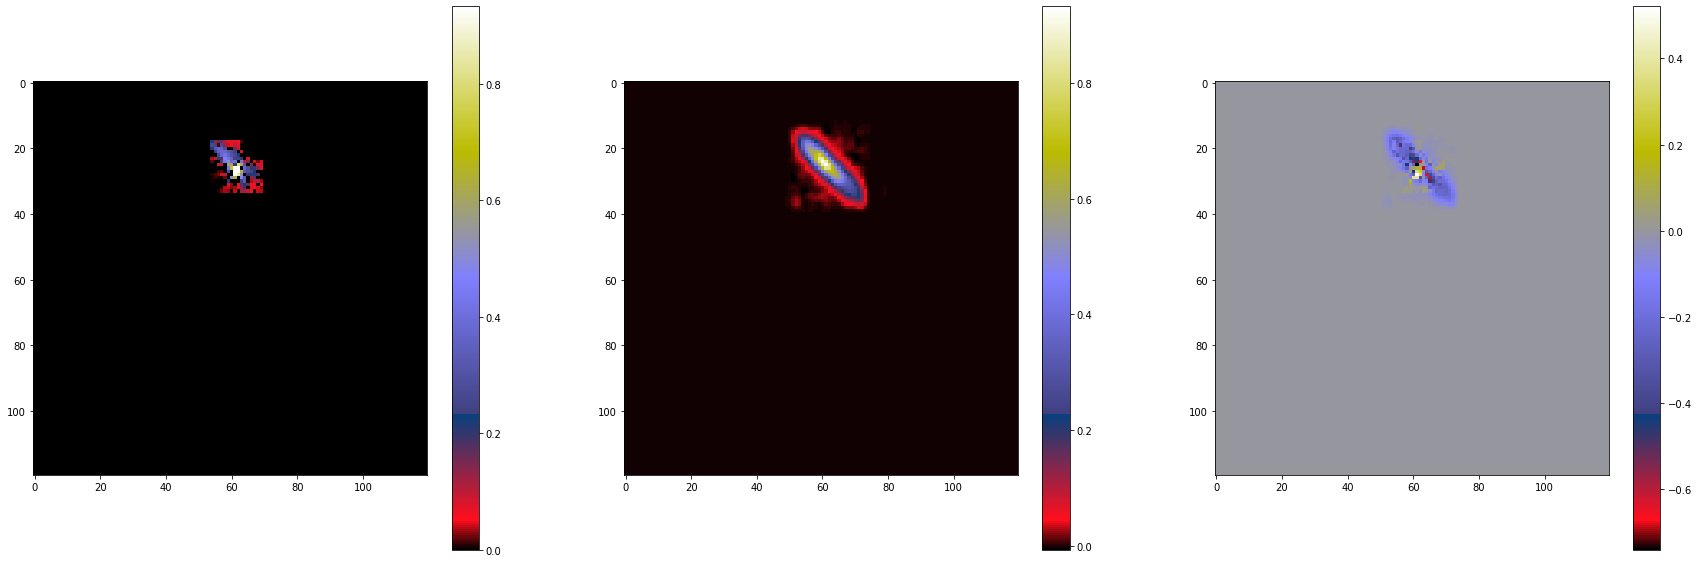

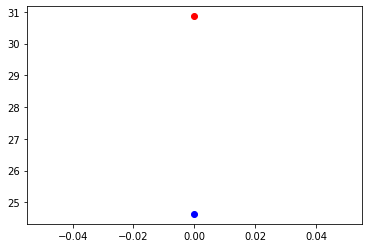

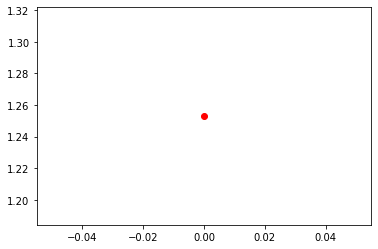

No PSF specified. Possible, but dangerous!
No PSF specified. Possible, but dangerous!
Zero or negative SED [-0.04862435] at y=0.33692824099957236, x=-0.5783032402369946


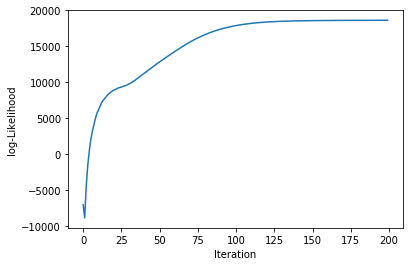

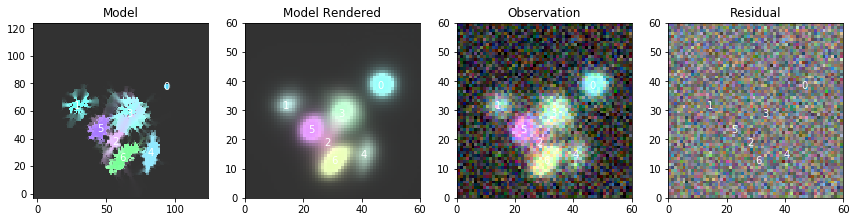

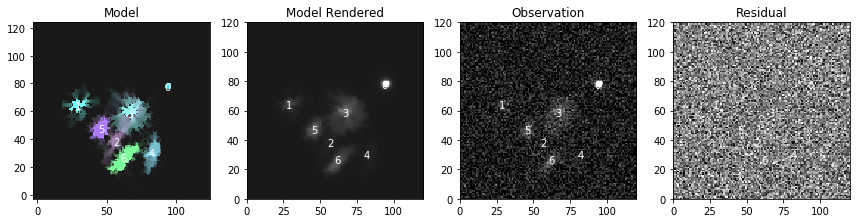

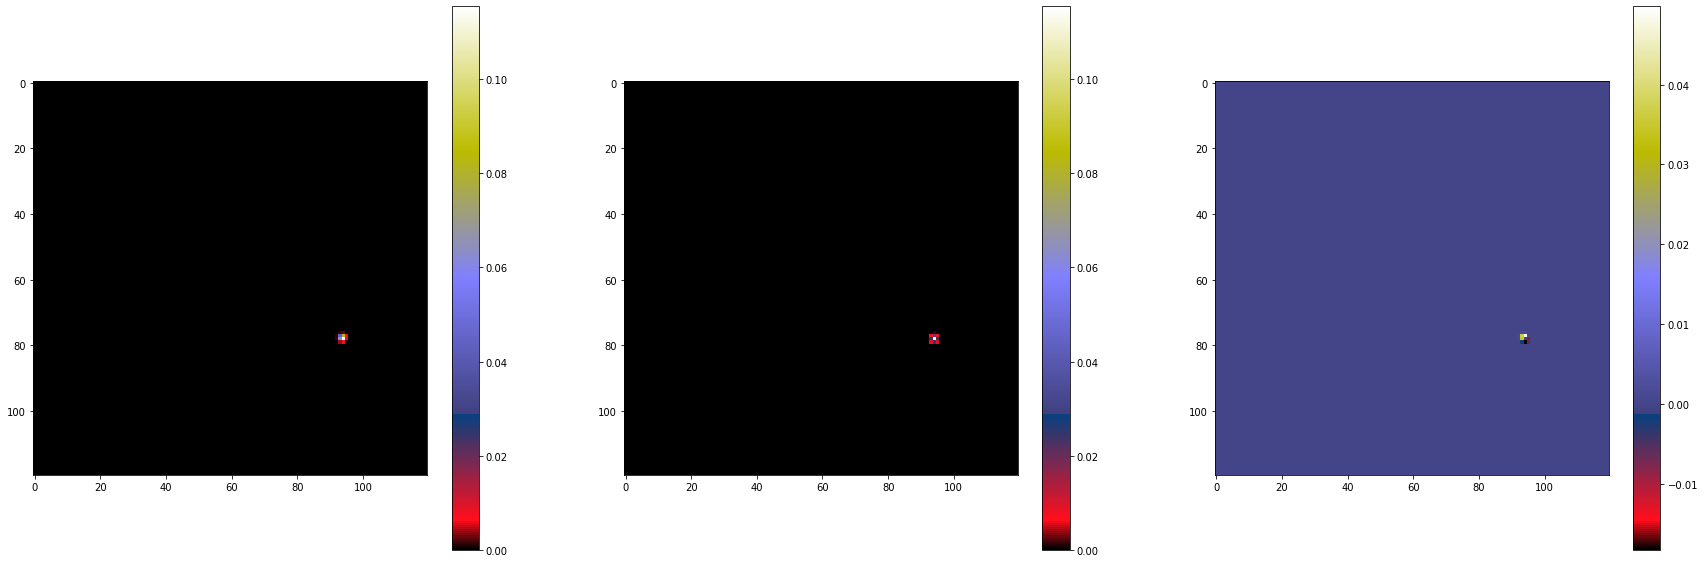

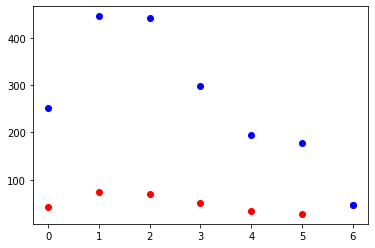

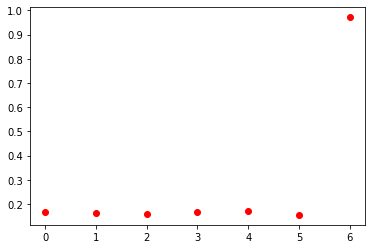

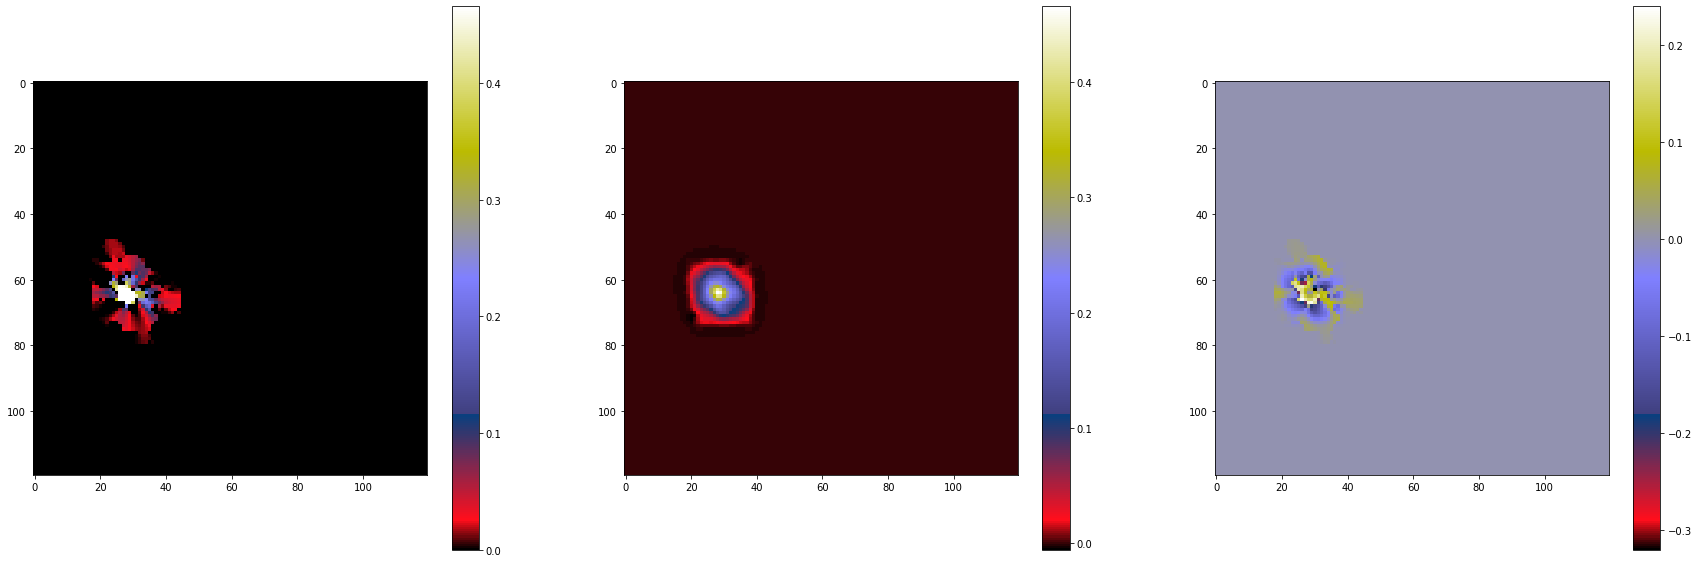

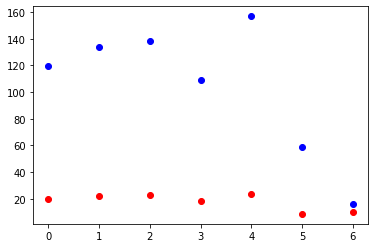

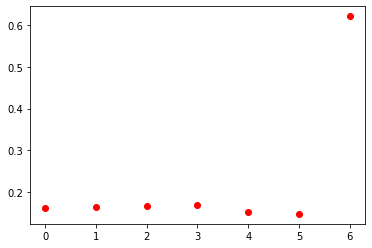

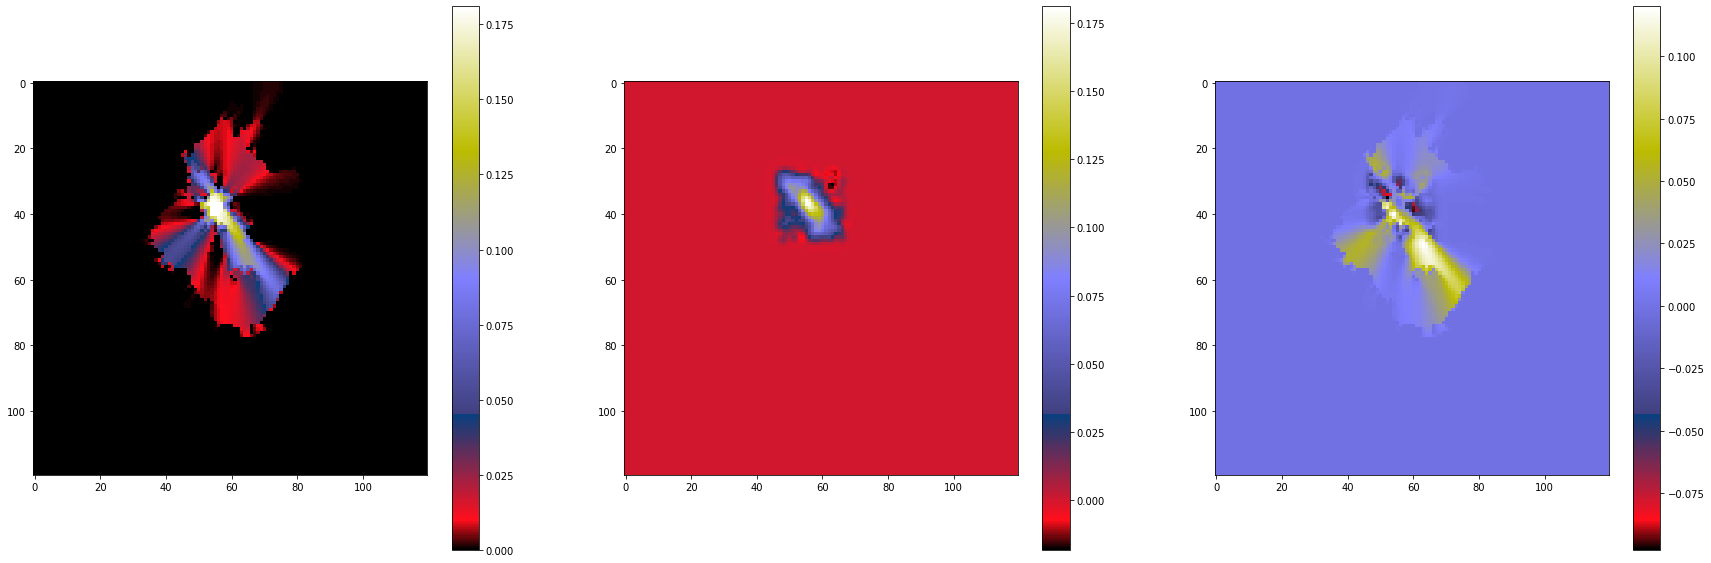

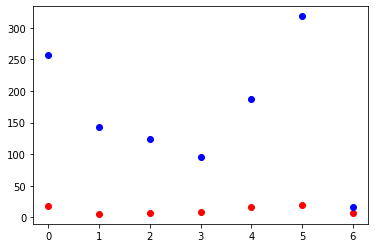

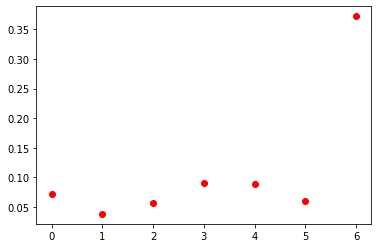

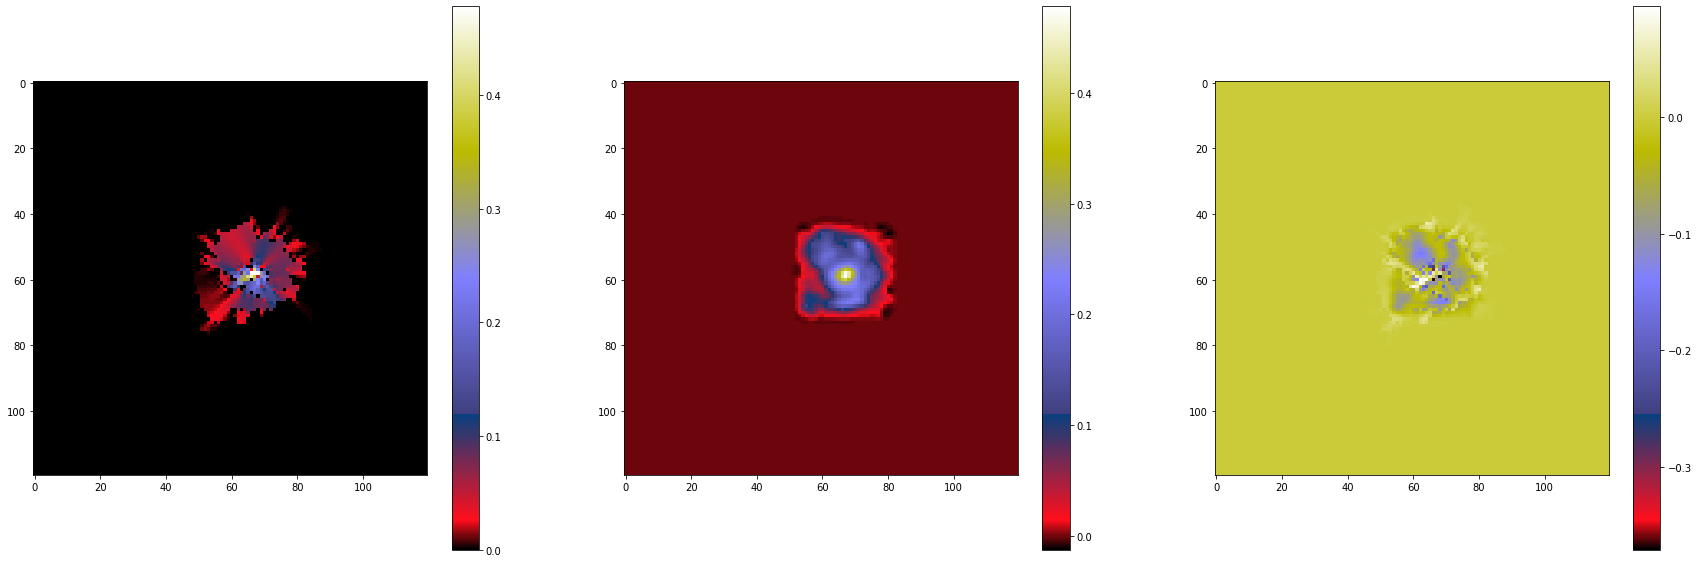

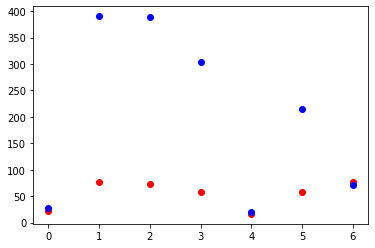

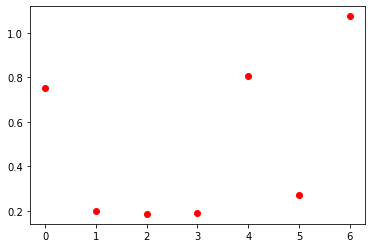

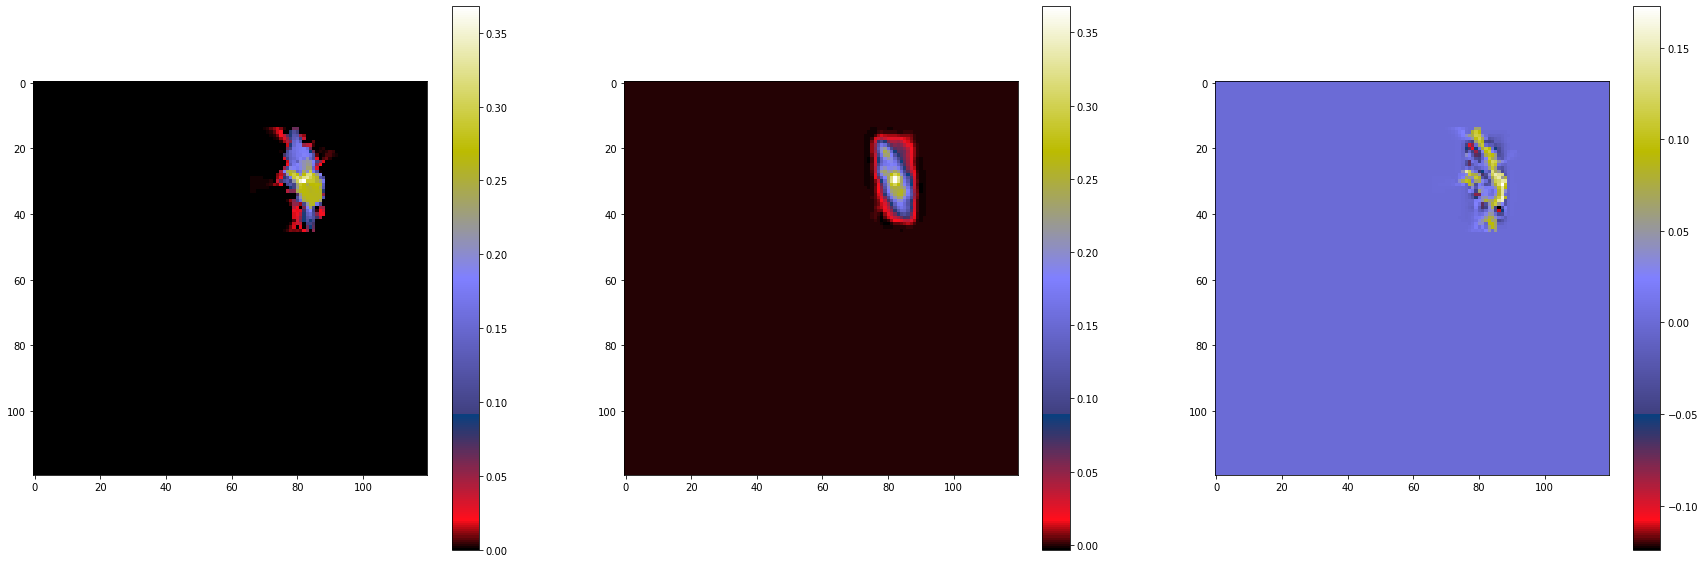

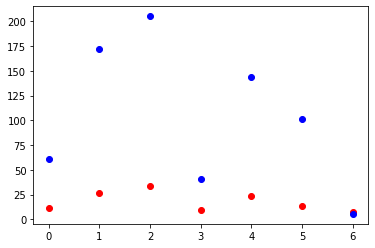

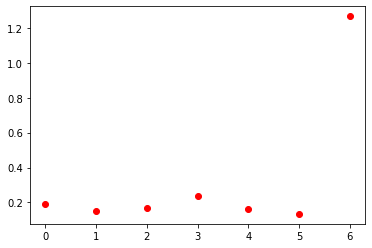

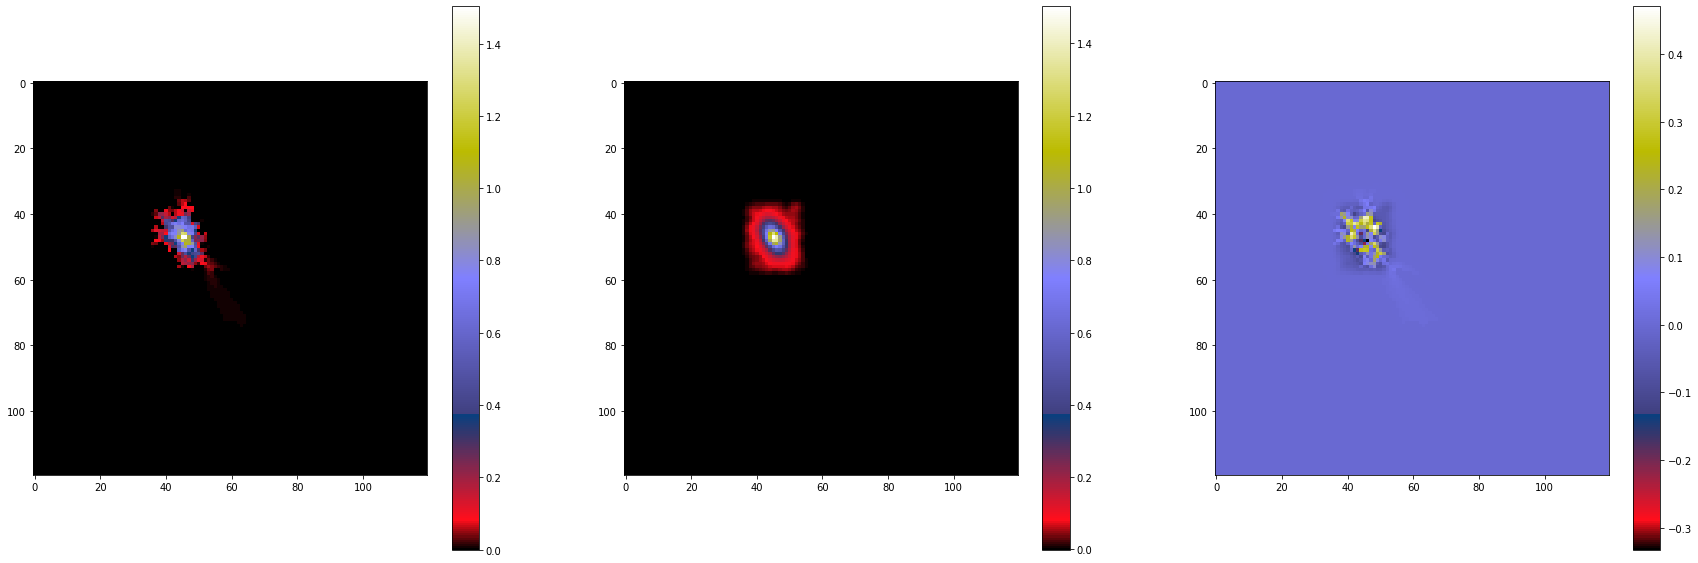

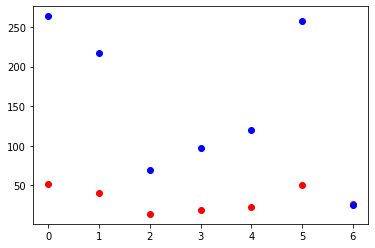

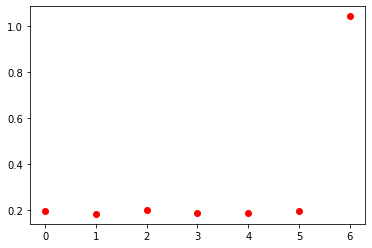

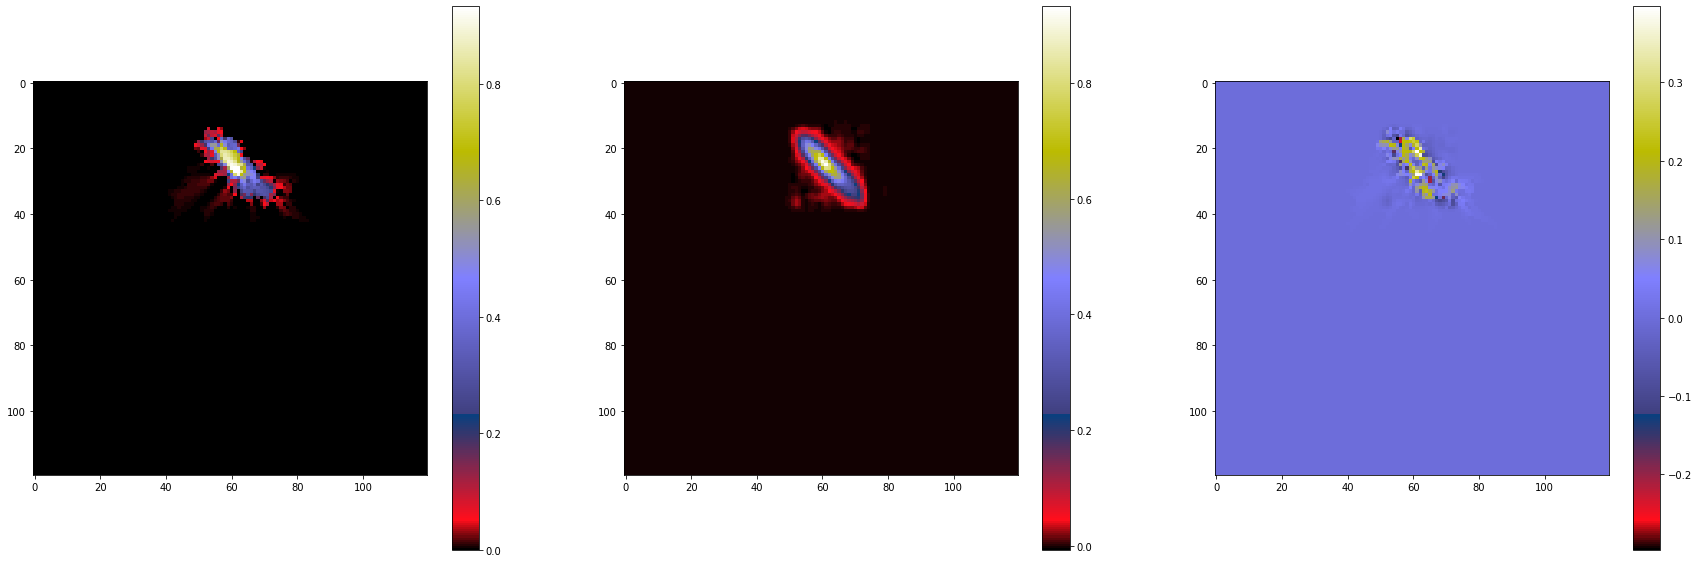

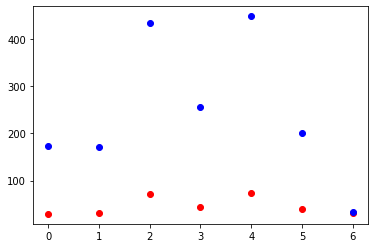

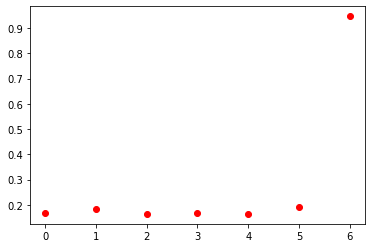

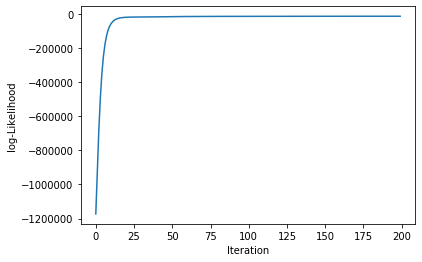

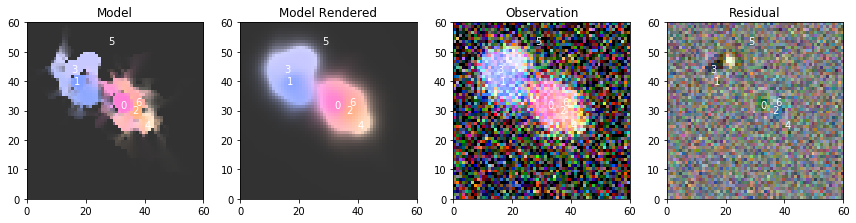

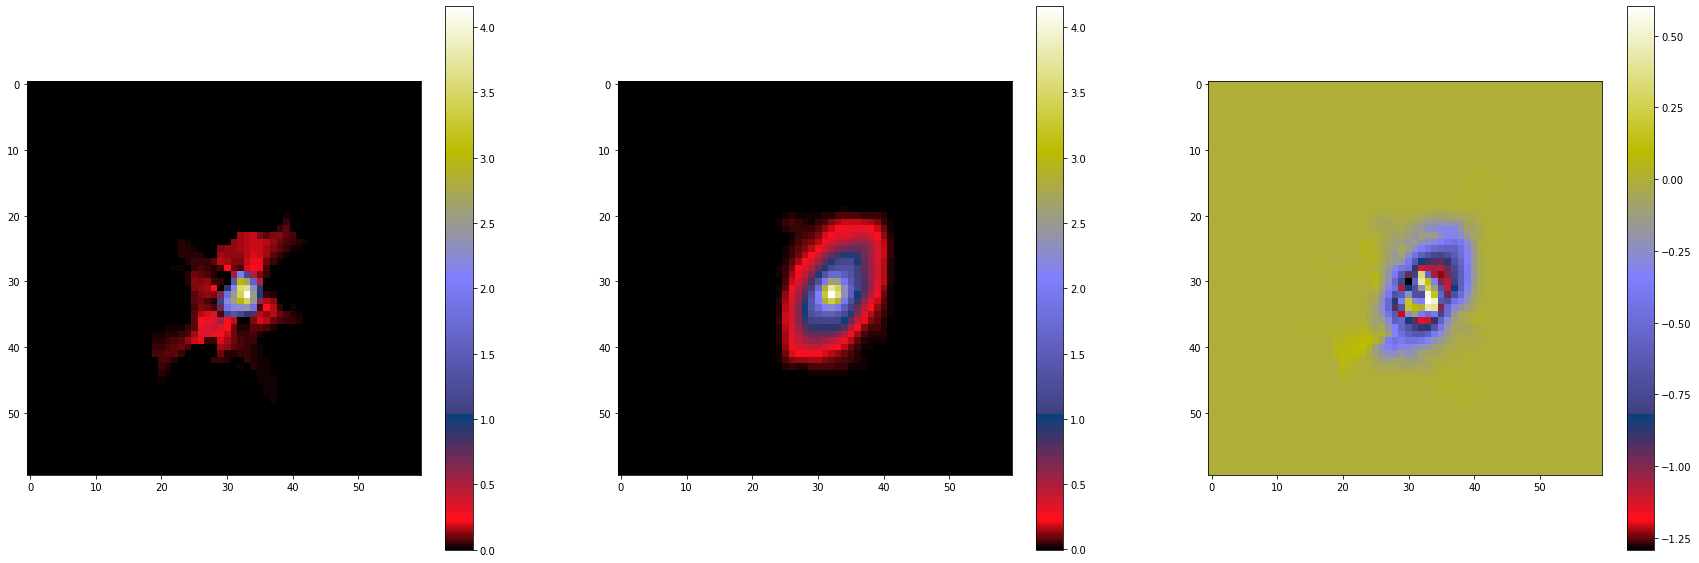

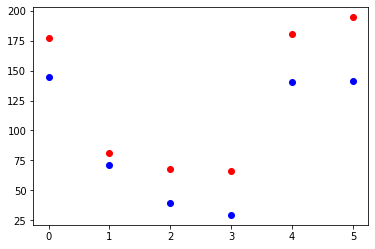

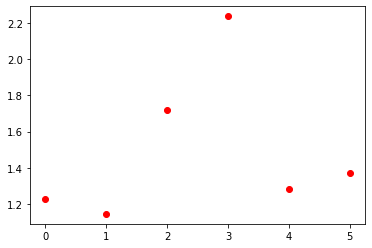

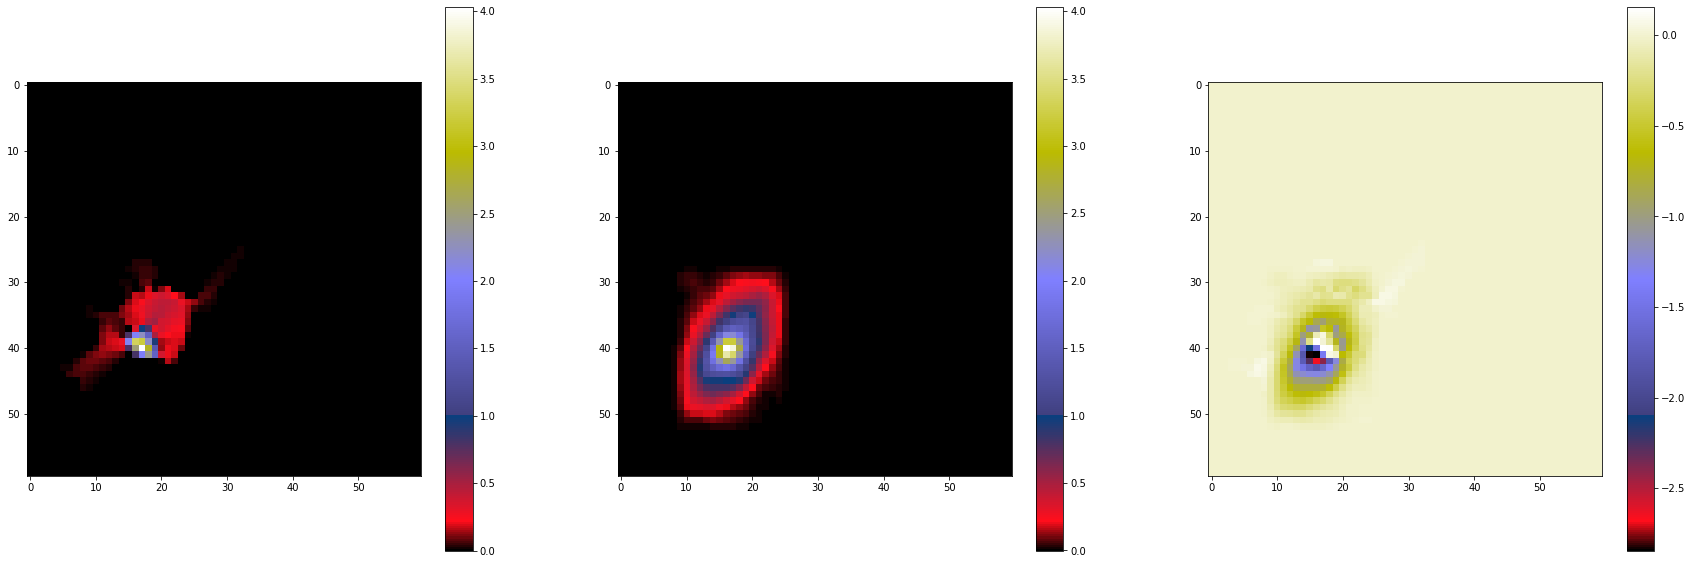

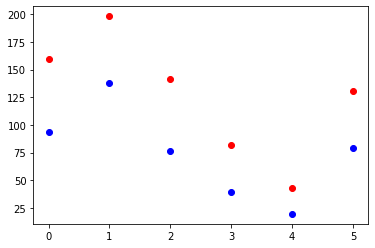

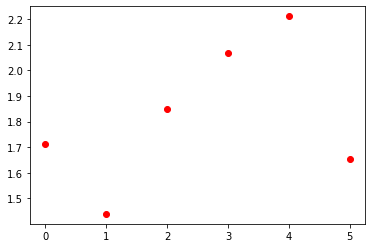

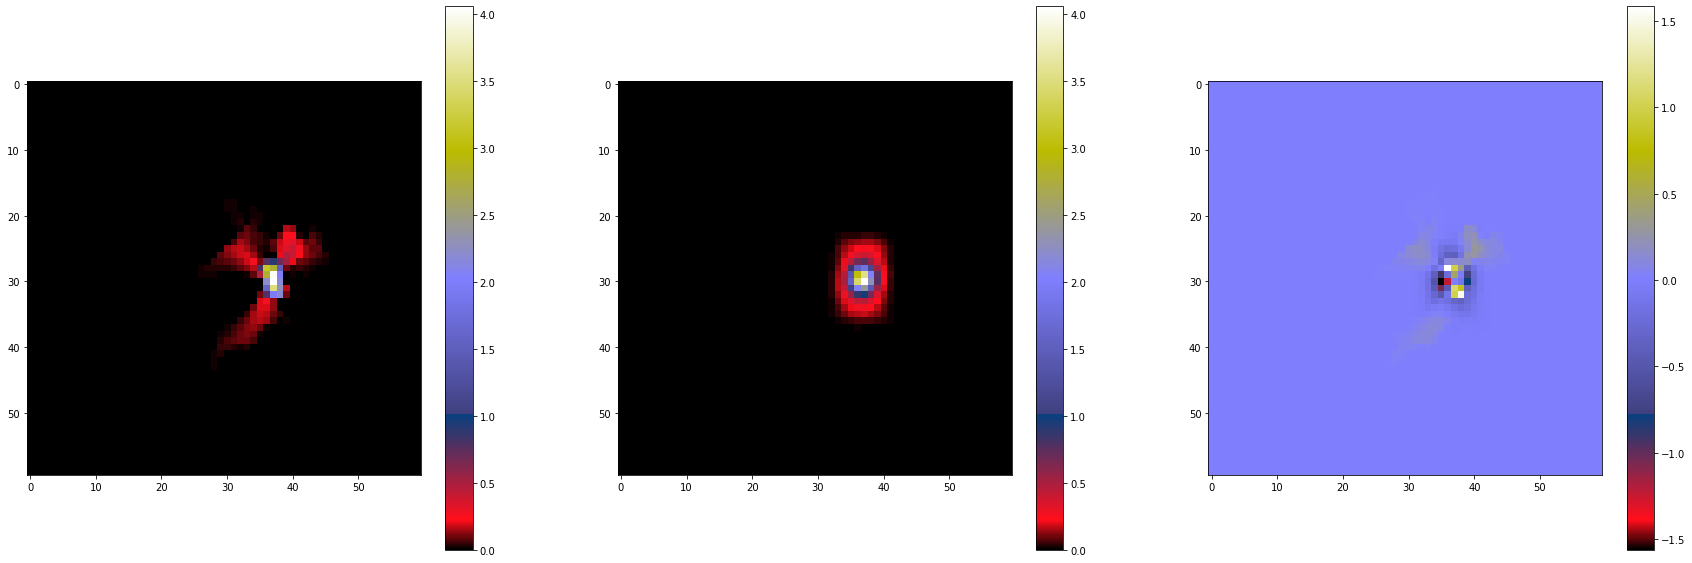

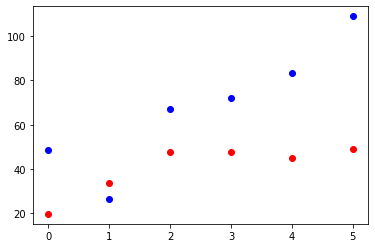

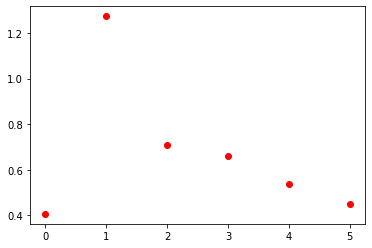

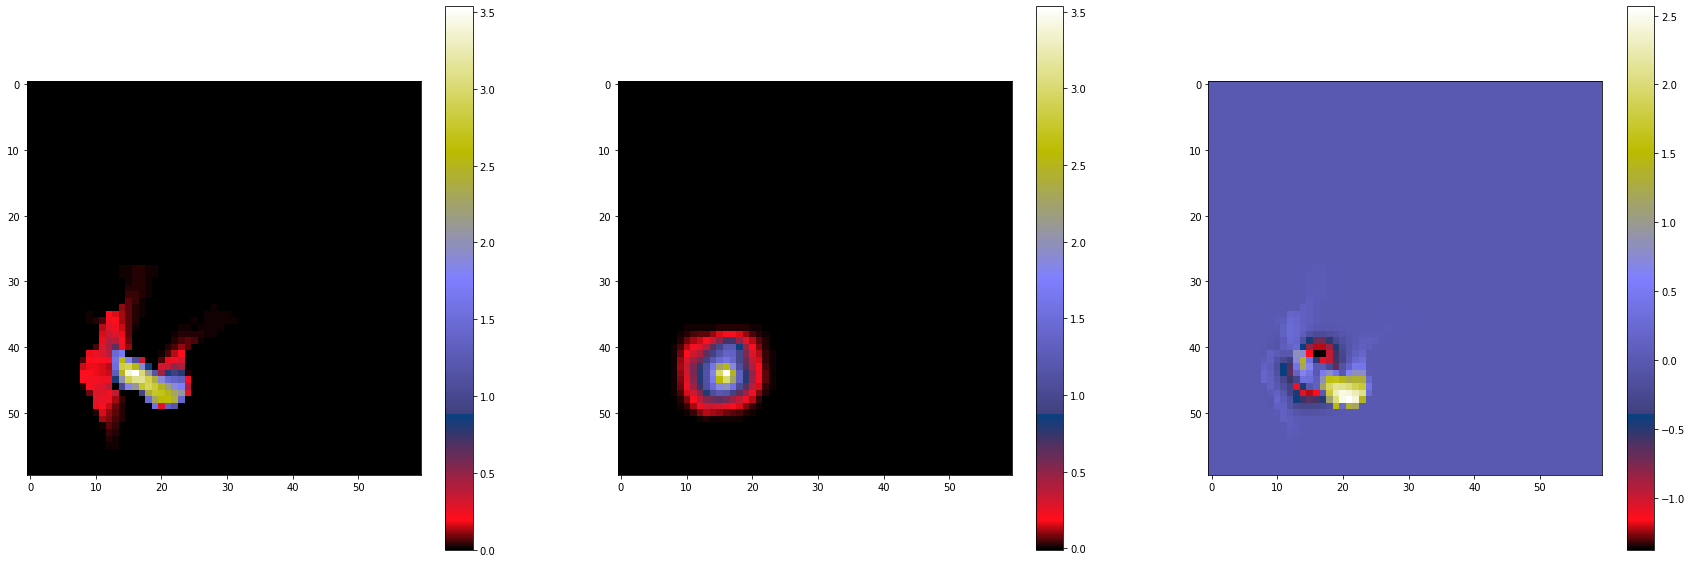

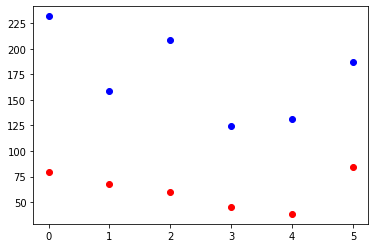

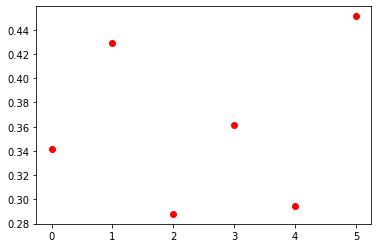

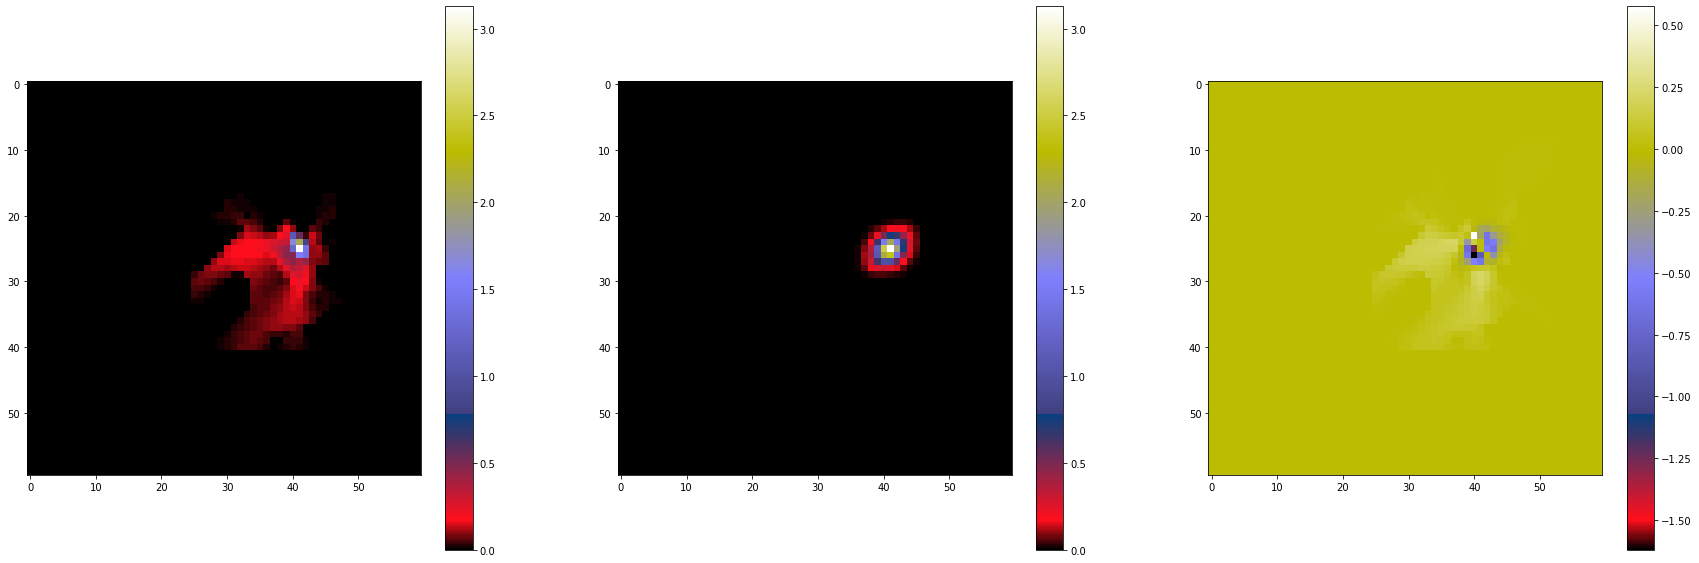

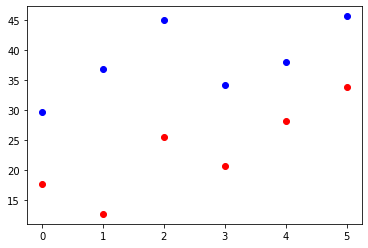

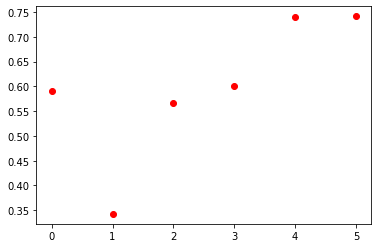

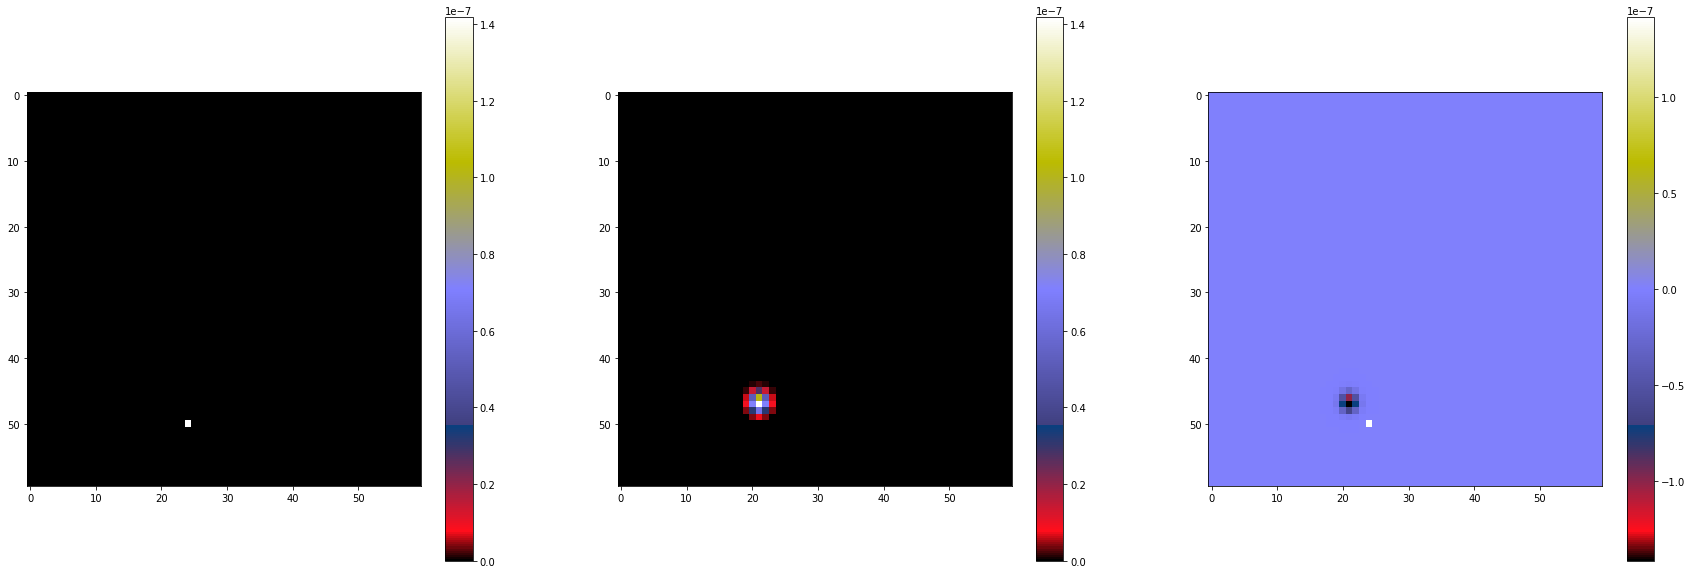

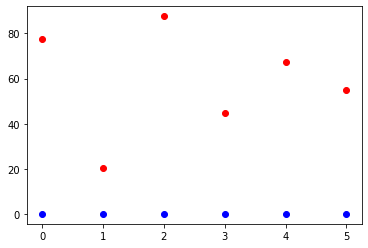

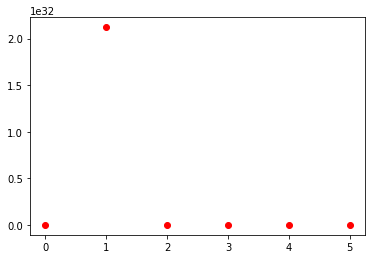

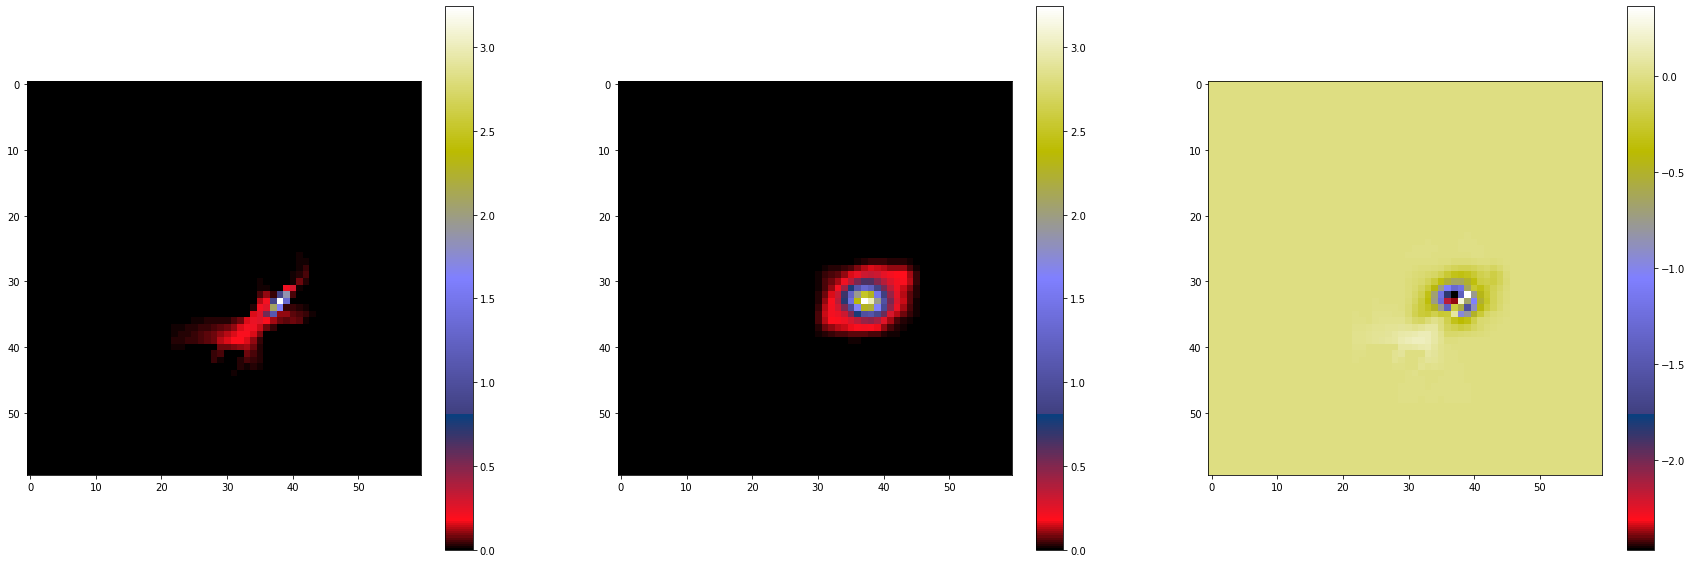

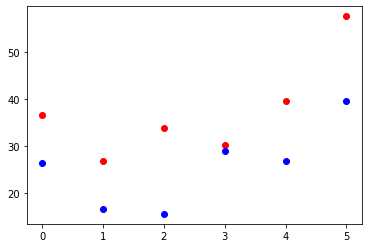

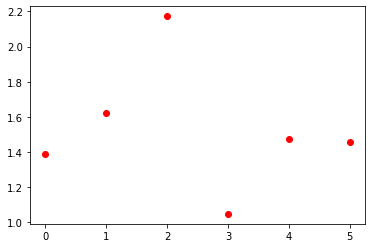

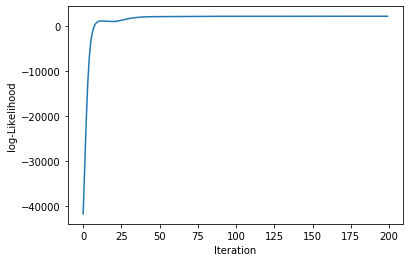

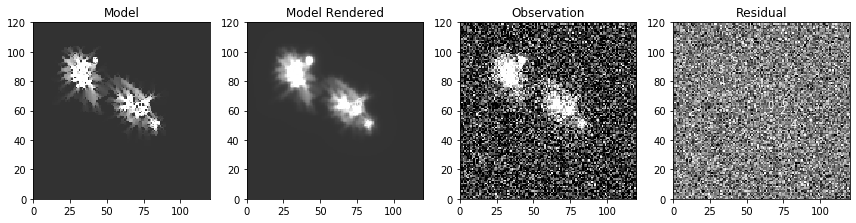

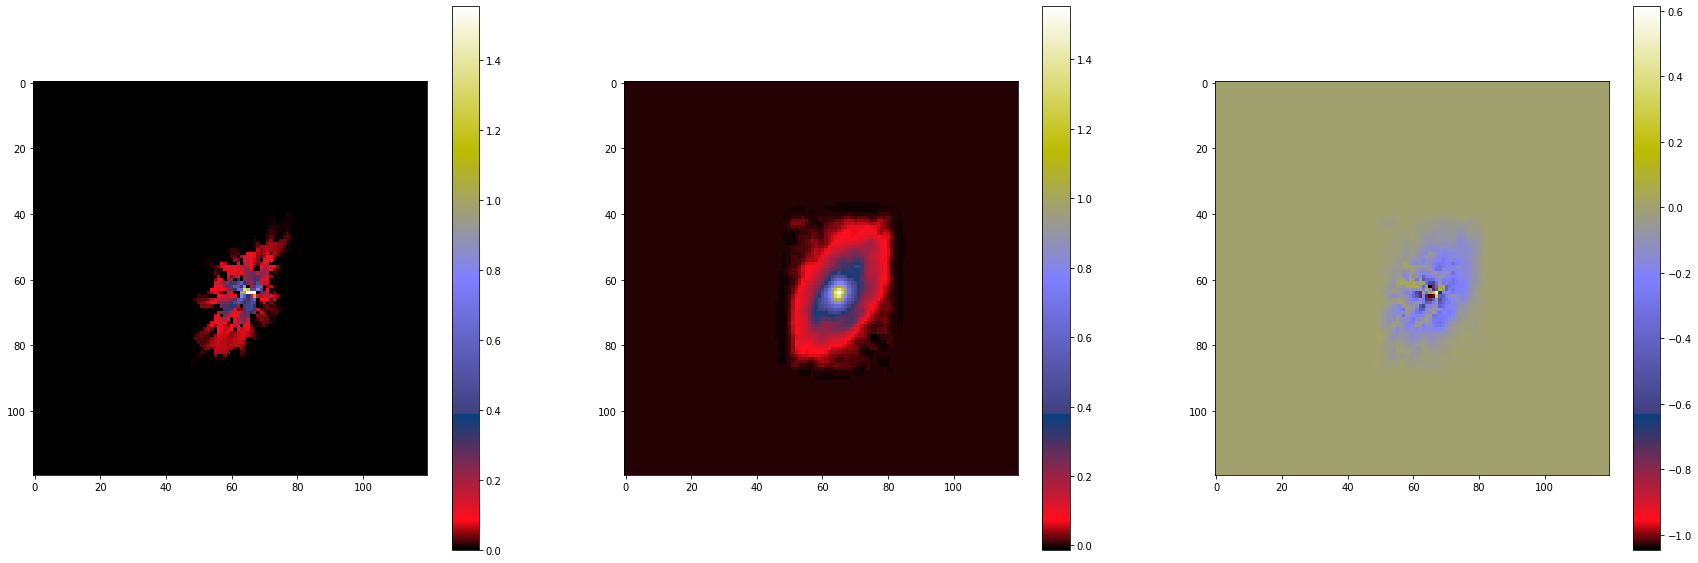

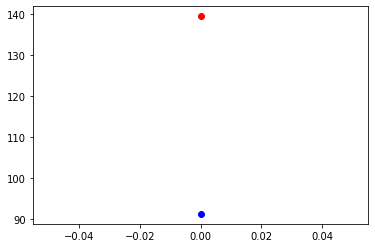

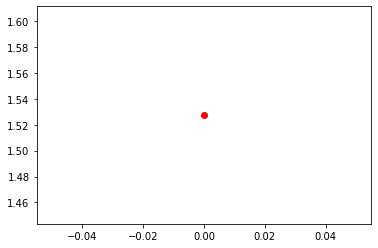

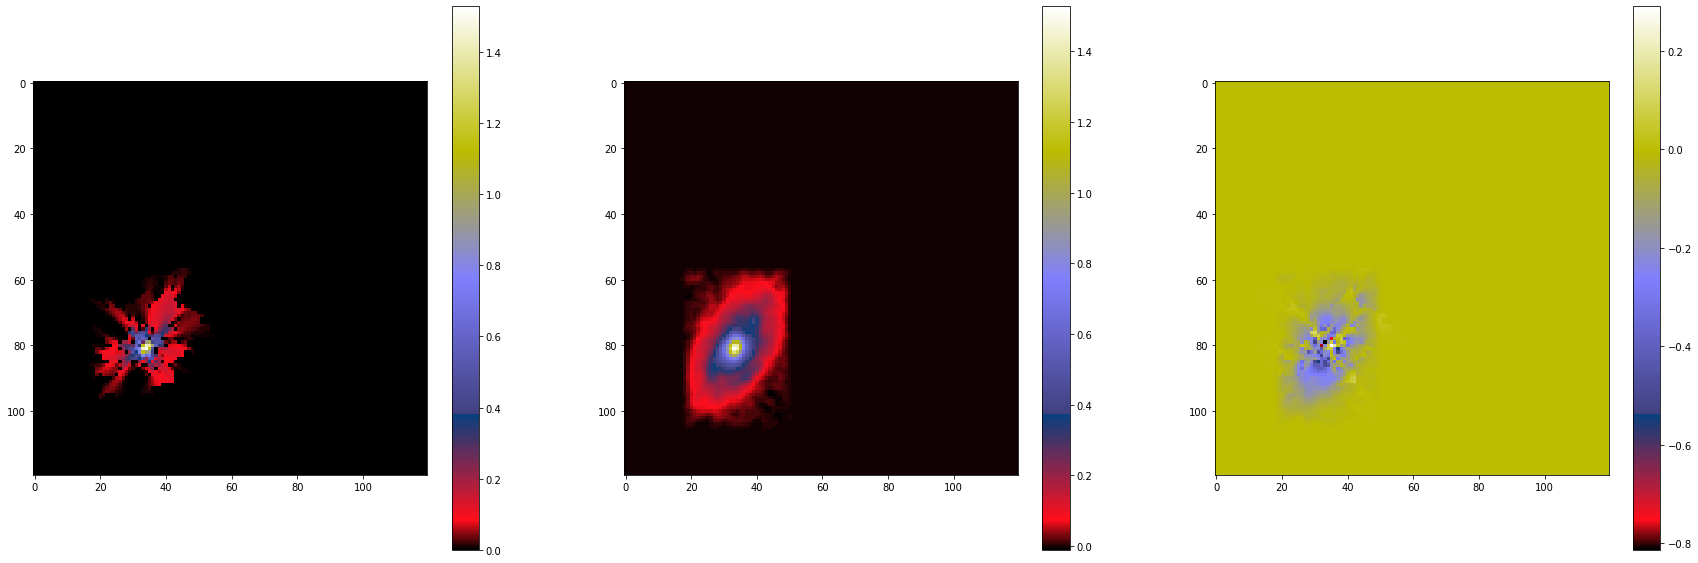

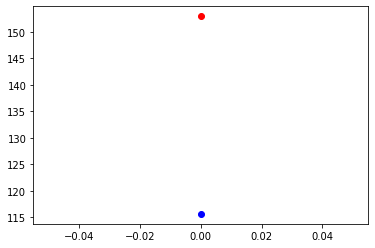

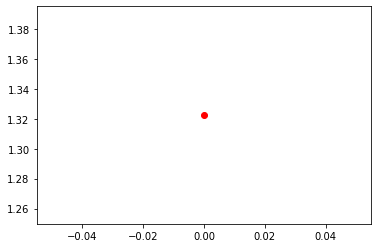

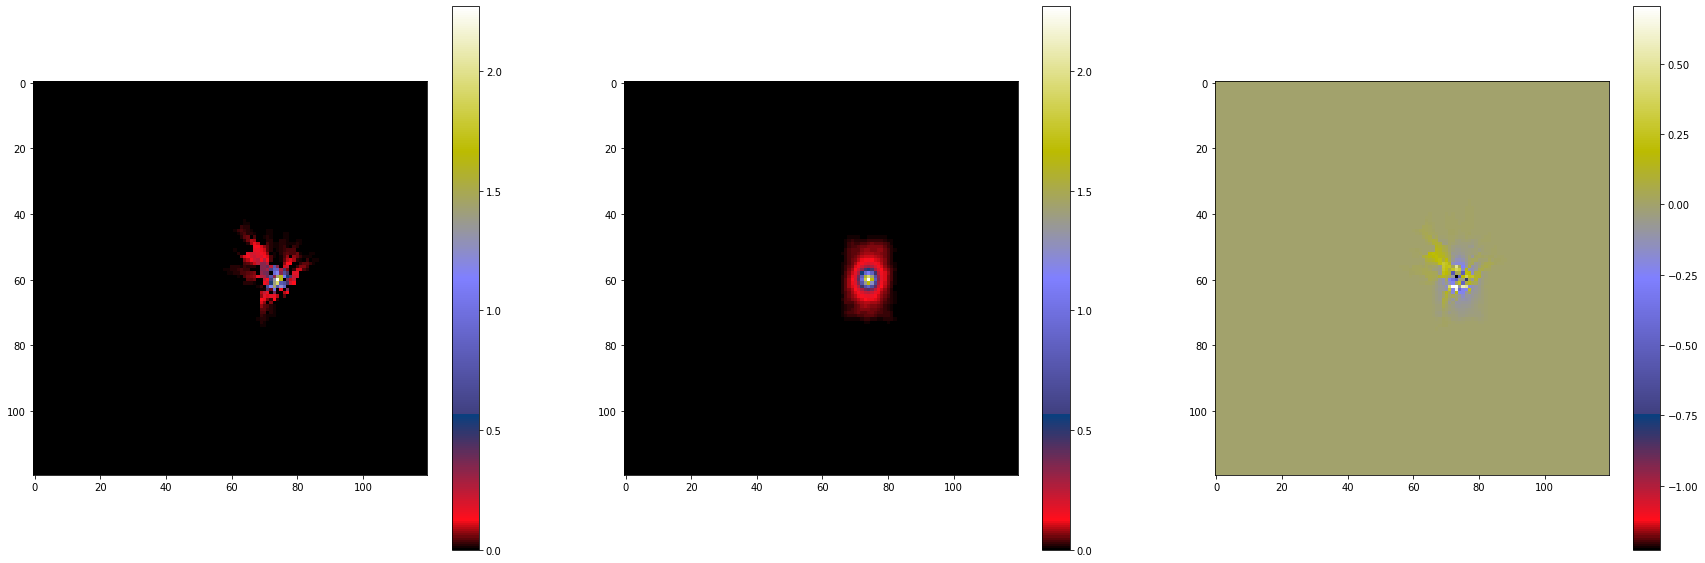

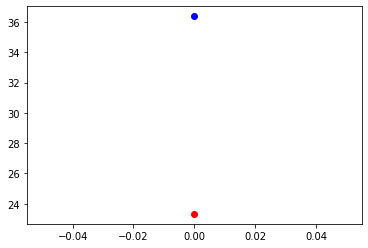

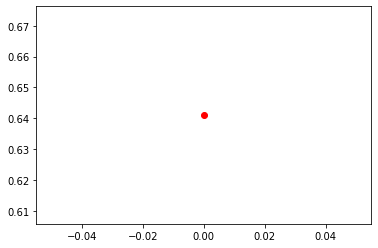

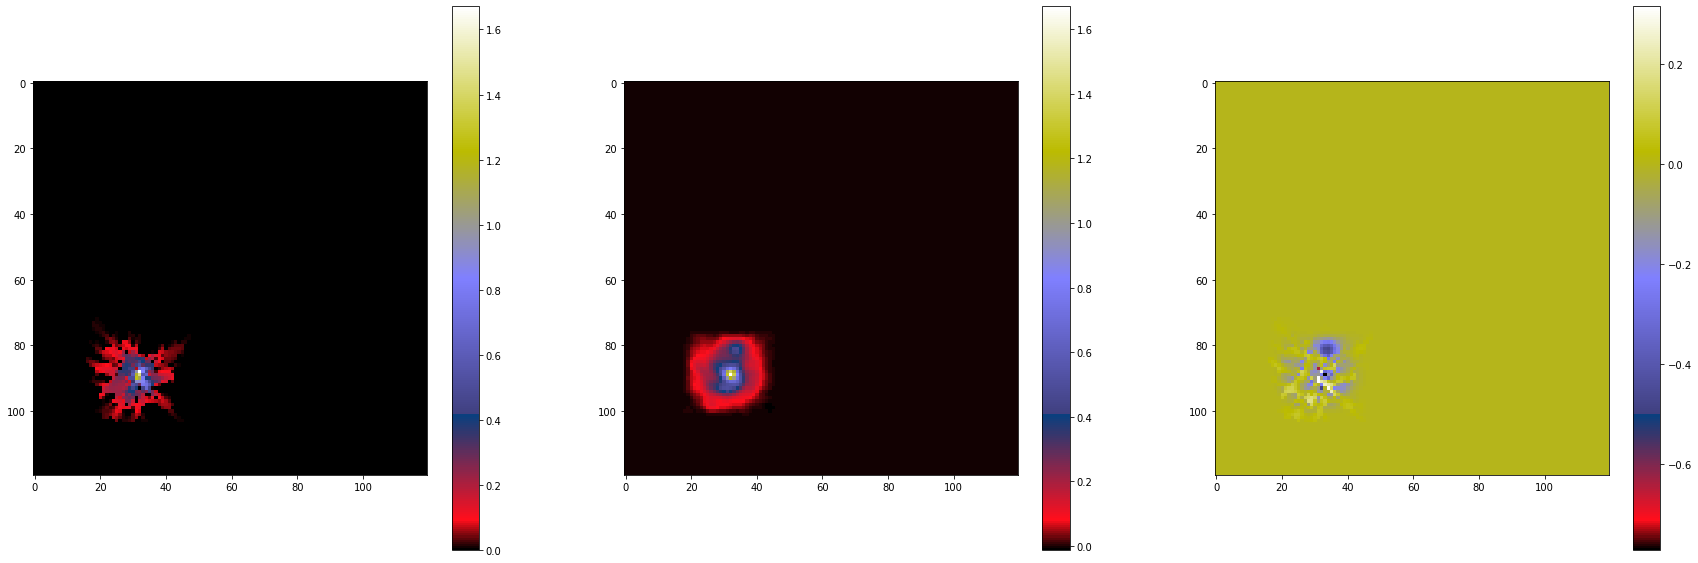

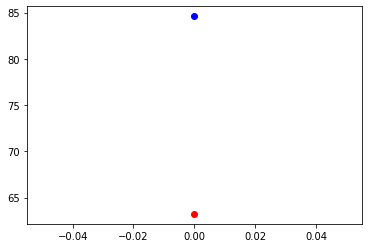

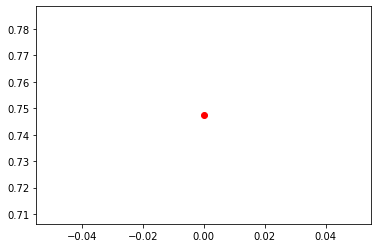

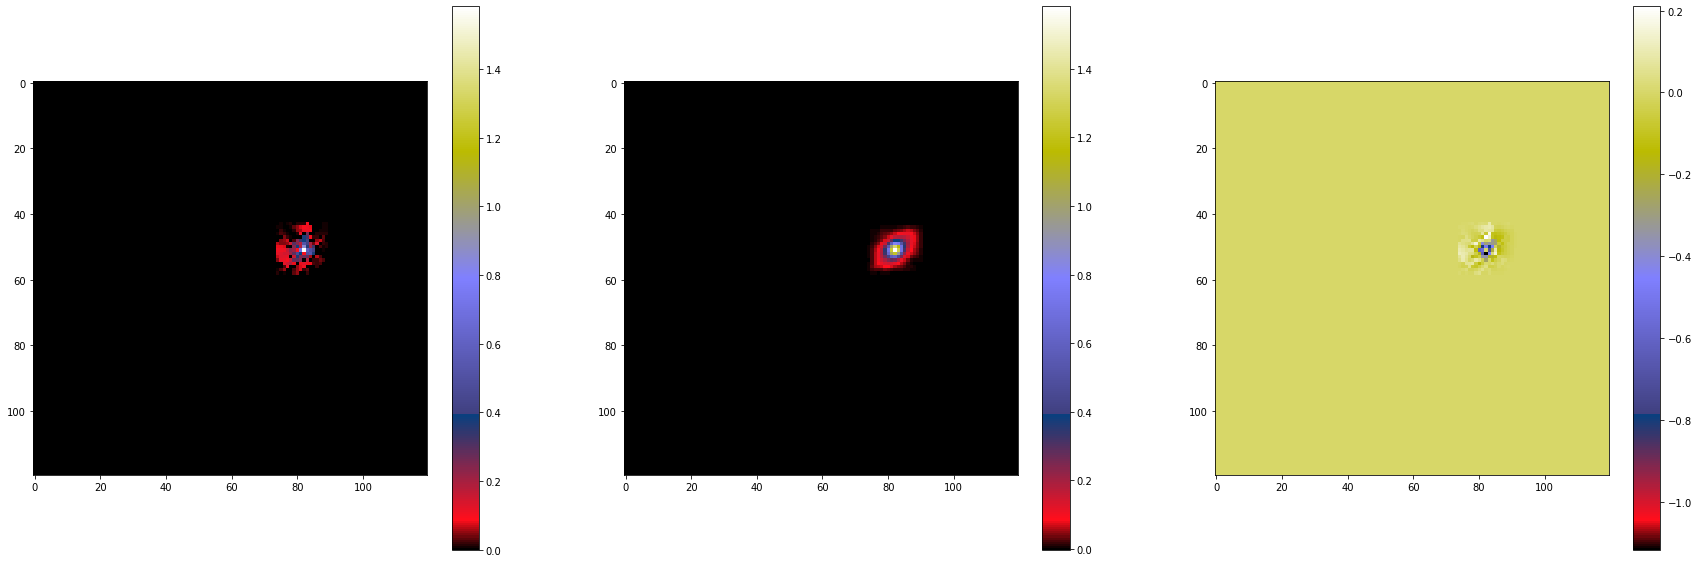

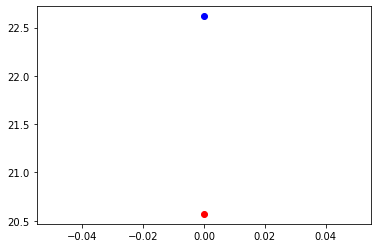

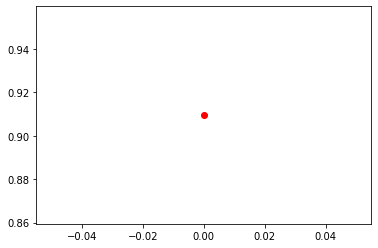

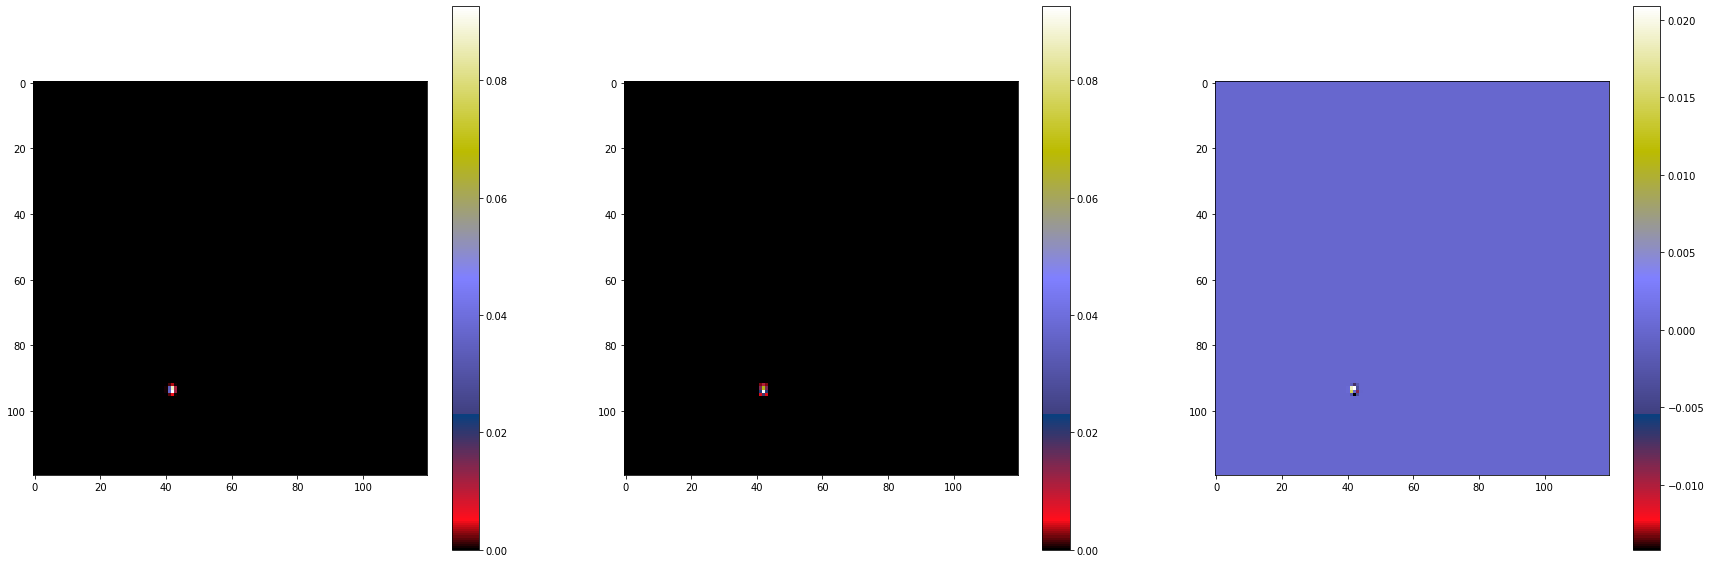

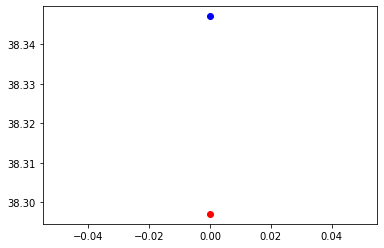

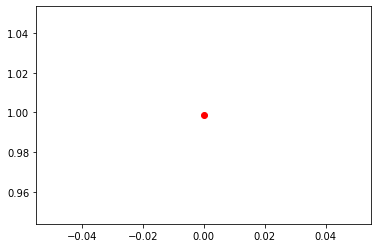

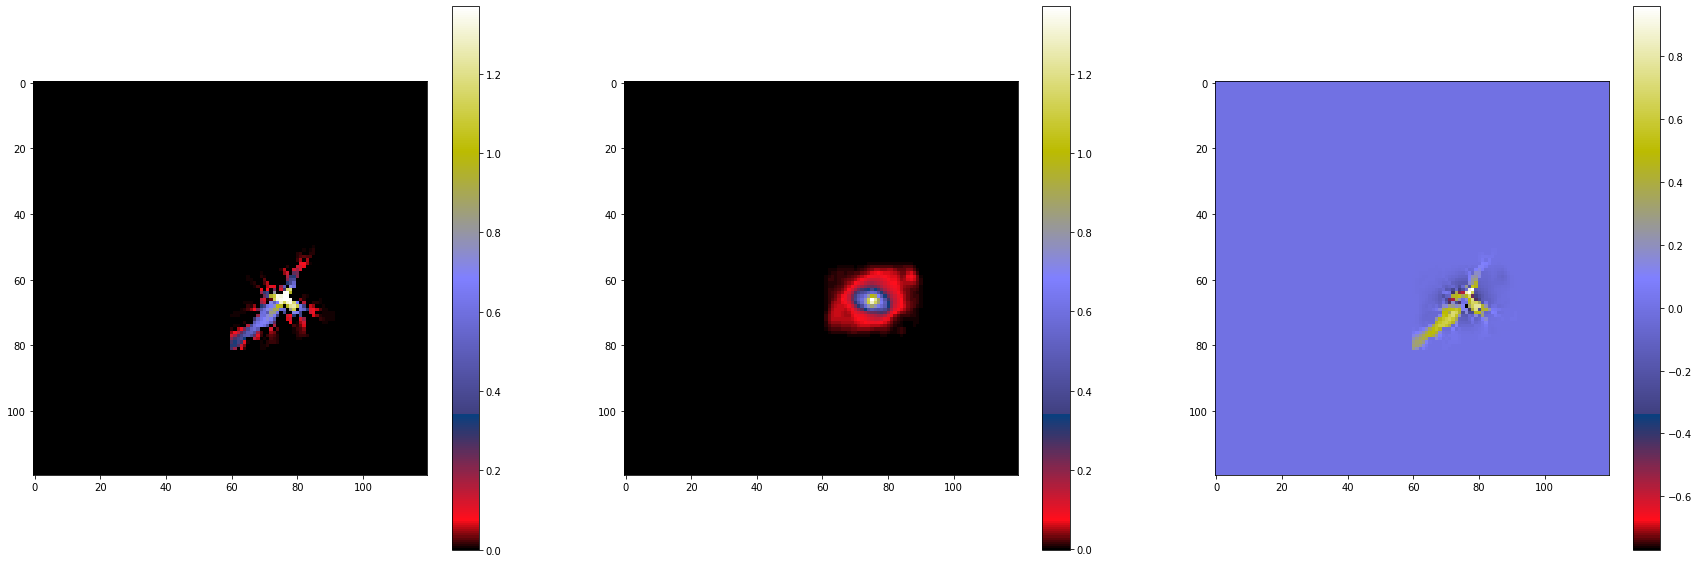

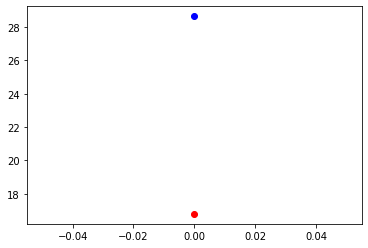

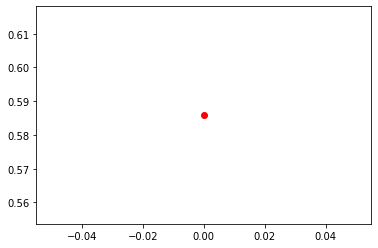

No PSF specified. Possible, but dangerous!
No PSF specified. Possible, but dangerous!


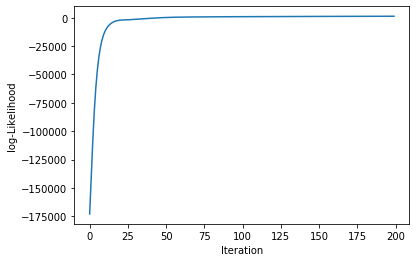

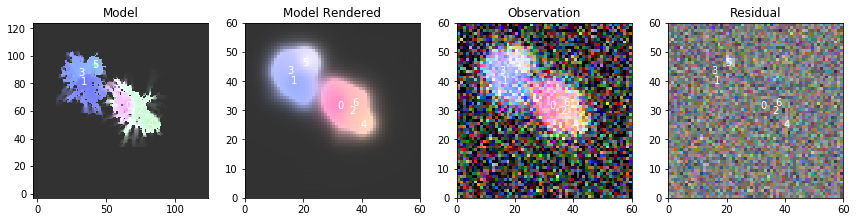

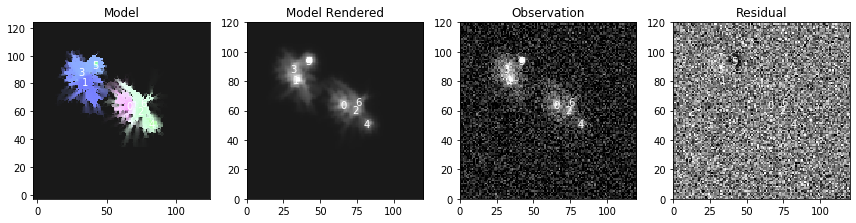

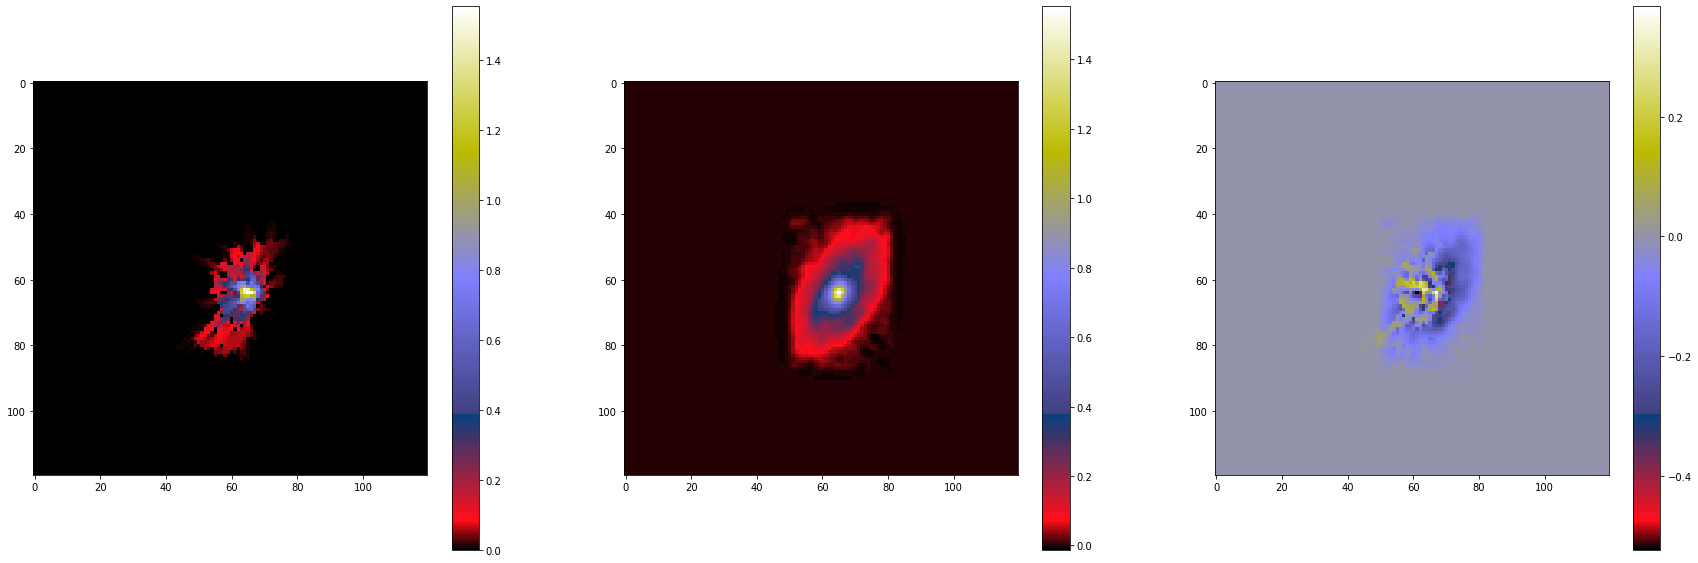

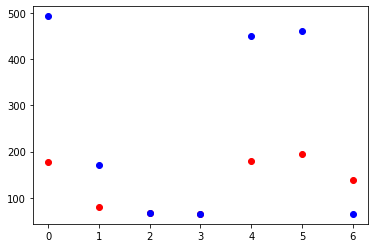

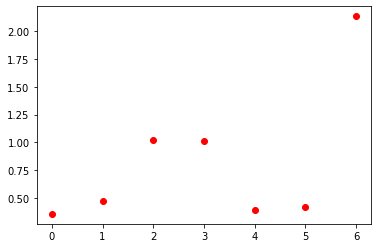

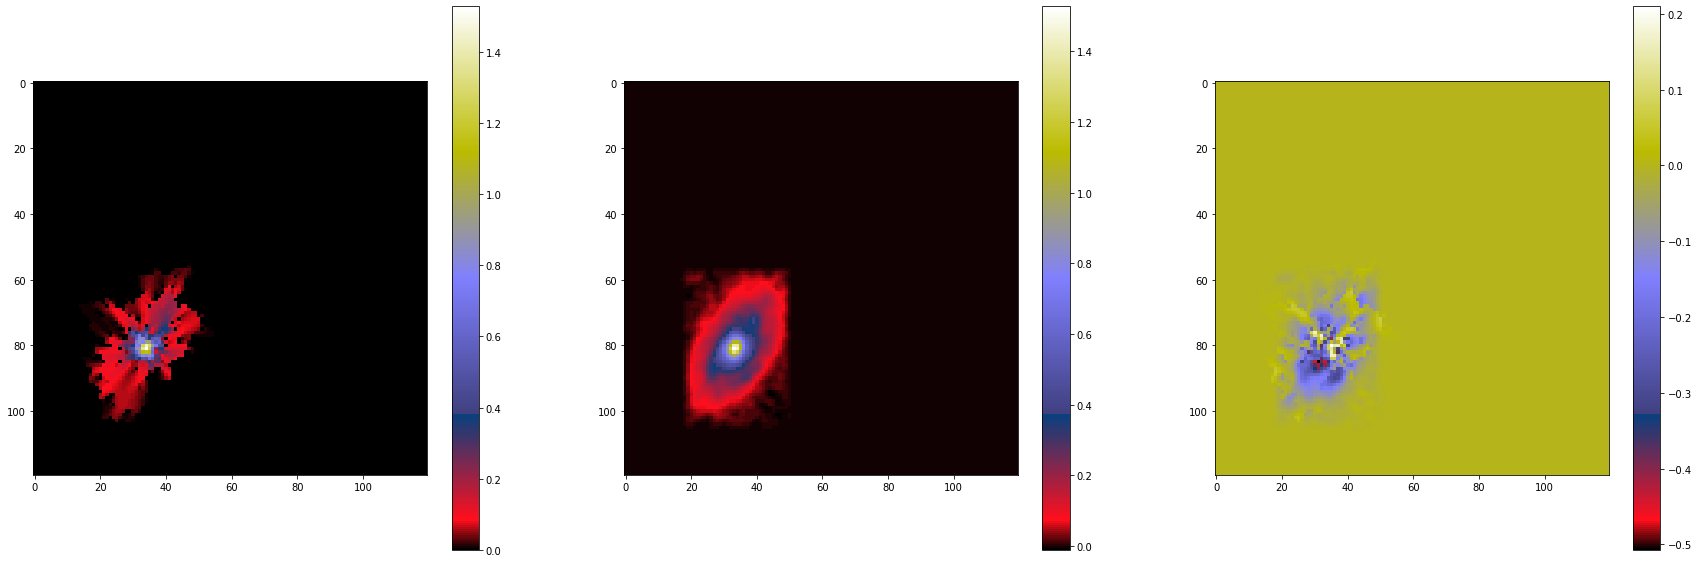

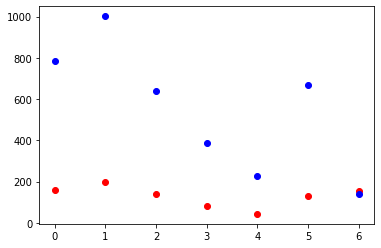

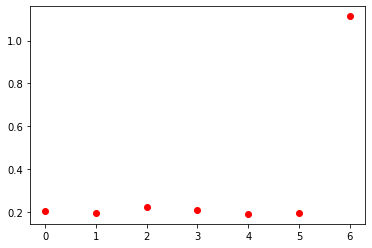

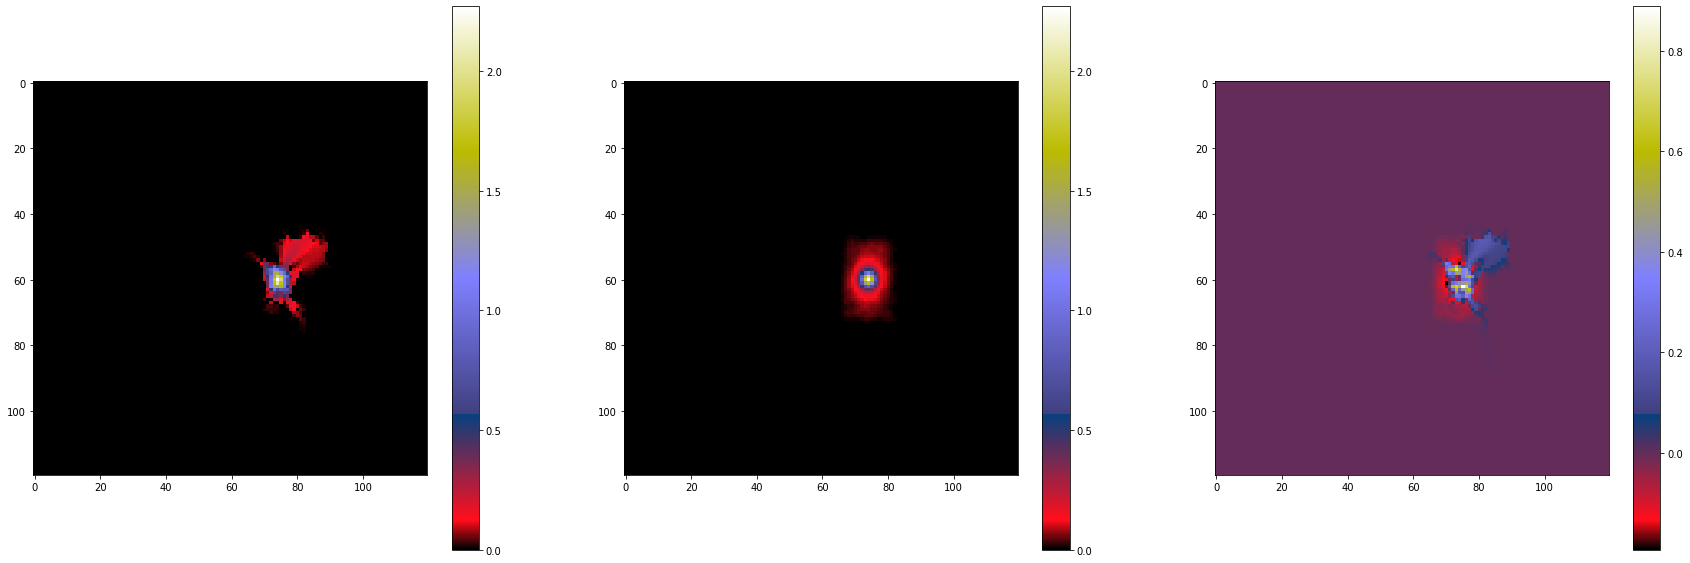

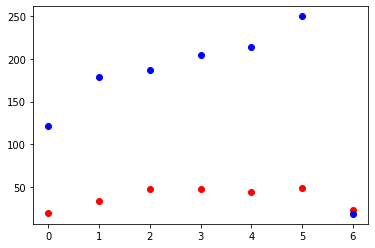

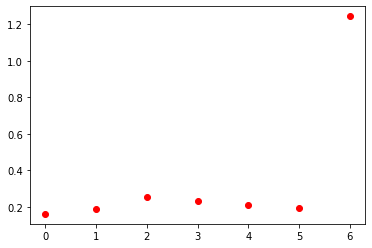

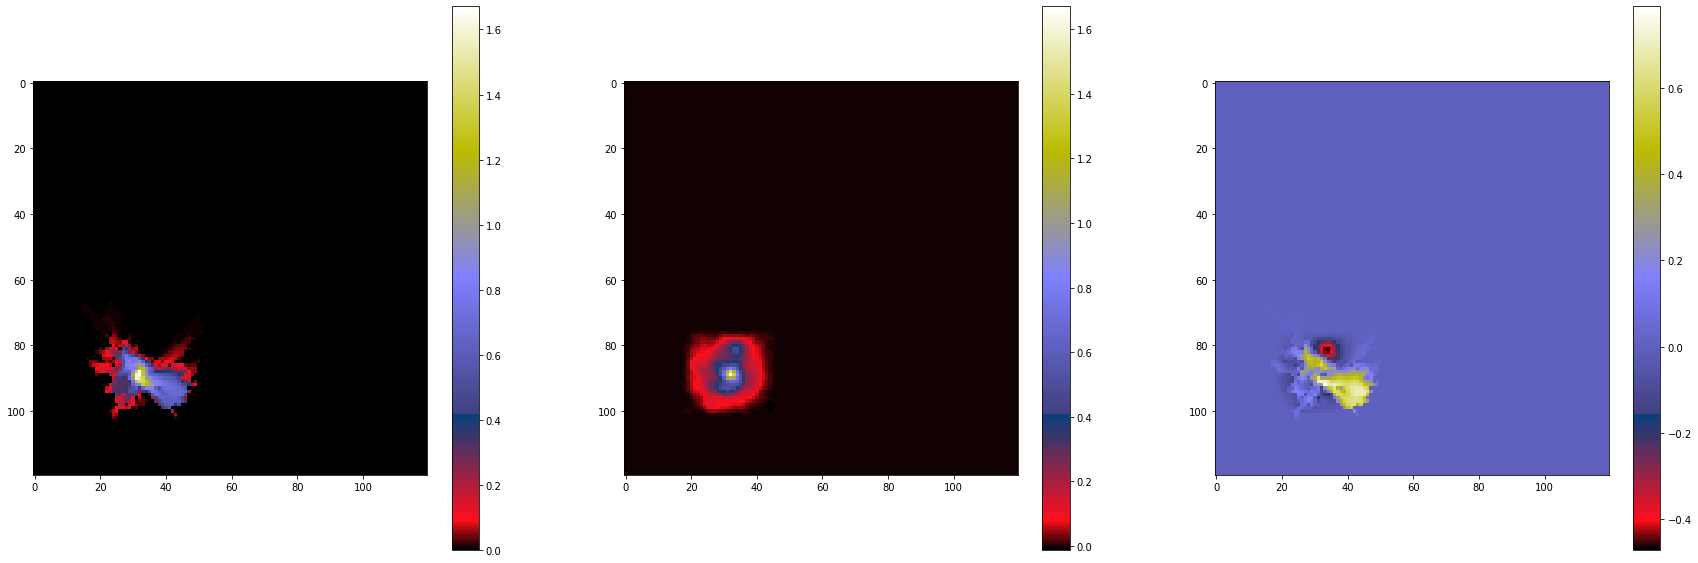

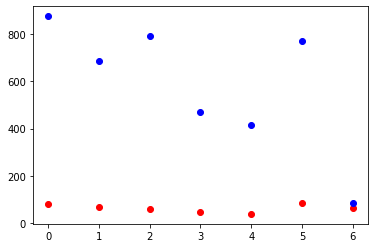

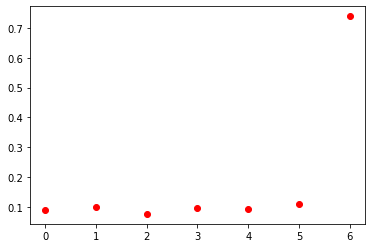

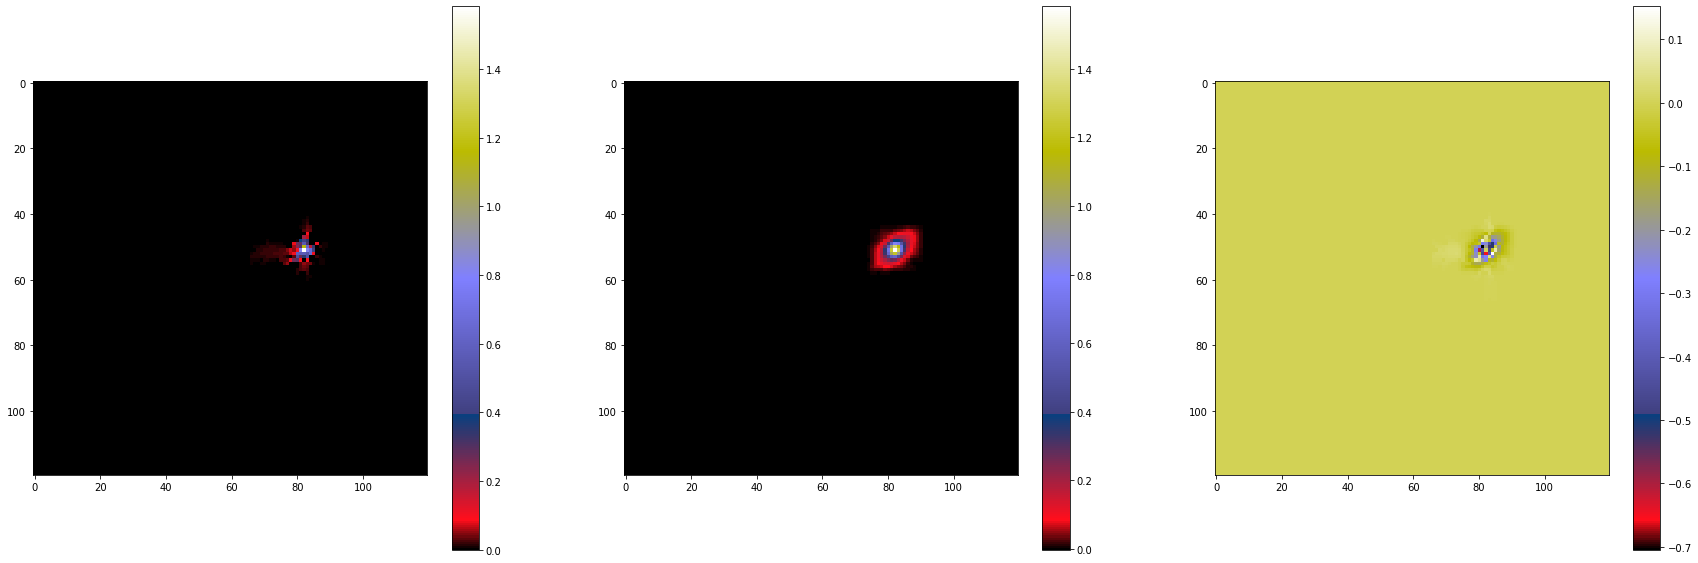

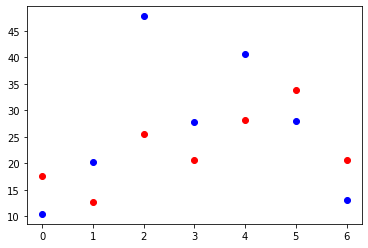

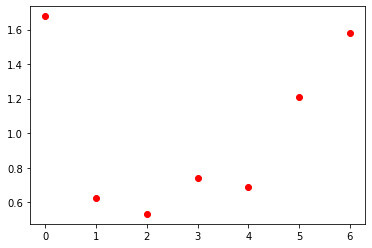

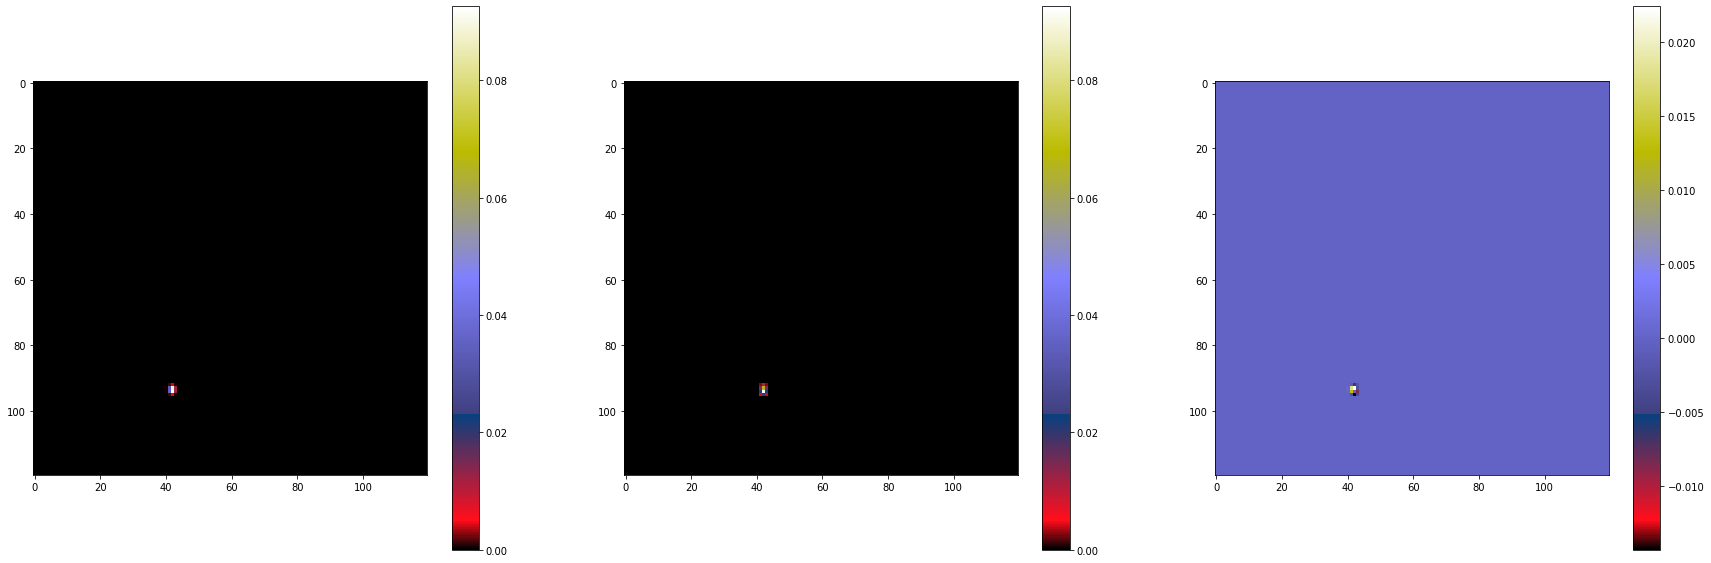

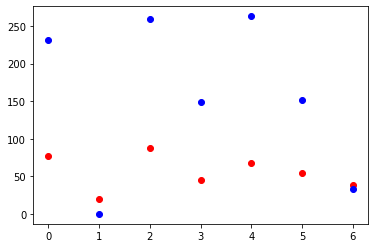

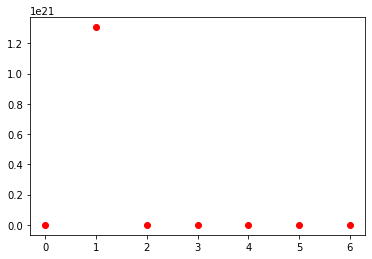

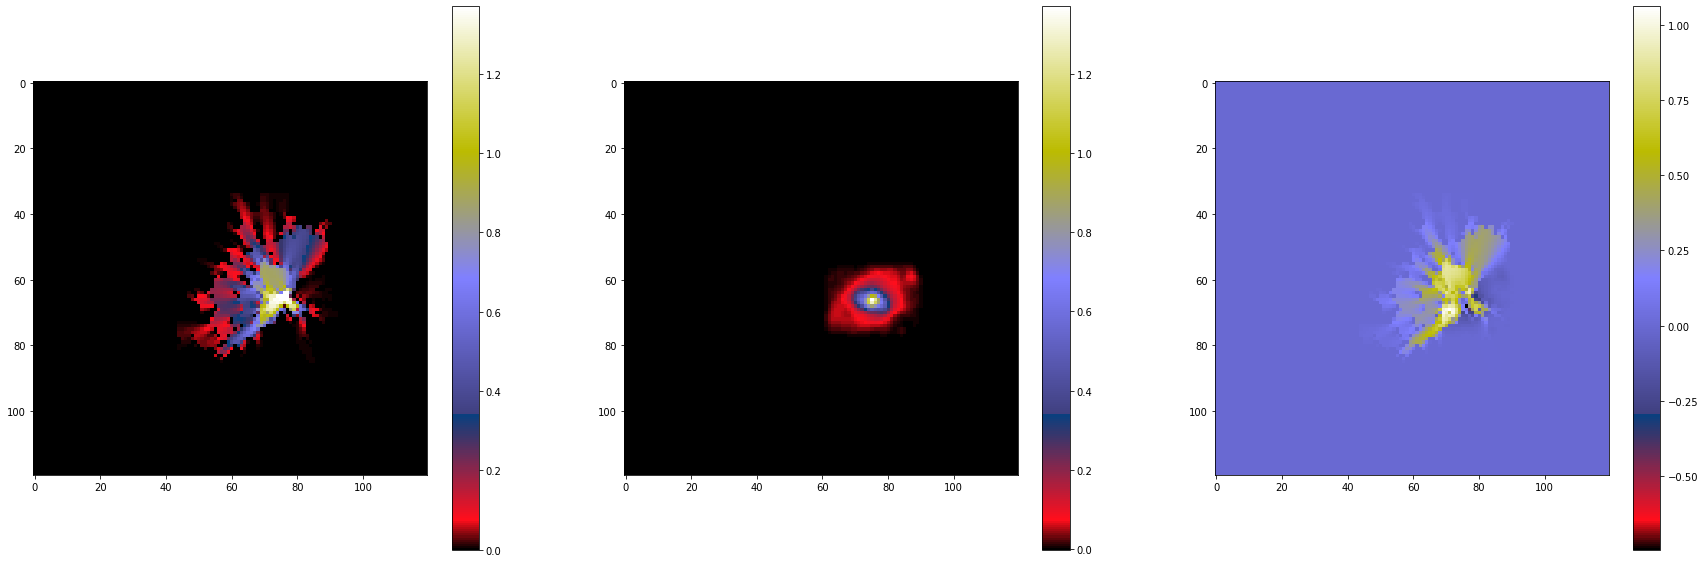

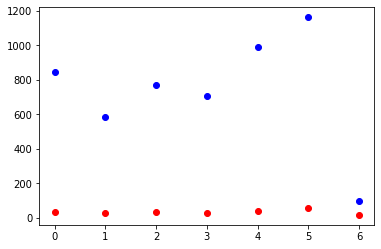

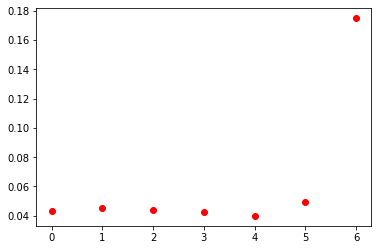

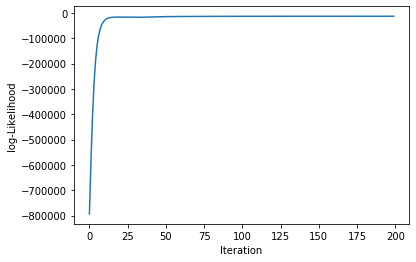

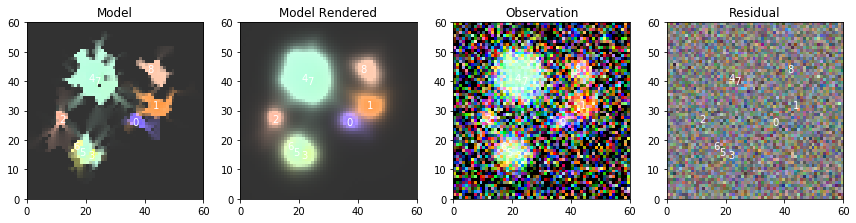

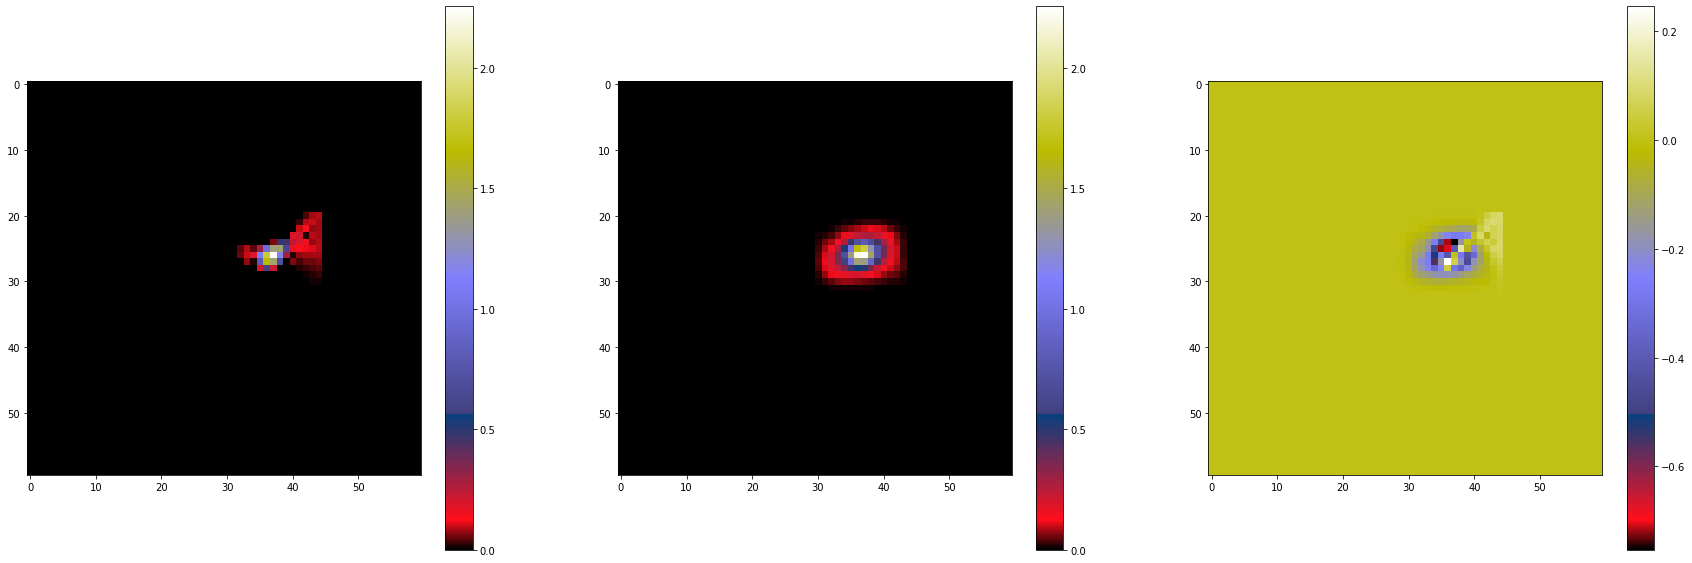

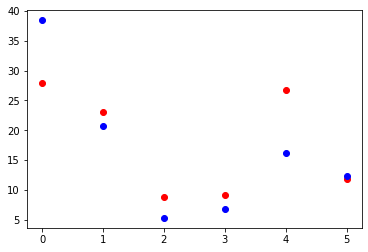

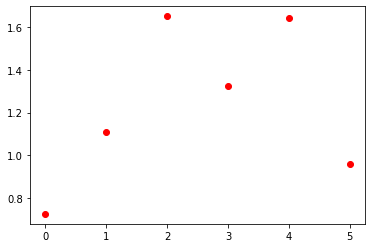

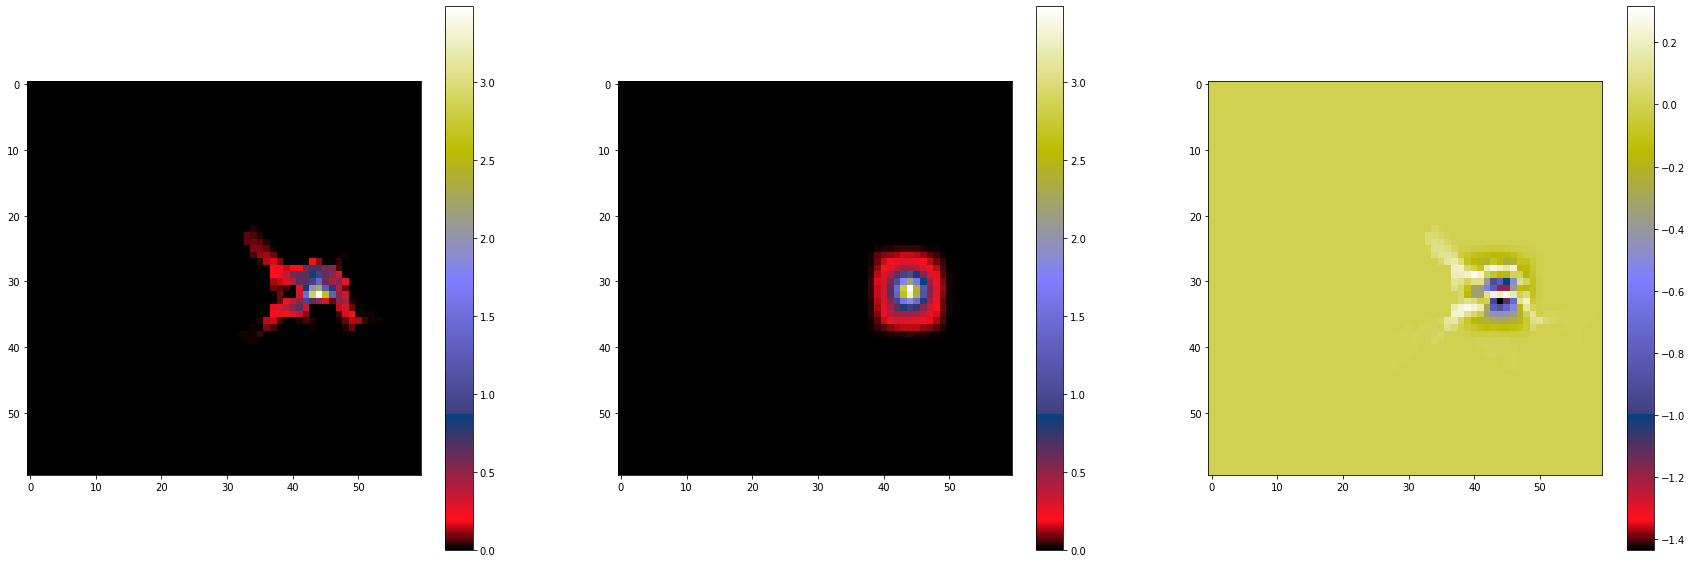

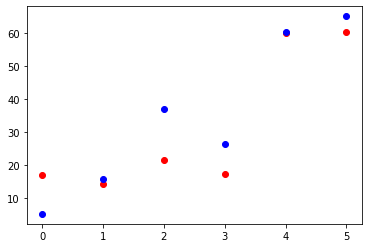

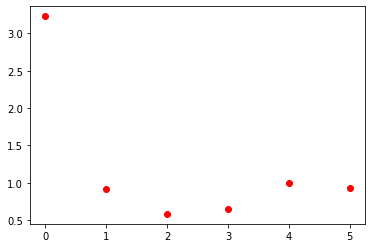

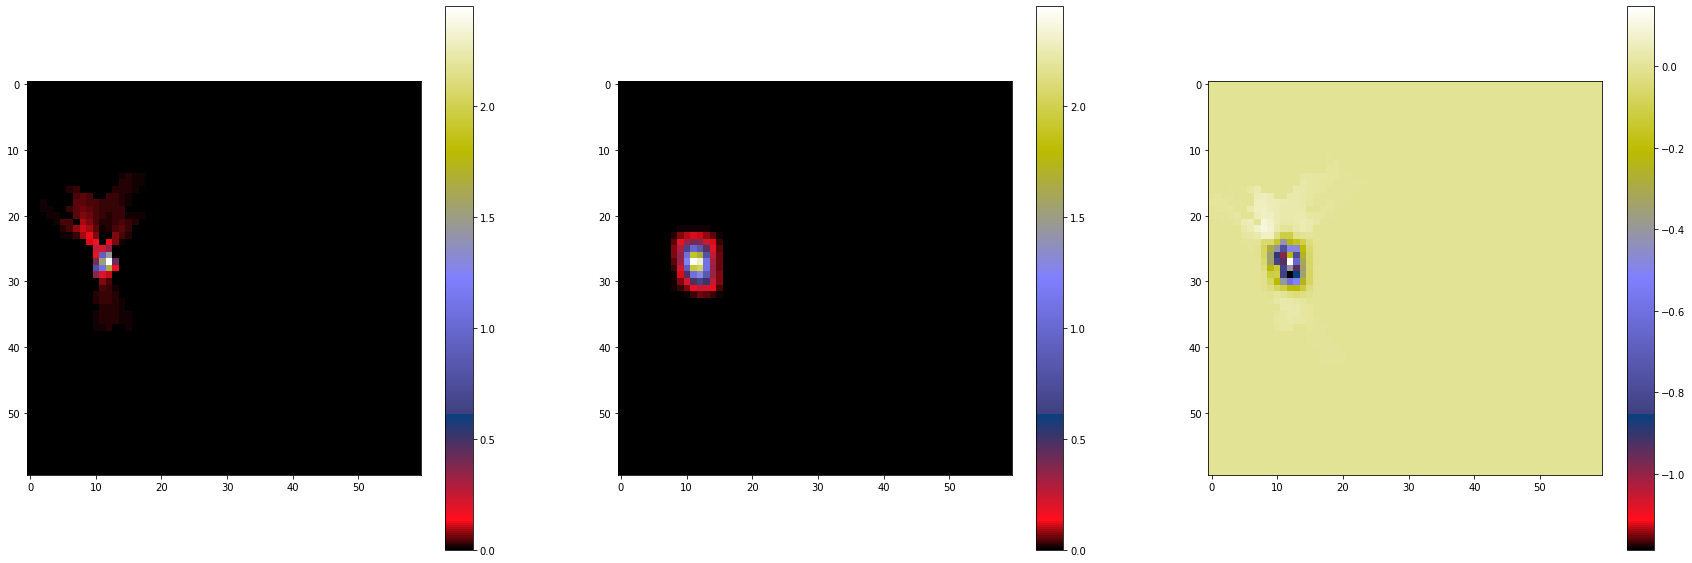

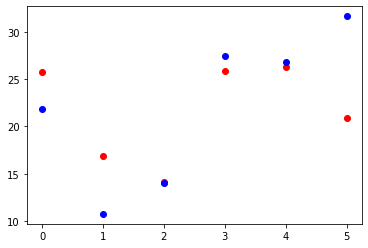

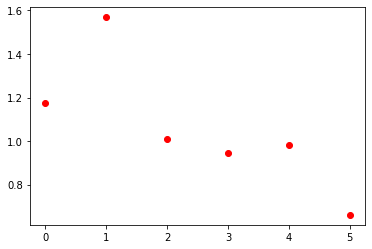

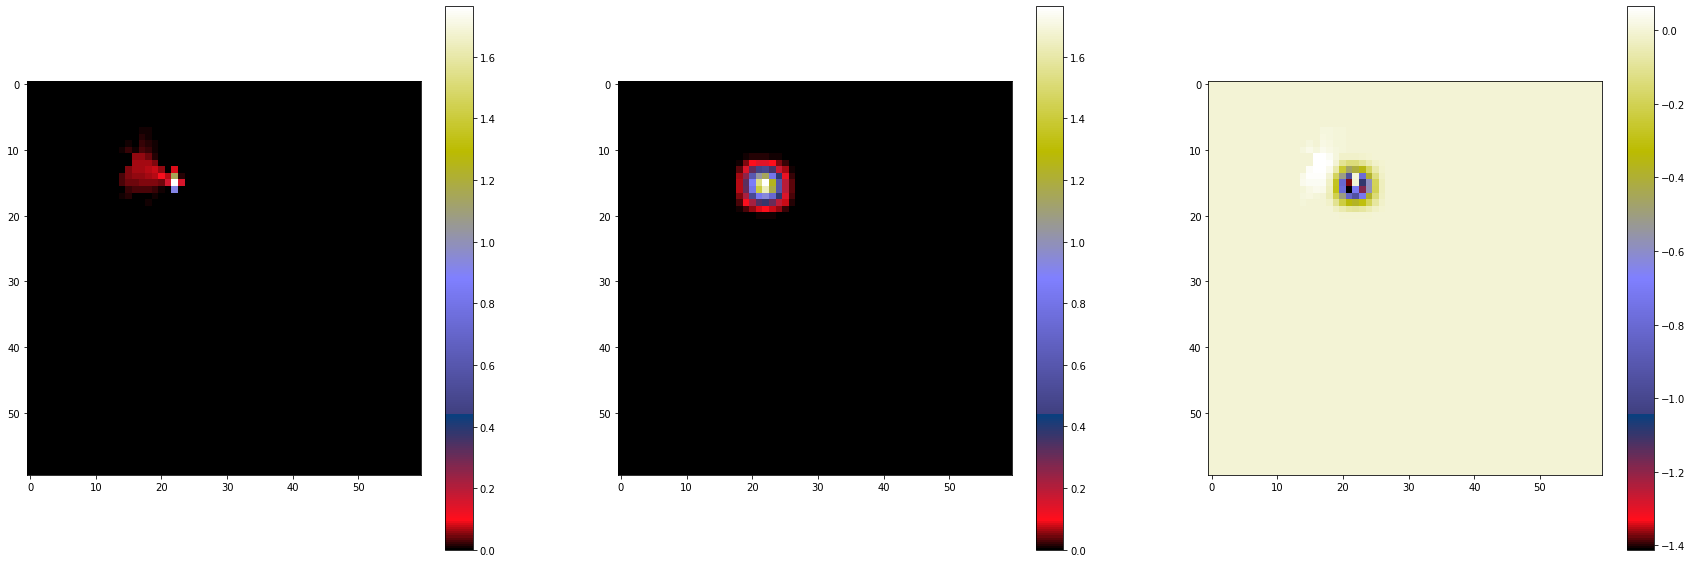

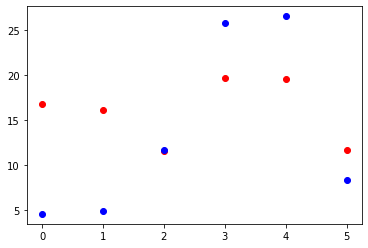

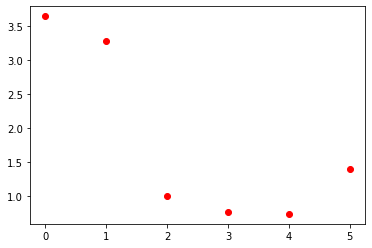

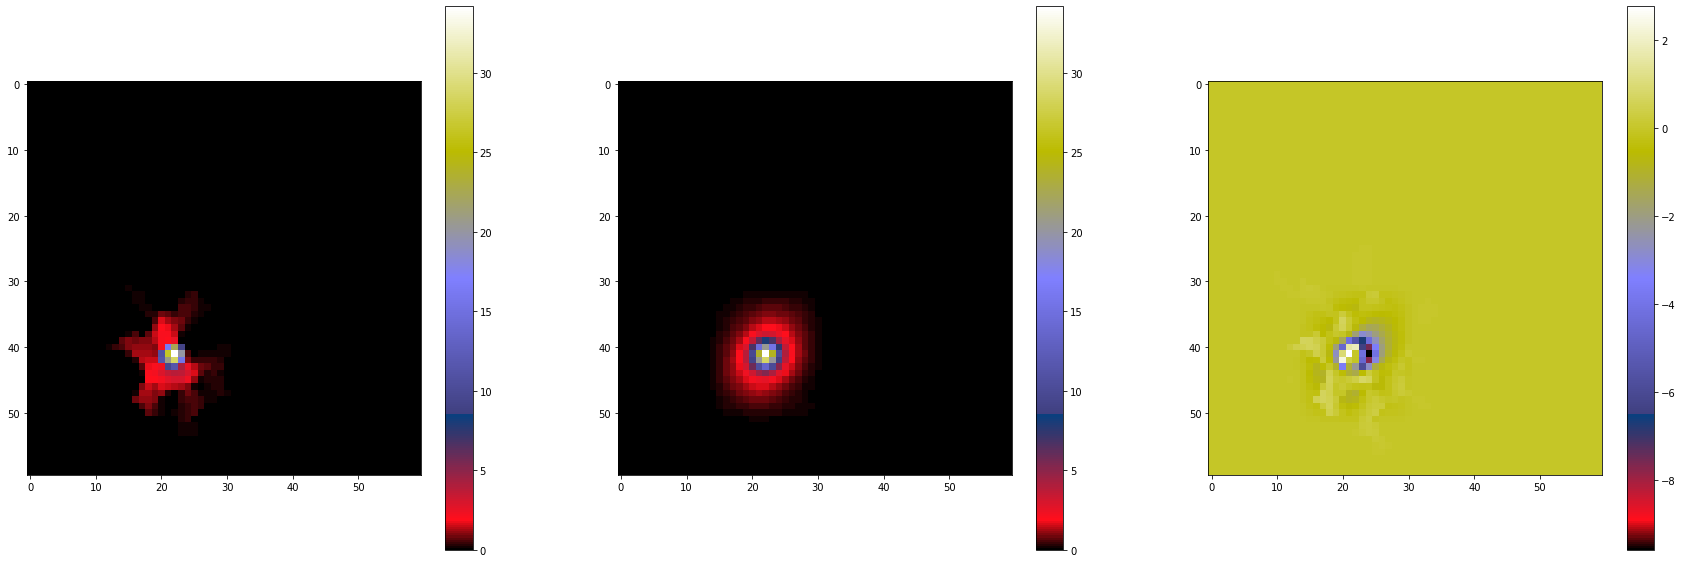

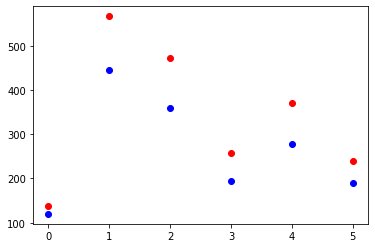

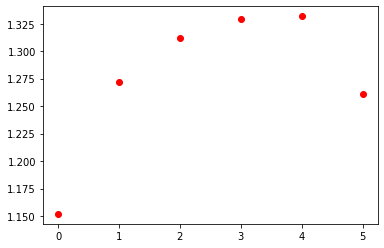

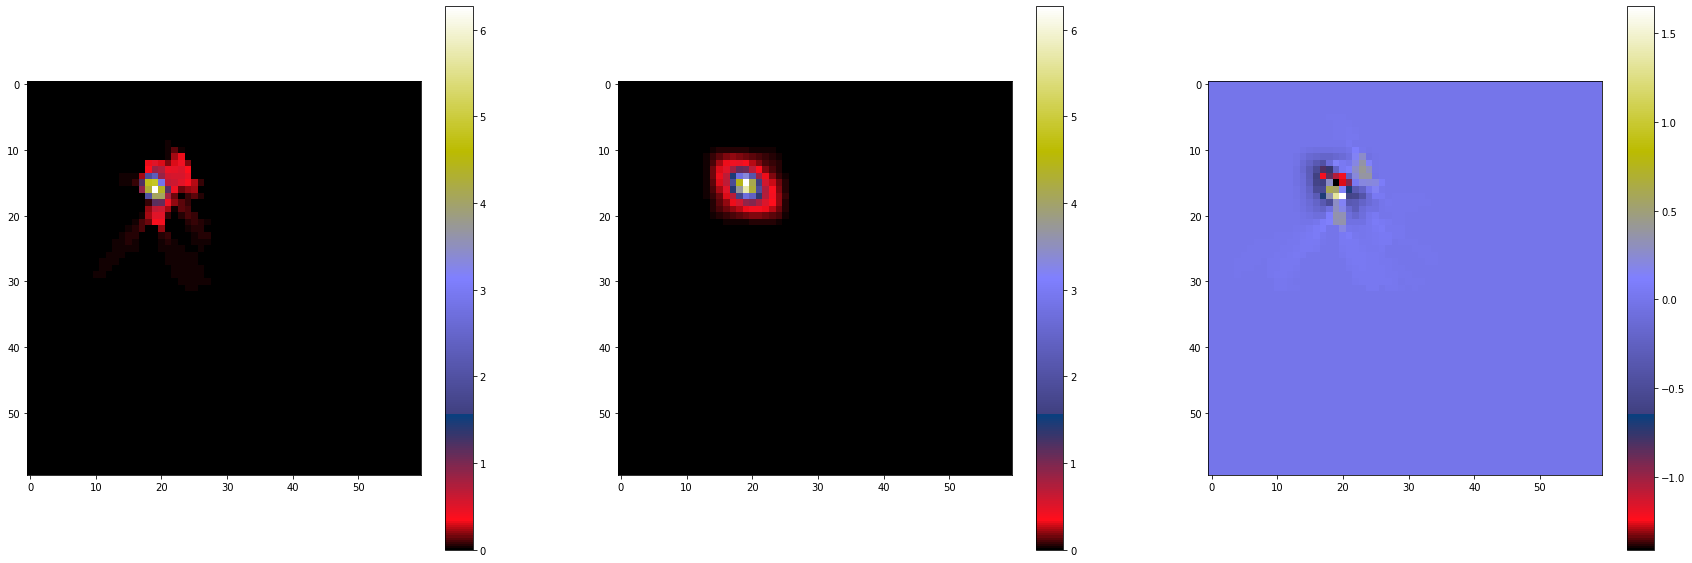

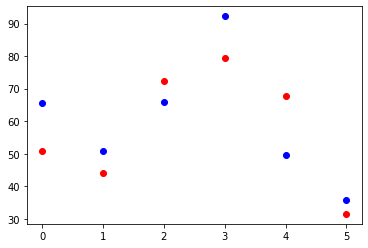

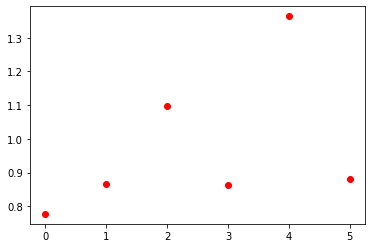

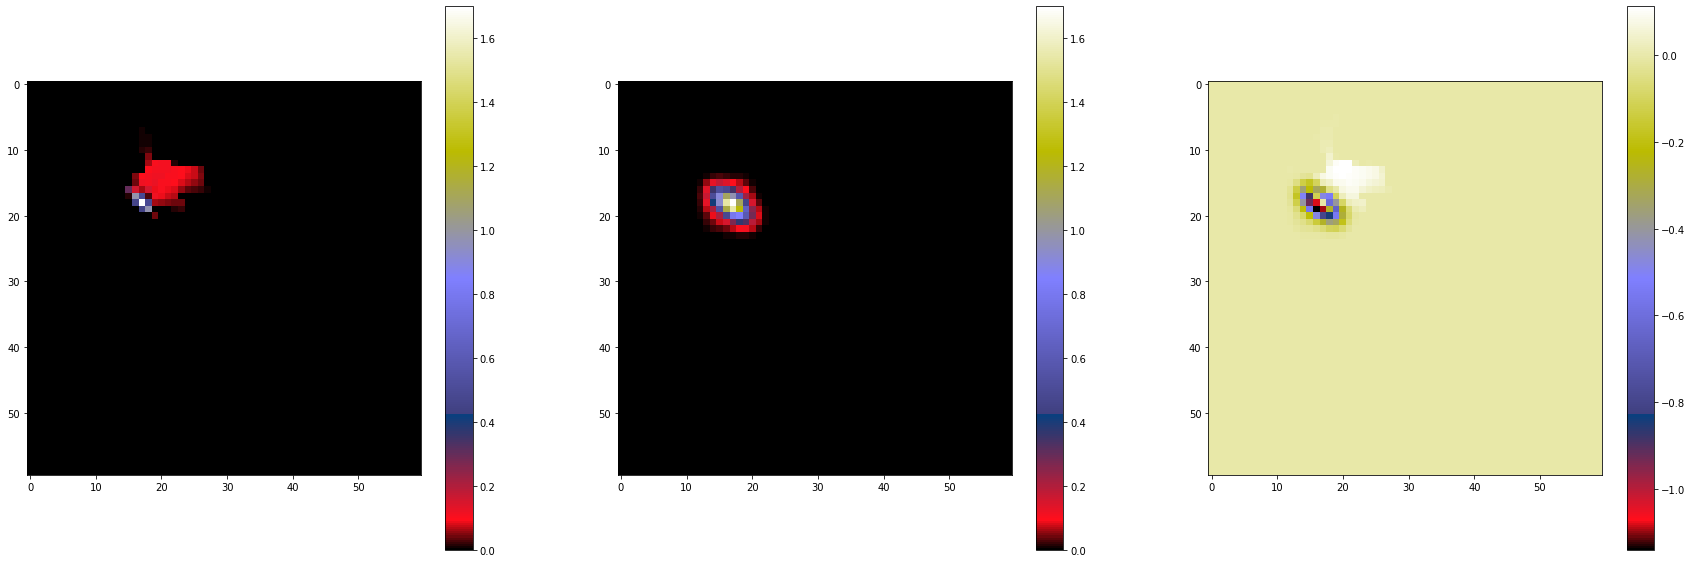

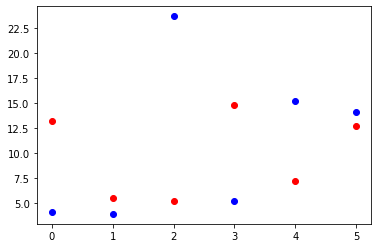

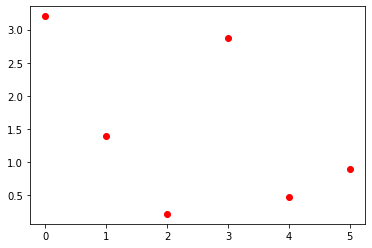

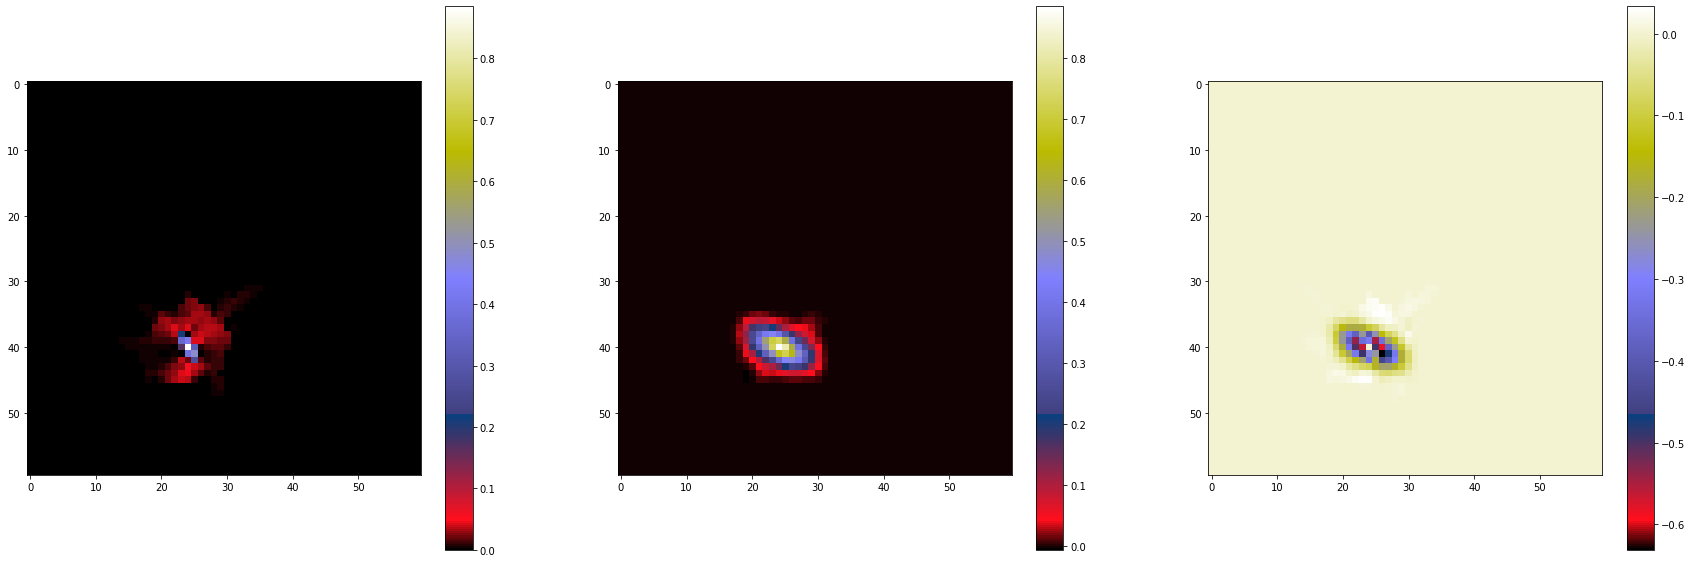

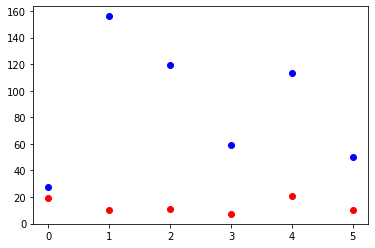

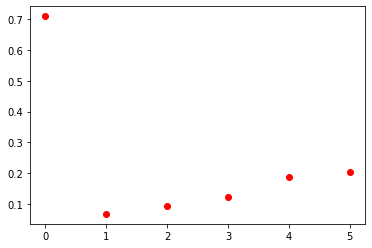

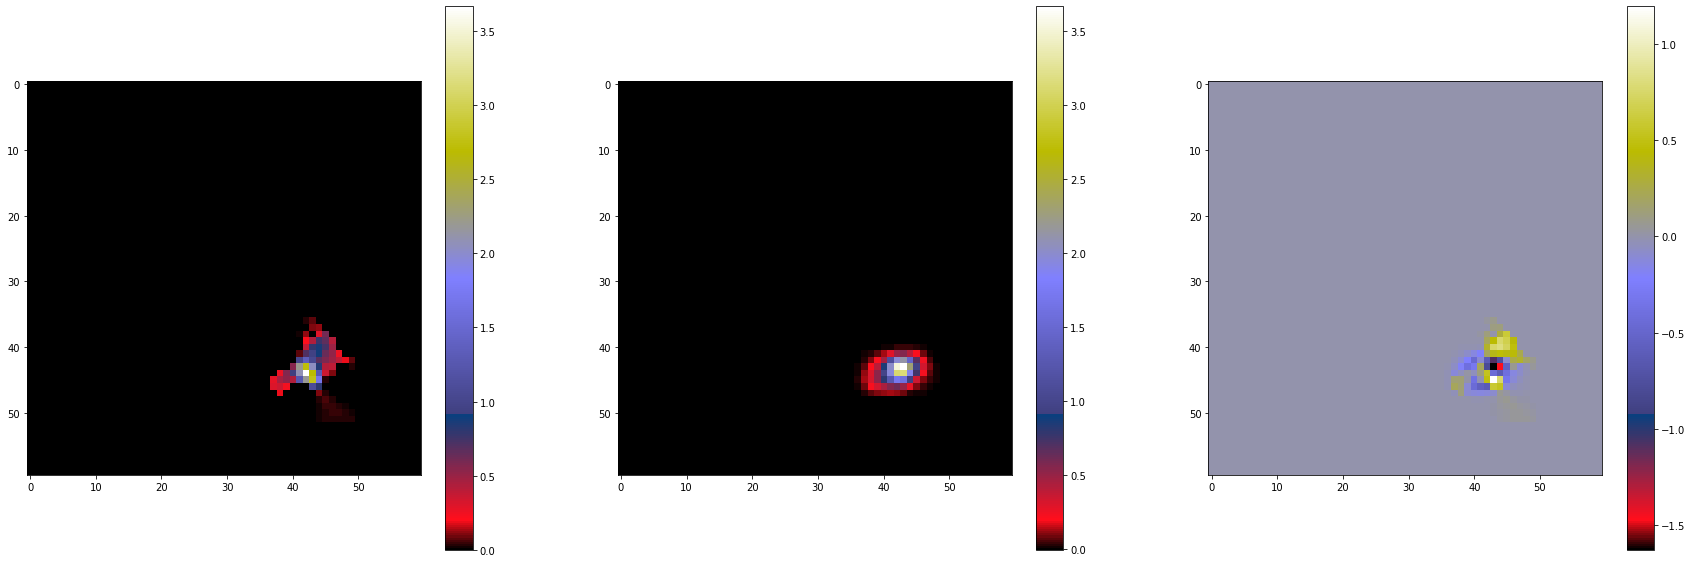

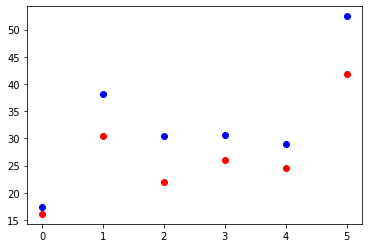

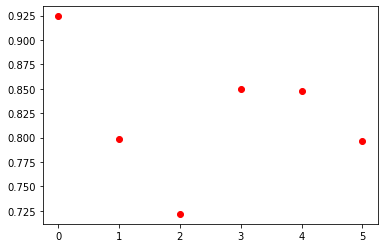

No flux above threshold for source at y=0.33645010944586634 x=-0.5779025714046366
Zero or negative SED [-0.24513865] at y=0.3360483819921301, x=-0.5775880333435653
No flux above threshold for source at y=0.3360483819921301 x=-0.5775880333435653


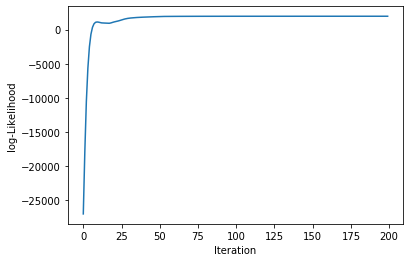

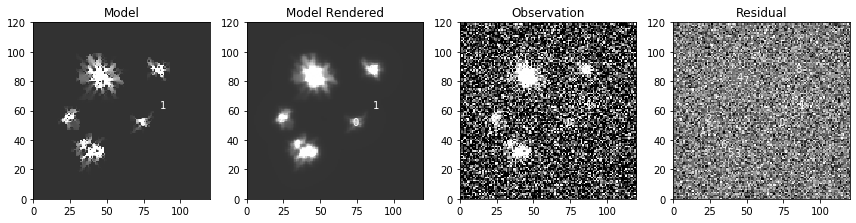

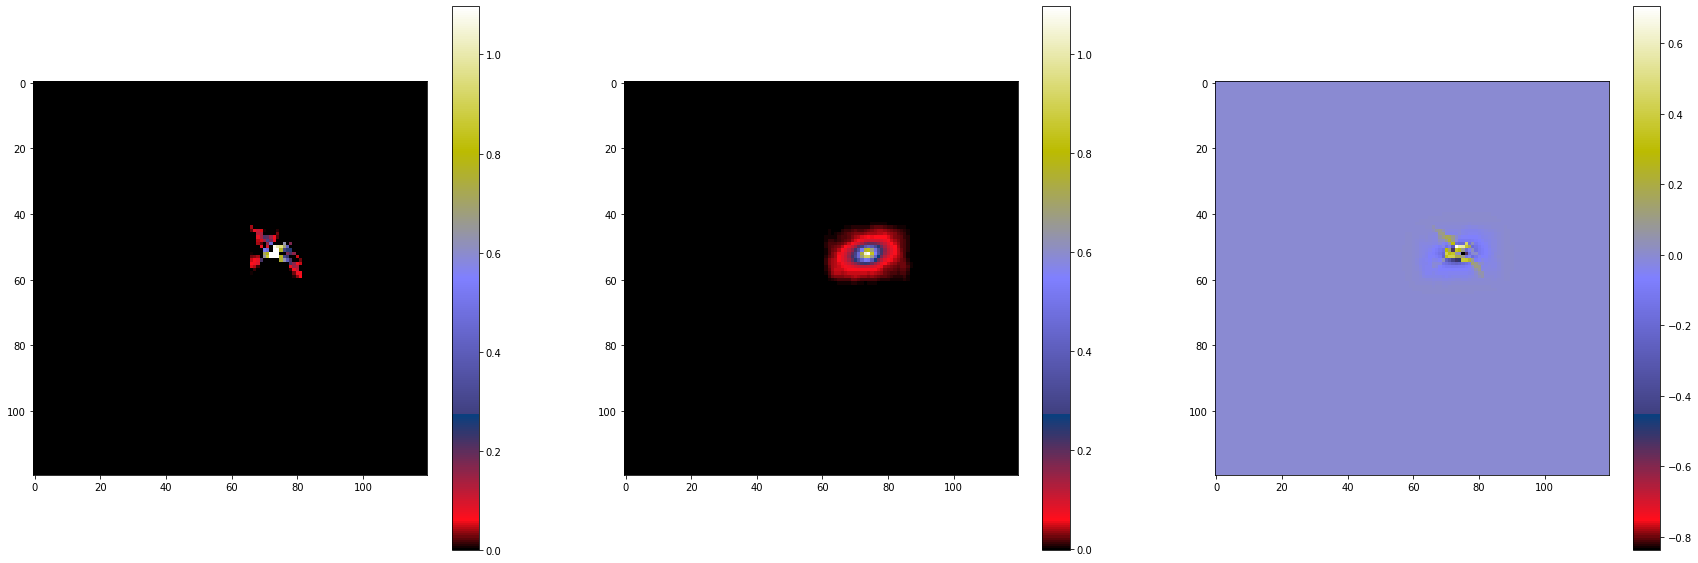

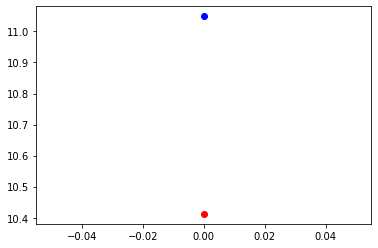

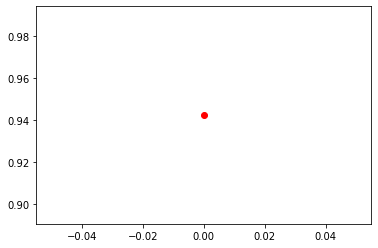

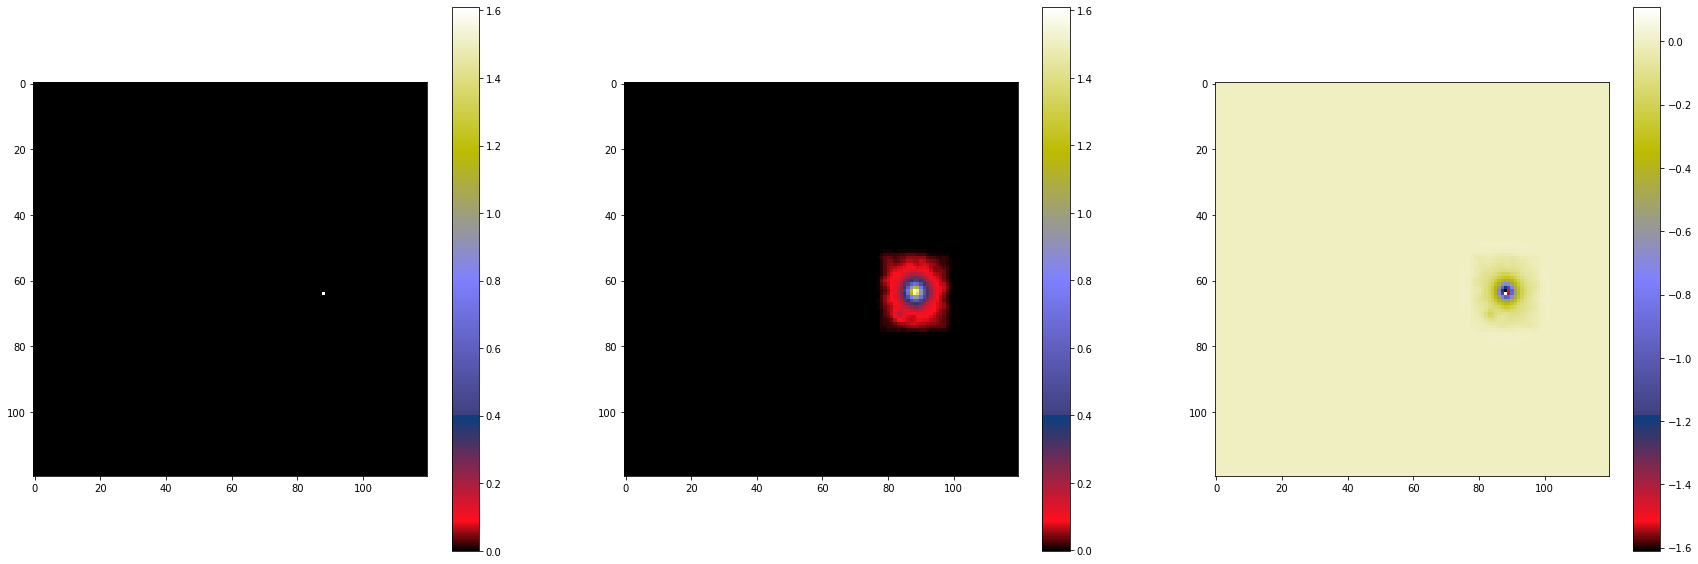

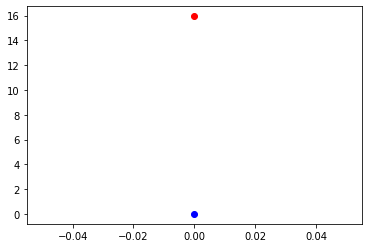

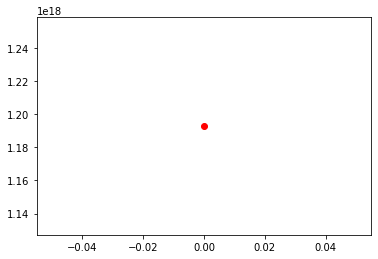

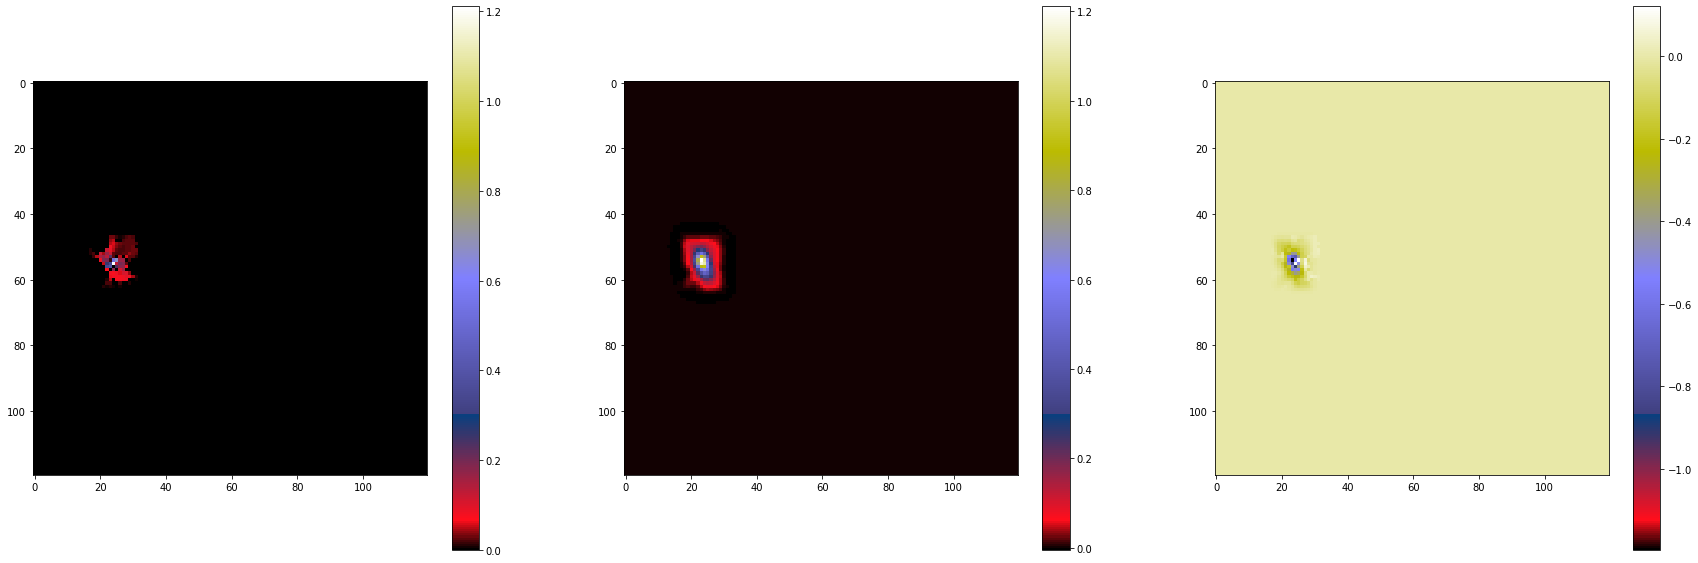

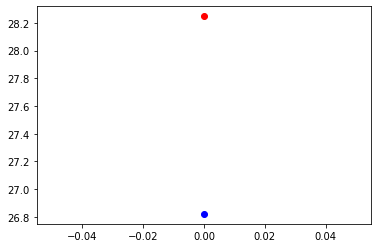

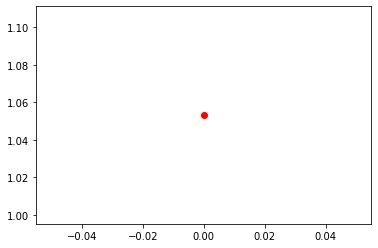

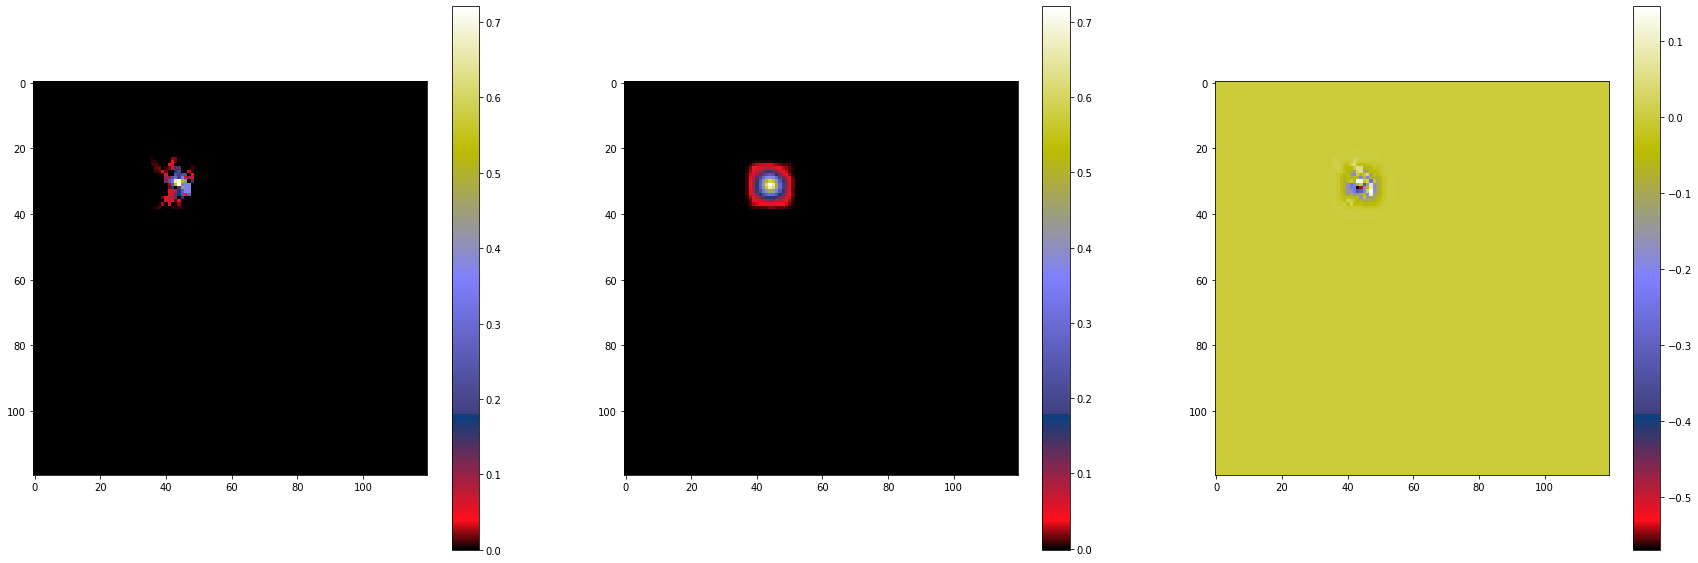

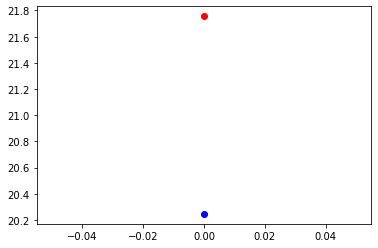

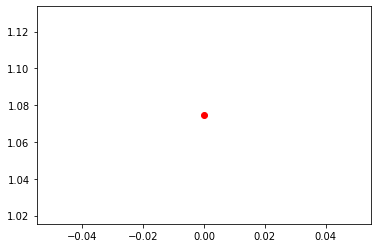

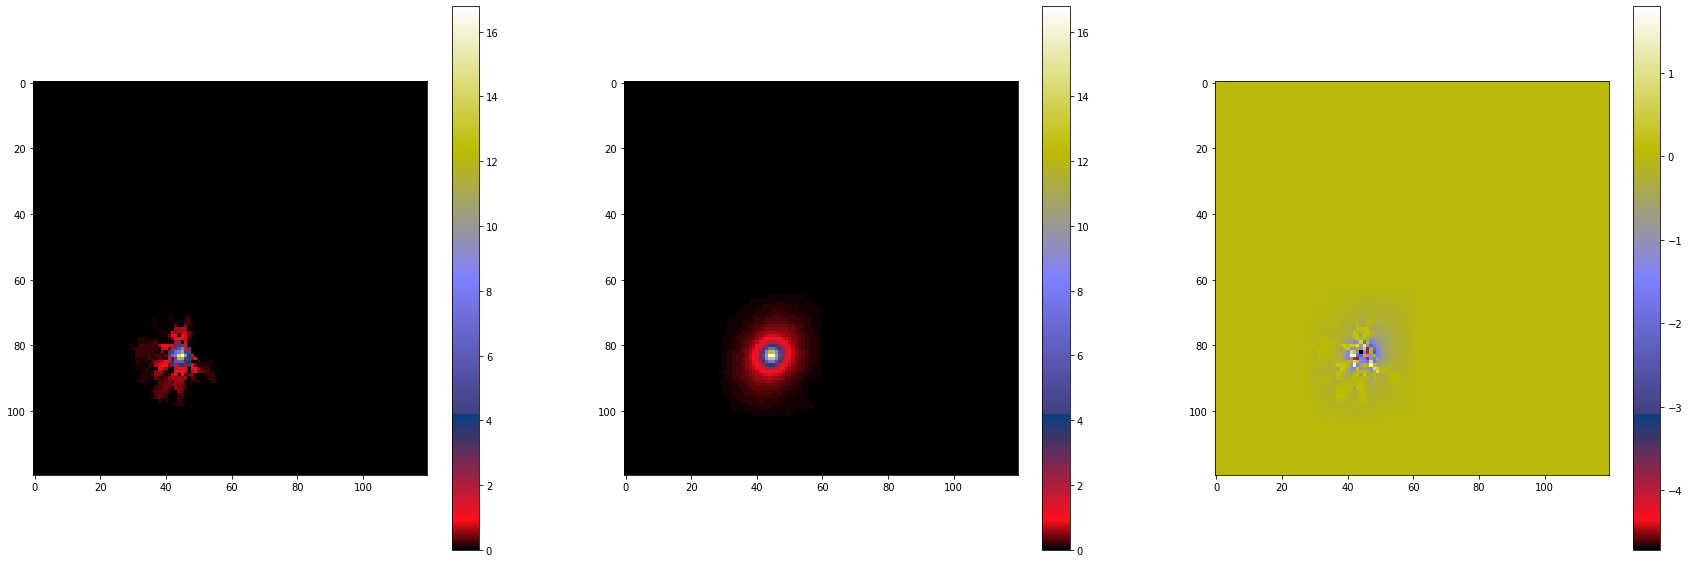

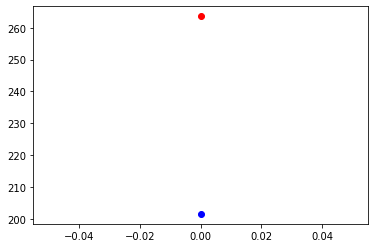

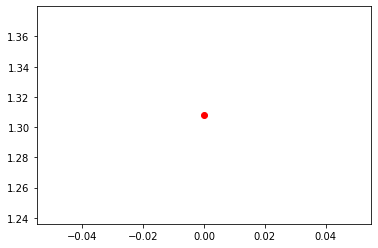

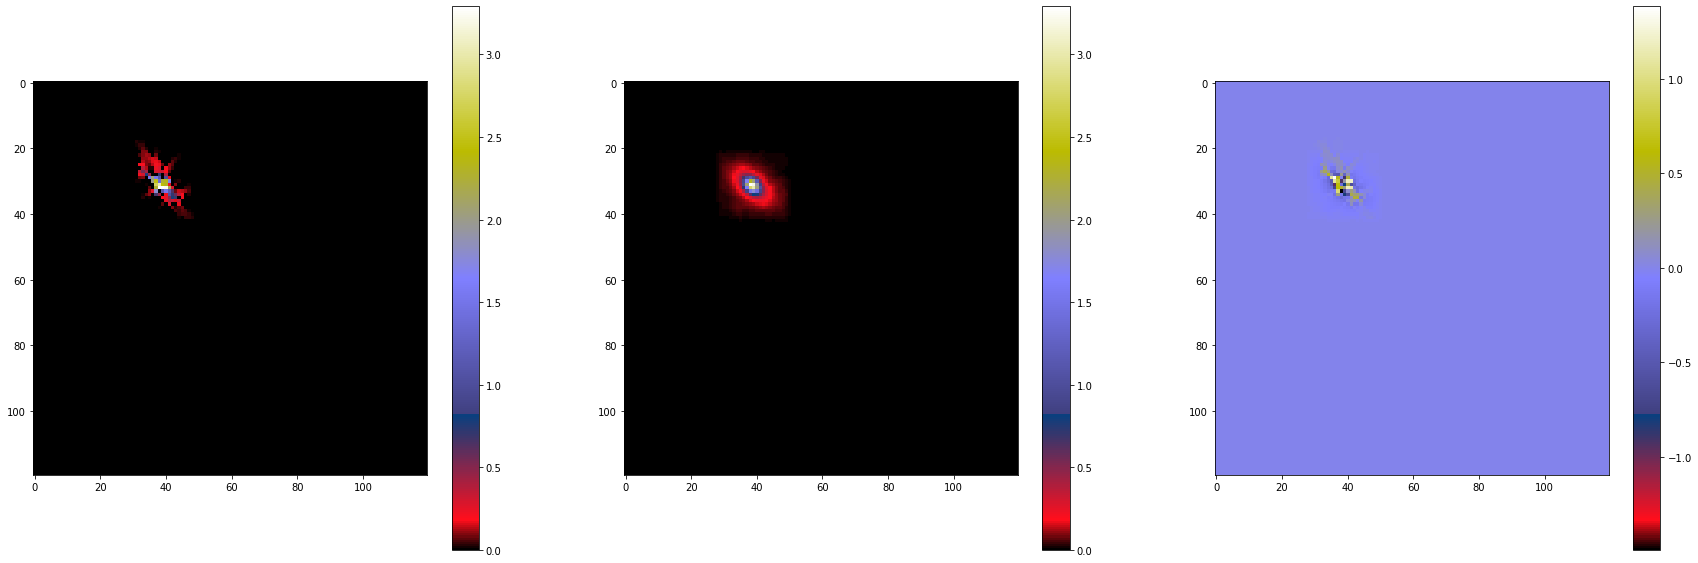

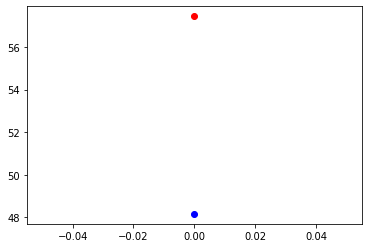

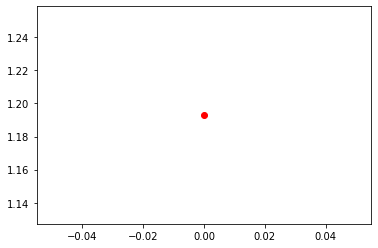

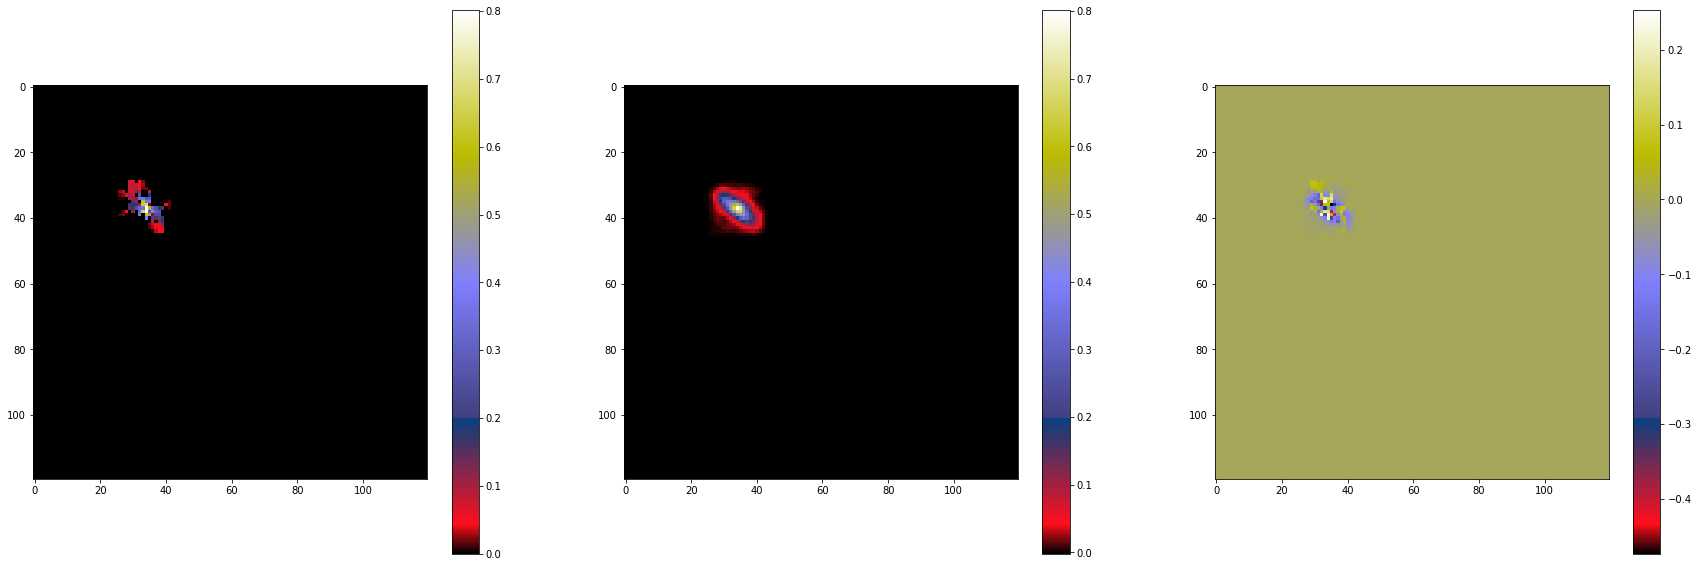

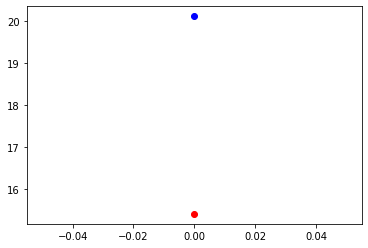

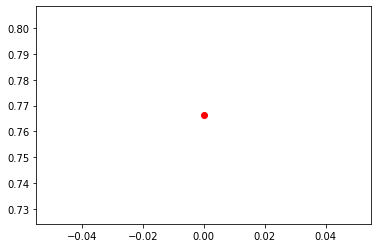

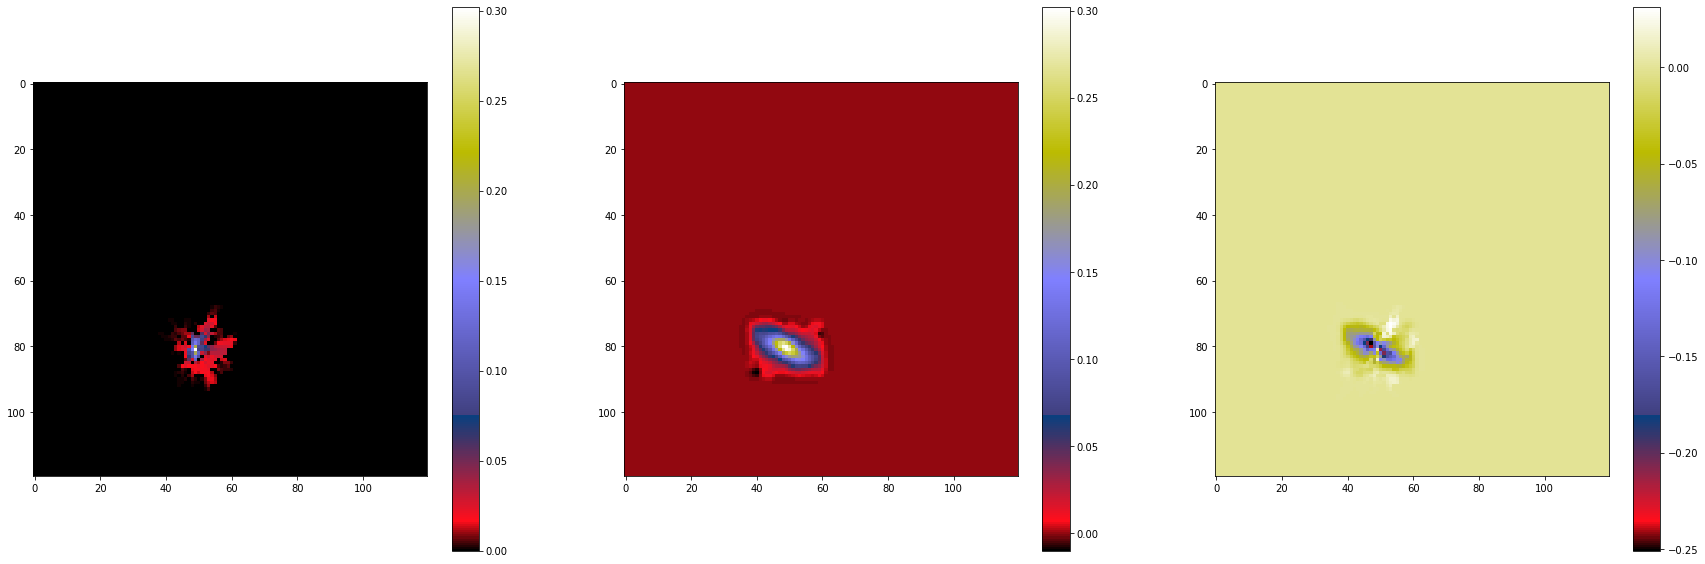

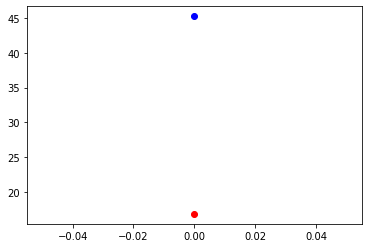

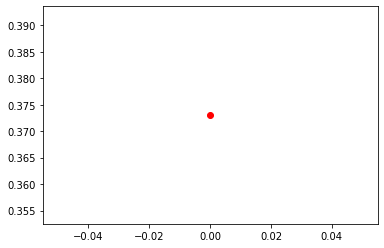

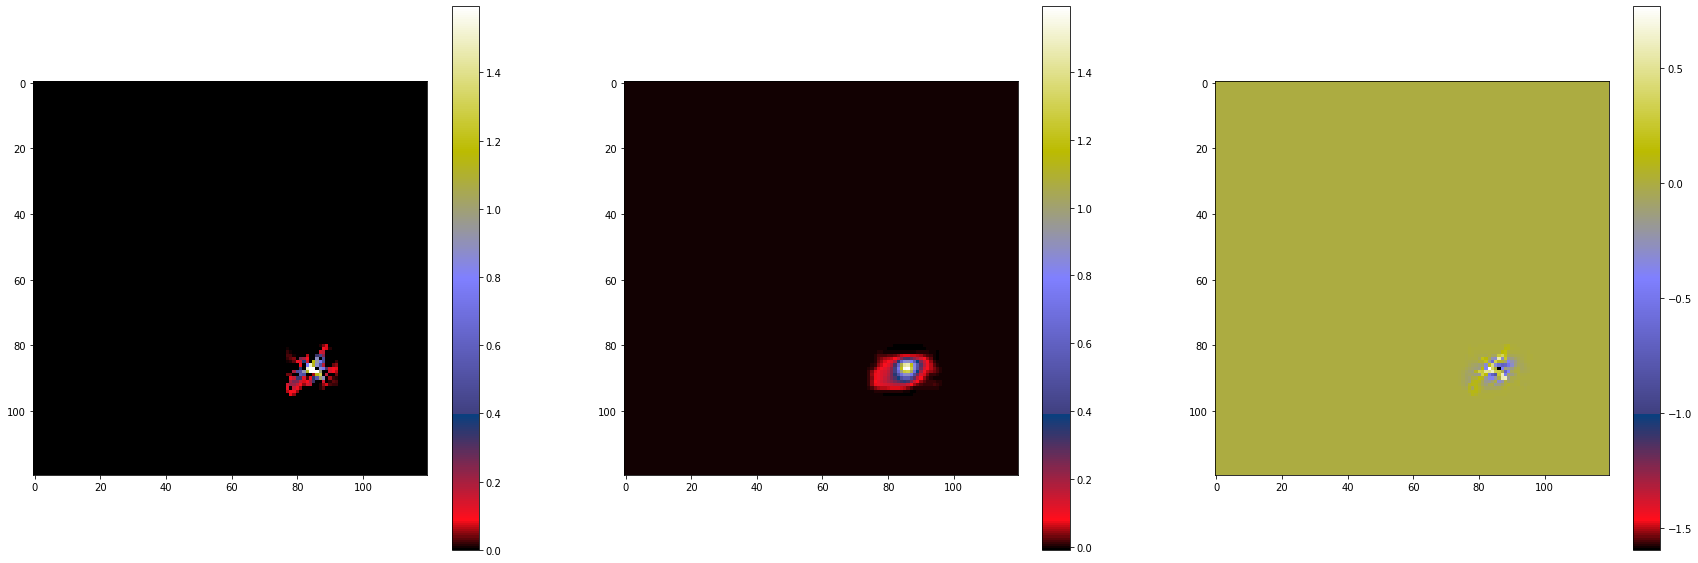

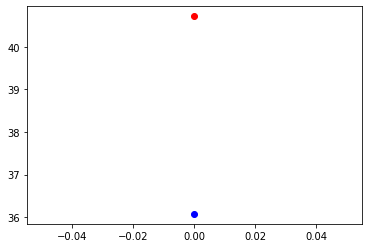

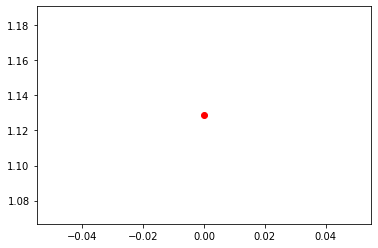

No PSF specified. Possible, but dangerous!
No PSF specified. Possible, but dangerous!
Zero or negative SED [-0.24513865] at y=0.3360483819921301, x=-0.5775880333435653
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-f480abfe0c11>", line 11, in <module>
    sim.run(5, plot = True)
  File "/Users/remy/Desktop/git_repos/Multi_resolution_comparison/mr_tools/mr_tools/galsim_compare_tools.py", line 448, in run
    r.run(it = 200, e_rel = 1.e-7, plot = plot)
  File "/Users/remy/Desktop/git_repos/scarlet_extensions/scarlet_extensions/scripts/runner.py", line 80, in run
    self.blend.fit(it, e_rel=e_rel)
  File "/Users/remy/Desktop/git_repos/scarlet/scarlet/blend.py", line 164, in fit
    **alg_kwargs
  File "/Users/remy/Desktop/LSST_Project/proxmin/proxmin/algorithms.py", line 333, in adaprox
    G = _as_tuple(grad(*X))
  File "/Users/remy/Desktop/git_repos/scarlet/scarlet/blend.py", line 122, in <lambda>
    _grad = lambda *X: tuple(l + p for l, p in zip(grad_logL(*X), grad_logP(*X)))
  F

KeyboardInterrupt: 

In [8]:
runners = [run_lr, run_hr, run_multi]
sim = gct.simulation(cat, runners, ngal = 10, cats = [True]*3, hr_dict=hr_dict, lr_dict=lr_dict, n_lr=nlr)

try:
    sim.results = pickle.load(open("./sim_results.pkl", "rb" ))
    sim.plot()   
except:
    print("File not found")
#[r.observations[-1].slices_for_model[1:]]

sim.run(5, plot = True)
sim.plot()

In [ ]:
for i in range(100):
    sim.run(5)
    sim.plot()
  #  f = open("sim_results.pkl","wb")
    pickle.dump(sim.results, f)
    f.close()

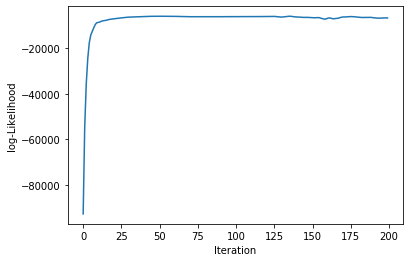

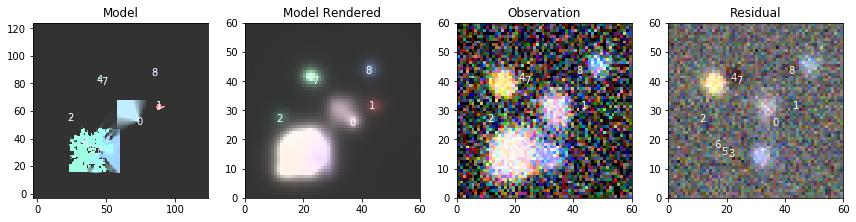

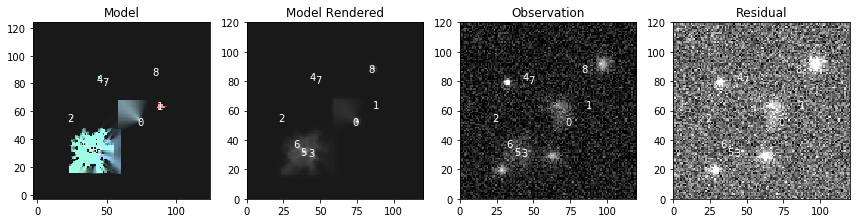

In [27]:
                    hr, lr, wcs_hr, wcs_lr, psf_hr, psf_lr, shifts, ks, gs_lr, gs_hr, seds_hr, seds_lr = gct.mk_scene(sim.hr_dict, 
                                                                      sim.lr_dict, 
                                                                      sim.cat, 
                                                                      (sim.n_hr,sim.n_hr), 
                                                                      (sim.n_lr,sim.n_lr), 
                                                                      8, gal_type = 'real')
    
                    
                    r = run_multi
                    ytrue, xtrue = shifts[:,0], shifts[:,1]

                    # Convert the HST coordinates to the HSC WCS
                    ratrue, dectrue = wcs_hr.wcs_pix2world(ytrue,xtrue,0)
                    catalog_true = np.array([ratrue, dectrue]).T

                    hr = hr[None, :,:]
                    data_hr =  Data(hr, wcs_hr, psf_hr, sim.hr_dict['channels'])
                    data_lr =  Data(lr, wcs_lr, psf_lr, sim.lr_dict['channels'])
                
                    
                    r.data = [data_lr, data_hr]
        
                    r.run(it = 200, e_rel = 1.e-7, plot = plot)
                            
                    model = r.blend.get_model()
                    


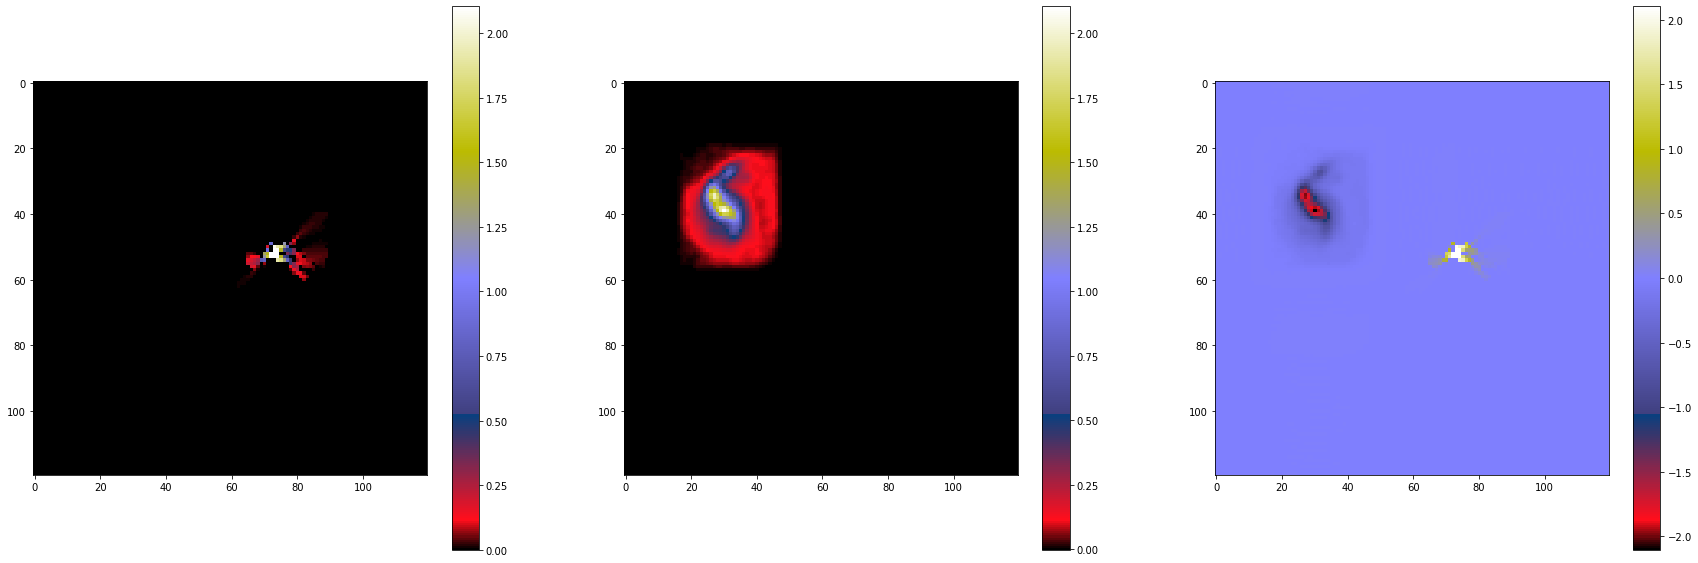

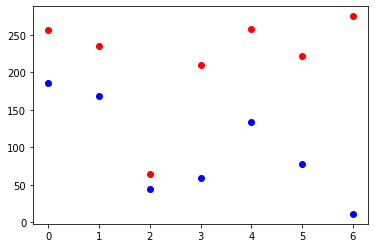

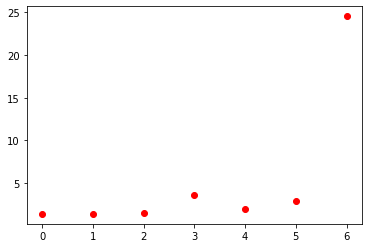

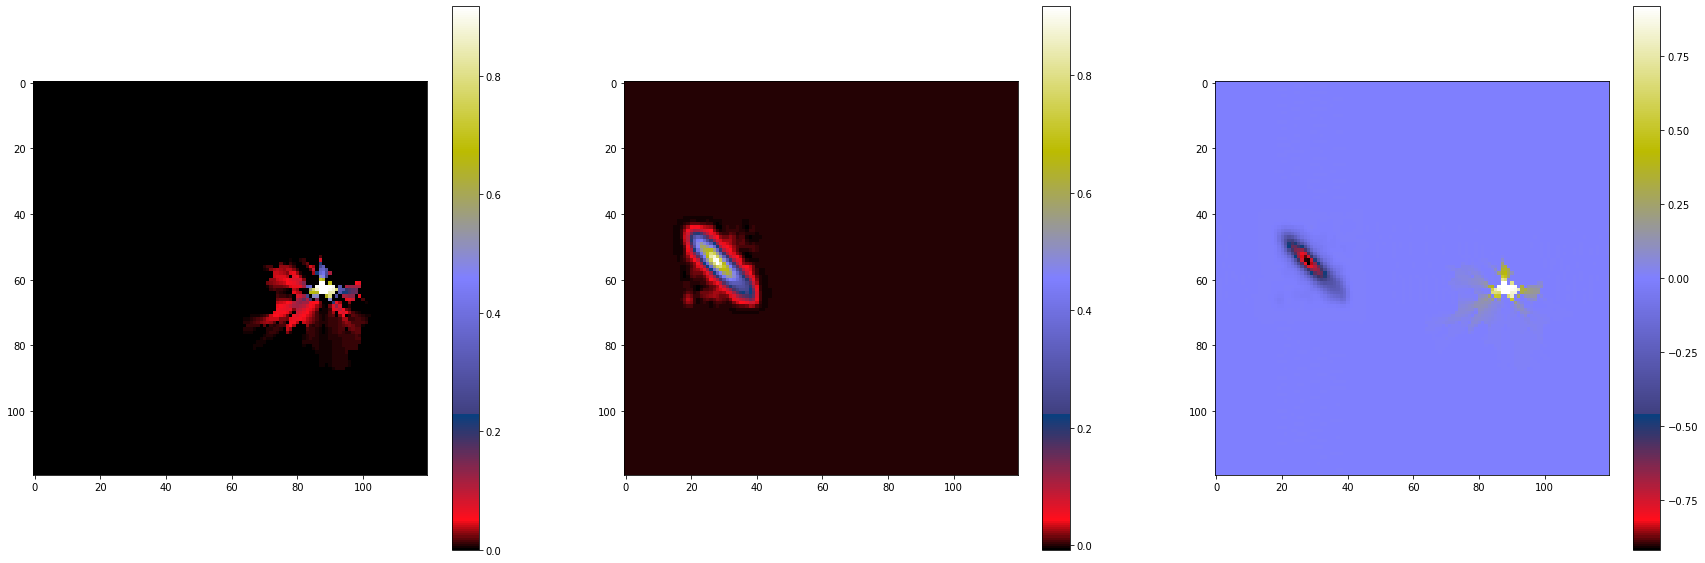

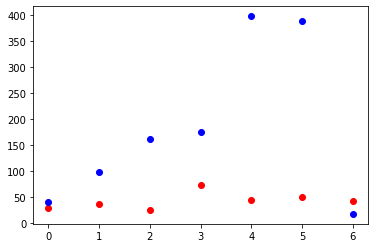

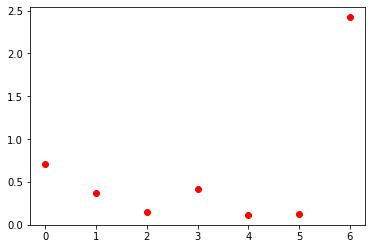

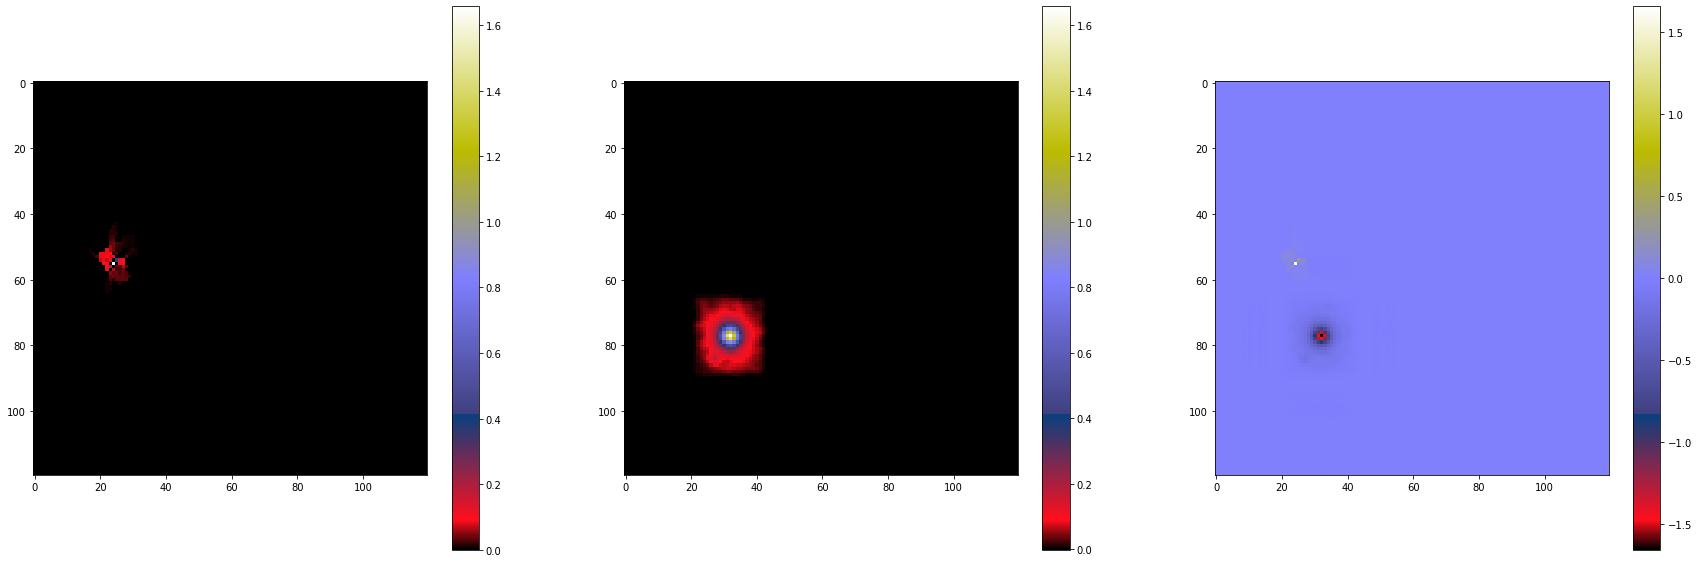

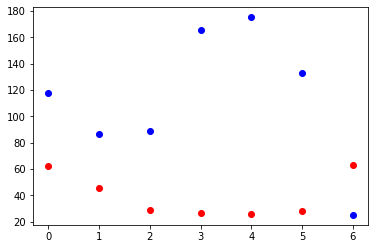

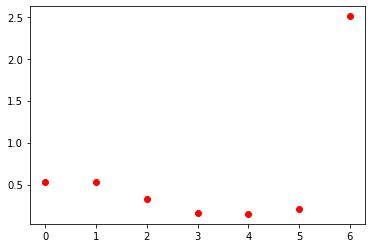

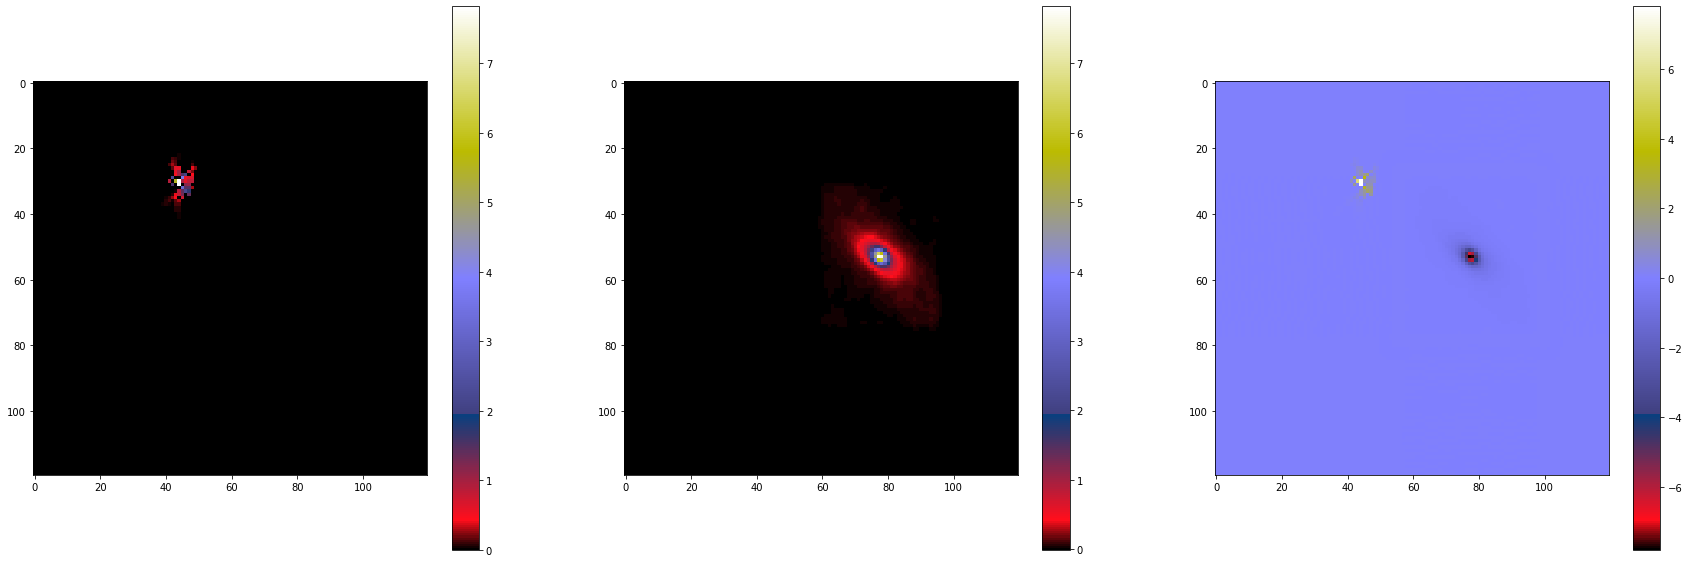

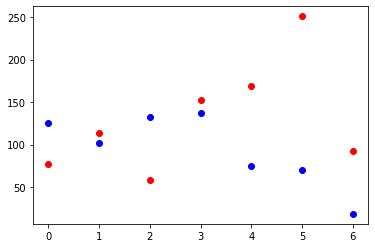

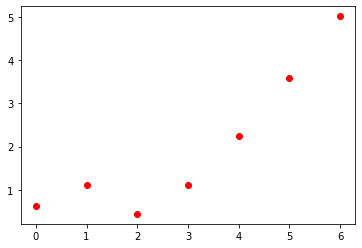

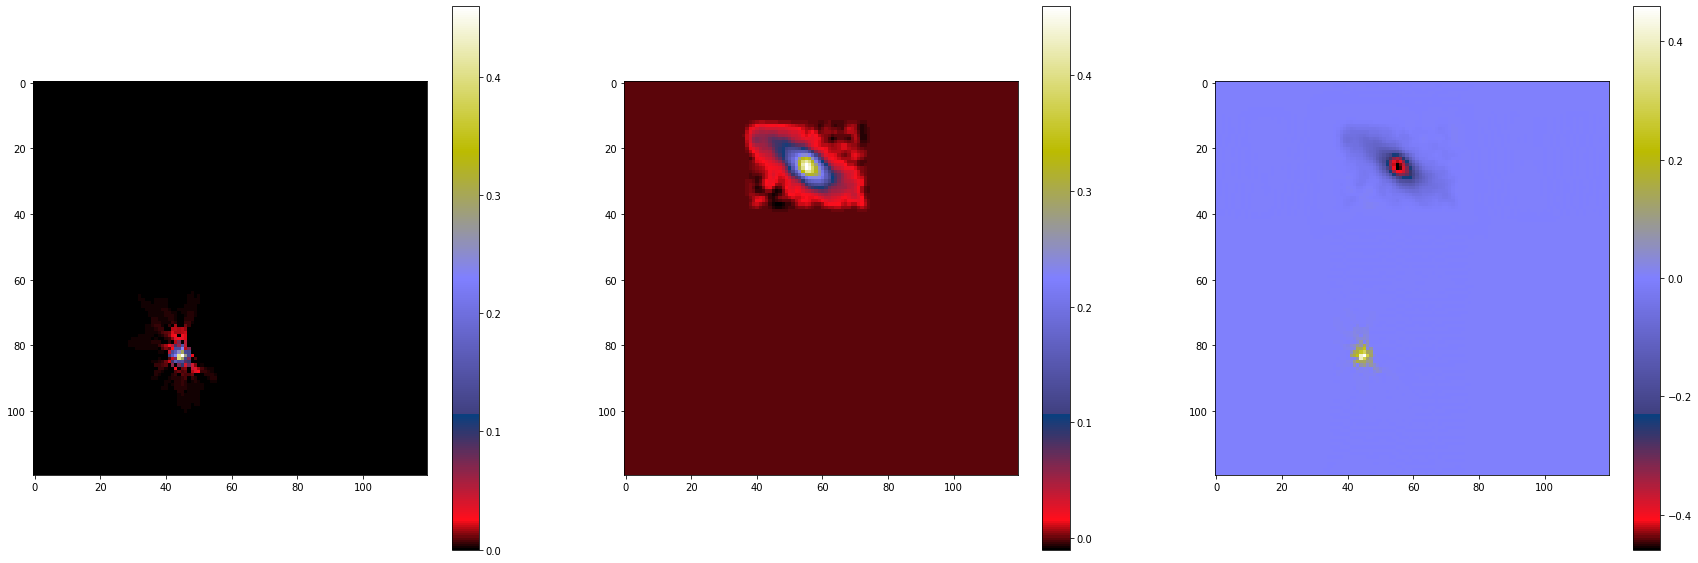

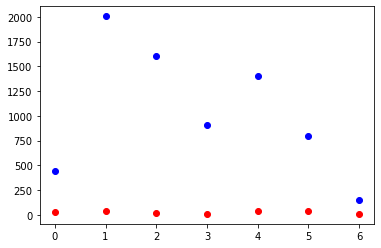

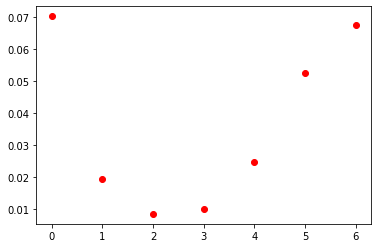

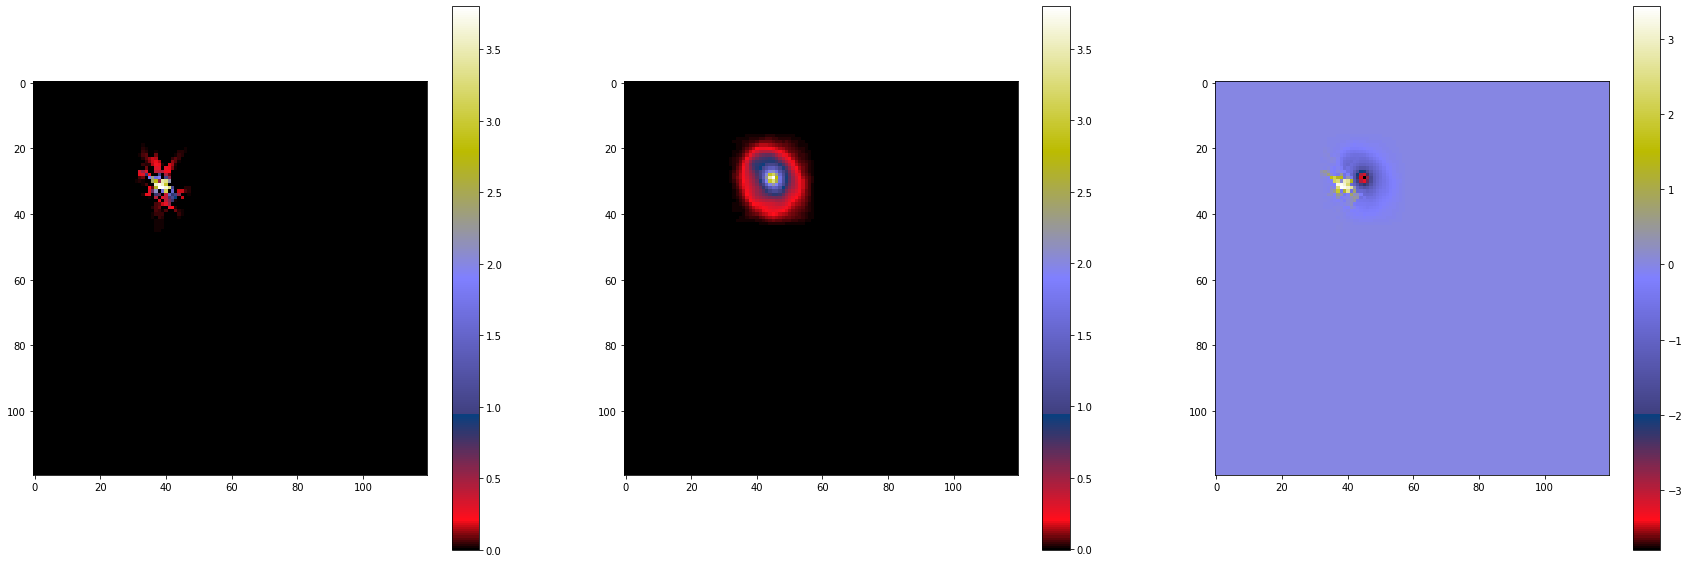

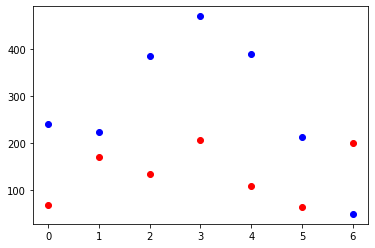

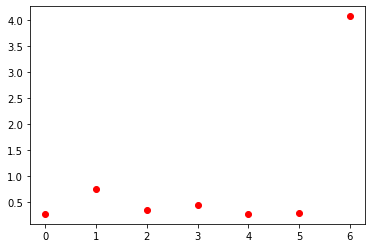

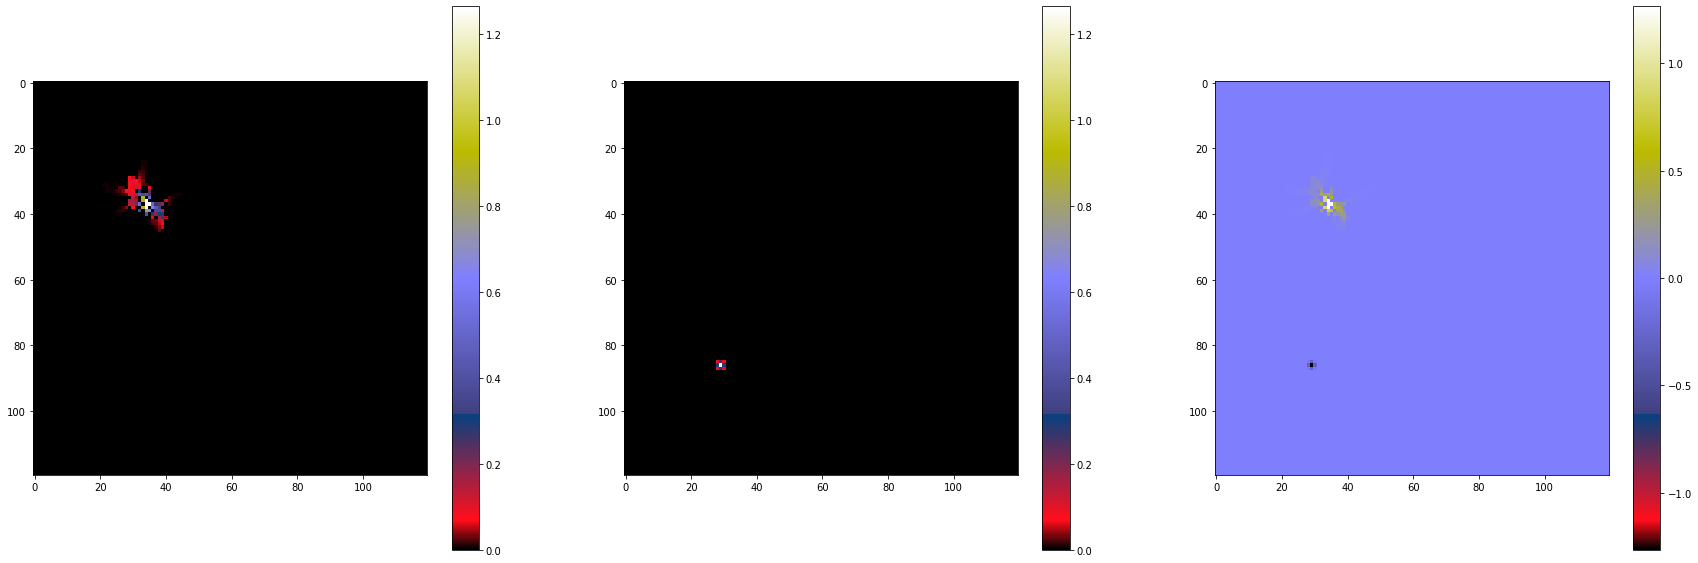

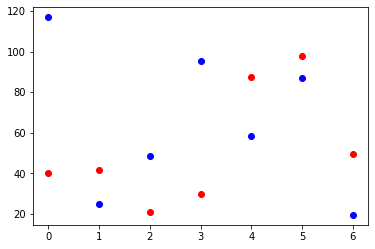

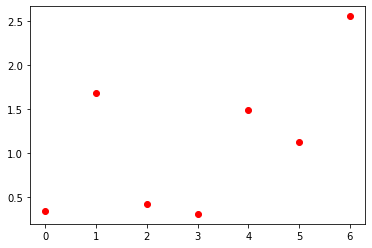

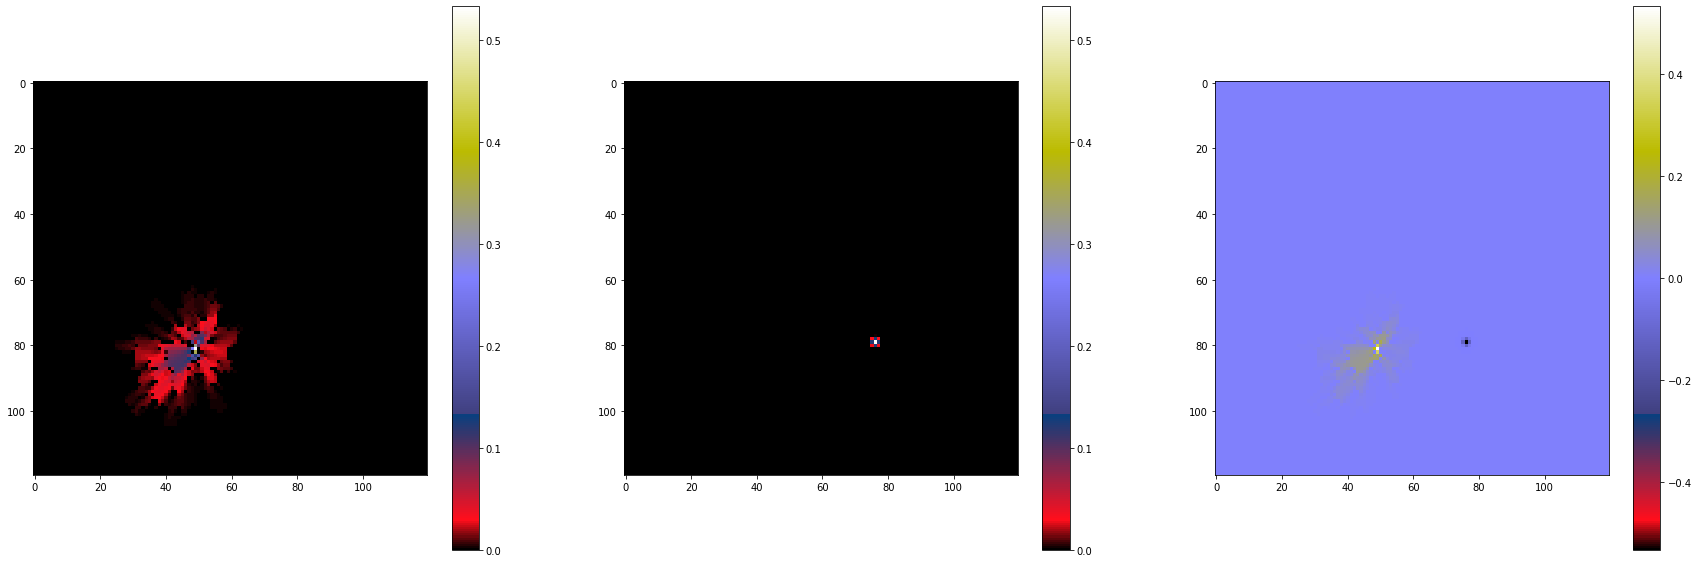

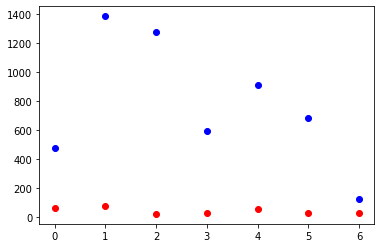

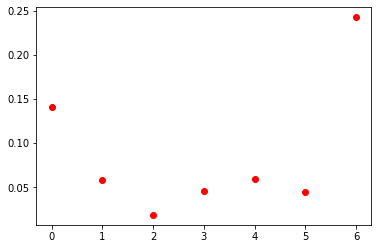

IndexError: list index out of range

In [25]:
                    import scipy.signal as scp
                    model_psf = r.frame._psfs.image[0]
                    render = [r.observations[0].render(model), 
                                r.observations[1].render(model)]
                    truth = gs_hr
                    true_seds = [np.concatenate([seds_lr[i],
                                                     seds_hr[i]]) for i in range(8)]
                    
                    sdrs = []
                    sed_sdrs = []
                    ndetect = len(r.ra_dec)
                    for k in range(ndetect):         
                        true_source = scp.fftconvolve(truth[k], model_psf, mode = 'same')  
                        source = r.sources[k].get_model(frame=r.observations[-1].frame)[0]
                        source=source / np.float(np.max(source)) * np.max(true_source)
                        spectrum = r.sources[k].get_model().sum(axis=(1, 2))
                        
                        plt.figure(figsize = (30,10))
                        plt.subplot(131)
                        plt.imshow(source)
                        plt.colorbar()
                        plt.subplot(132)
                        plt.imshow(true_source)
                        plt.colorbar()
                        plt.subplot(133)
                        plt.imshow(source-true_source)
                        plt.colorbar()
                        plt.show()
                        plt.plot(np.array(true_seds[k]), 'or')
                        plt.plot(np.array(spectrum), 'ob')
                        plt.show()
                        plt.plot(np.array(true_seds[k])/np.array(spectrum), 'or')
                        plt.show()
                        sed_sdrs.append(gct.SDR(np.array(true_seds)[k]/np.sum(true_source), 
                                            np.array(spectrum)))
                        sdrs.append(gct.SDR(true_source, source))